# Data preparation

In [1]:
import pymorphy3
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import re
import os
import nltk
from nltk.tokenize import word_tokenize
morph = pymorphy3.MorphAnalyzer()

In [2]:
stop_words = []
with open('./data/stop_words.txt', encoding='utf-8') as f:
     for i in f.readlines():
        stop_words.append(i[:-1])

a_df = pd.read_json('./data/auchan.json')
pr_df = pd.read_json('./data/perekrestok.json')

In [2]:
DATA_DIR = './data/'
ALL_PHOTO_DIR = './data/photo/all_photos/'
PHOTO_DIR = './data/photo/'
CAT1_PHOTO_DIR = './data/photo/cat1/'

## Объединение файлов Не запускать если есть auchan_perekrestok.csv!!!!

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chiki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
stop_words = []


with open('./data/stop_words.txt', encoding='utf-8') as f:
     for i in f.readlines():
        stop_words.append(i[:-1])

a_df = pd.read_json('./data/auchan.json')
pr_df = pd.read_json('./data/perekrestok.json')

### Name and attr eda

In [6]:
# volume
pr_df['product_volume_type'] = pr_df['product_volume_type'].apply(lambda x: 'г')
a_df['product_volume_type'] = a_df['product_volume_type'].apply(lambda x: 'г' if x == 'кг' else x)

for i in a_df.index:
    if a_df['product_volume_type'][i] == 'г':
        a_df.loc[i, 'product_volume'] = str(float(a_df.loc[i, 'product_volume']) * 1000)

In [7]:
# perekrestok data
data_pr = pd.DataFrame()
data_pr['name'] = pr_df['product_name']
data_pr['image'] = pr_df['product_img_link']
data_pr['volume'] = pr_df['product_volume'].apply(lambda x: str(x) + ' ') + pr_df['product_volume_type']
data_pr['attributes'] = pr_df['features']
data_pr['cat1'] = pr_df['main_category_name']
data_pr['cat2'] = pr_df['primary_category']
data_pr['cat3'] = pr_df['category_name']
data_pr

,name,image,volume,attributes,cat1,cat2,cat3
0,"Паштет нежный с куриным мясом Пр!ст, 90г",{'mini_url': 'media/perekrestok/mini_url/8505....,90.0 г,"{'Пищевая ценность на 100г': {'Ккал': '257.0',...",Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
1,Паштет мясной с печенью индейки и грушей катег...,{'mini_url': 'media/perekrestok/mini_url/66855...,160.0 г,"{'Пищевая ценность на 100г': {'Ккал': '330.0',...",Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
2,Паштет из печени Егорьевская Деревенский жарен...,{'mini_url': 'media/perekrestok/mini_url/33165...,150.0 г,"{'Пищевая ценность на 100г': {'Ккал': '322.0',...",Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
3,"Паштет Hame Деликатесный с гусиной печенью, 105г",{'mini_url': 'media/perekrestok/mini_url/12634...,105.0 г,"{'Пищевая ценность на 100г': {'Ккал': '260.0',...",Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
4,Паштет Hame Деликатесный с индейкой стерилизов...,{'mini_url': 'media/perekrestok/mini_url/12636...,105.0 г,"{'Пищевая ценность на 100г': {'Ккал': '270.0',...",Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
...,...,...,...,...,...,...,...
12295,"Вилки биоразлагаемые Home Story, 6шт",{'mini_url': 'media/perekrestok/mini_url/29759...,37.0 г,{'Состав': {'Состав': 'Модифицированный кукуру...,От Перекрёстка,Посуда,Home Story
12296,Наклейки Рождественский снег декоративные Home...,{'mini_url': 'media/perekrestok/mini_url/36691...,40.0 г,"{'Состав': {'Состав': 'ПВХ, полипропилен.'}, '...",От Перекрёстка,Сезонные товары,Home Story
12297,Мишура новогодняя зелёная Home Story,{'mini_url': 'media/perekrestok/mini_url/29834...,27.0 г,{'Состав': {'Состав': 'Полиэтилентерефталат.'}...,От Перекрёстка,Сезонные товары,Home Story
12298,Мишура новогодняя светлая Home Story,{'mini_url': 'media/perekrestok/mini_url/29833...,52.0 г,{'Состав': {'Состав': 'Полиэтилентерефталат.'}...,От Перекрёстка,Сезонные товары,Home Story


In [8]:
# auchan data
data_a = pd.DataFrame()
data_a['name'] = a_df['product_name']
data_a['image'] = a_df['product_img_links']
data_a['volume'] = a_df['product_human_volume']
data_a['attributes'] = a_df['specification']
data_a['cat1'] = a_df['main_category_name']
data_a['cat2'] = a_df['category_name']
data_a

,name,image,volume,attributes,cat1,cat2
0,Вино Vinotuar Каберне красное полусладкое Росс...,{'mini_url': ['auchan/mini_url/mini_61fdb6d232...,0.75 л,"{'Артикул товара': '41691', 'Бренд': 'Vinotuar...",Алкоголь (самовывоз),Красное вино
1,Вентилятор настольный Qilive FT30Q белый,{'mini_url': ['auchan/mini_url/mini_d37b61afa3...,2.7 кг,"{'Артикул товара': '23498', 'Бренд': 'Qilive',...",Бытовая техника,Климатическая техника
2,Увлажнитель Polaris PUH 5305,{'mini_url': ['auchan/mini_url/mini_19e49f998a...,4.5 л,"{'Артикул товара': '11082', 'Бренд': 'Polaris'...",Бытовая техника,Климатическая техника
3,"Транспортир Berlingo Flexy гибкий 180°, 10 см",{'mini_url': ['auchan/mini_url/mini_d861d34924...,0.023 кг,"{'Артикул товара': '709183', 'Бренд': 'Berling...",Канцтовары,Транспортиры
4,Насос ручной с иглой,{'mini_url': ['auchan/mini_url/mini_8cecd7f70f...,0.09 кг,"{'Артикул товара': '912676', 'Бренд': '-', 'Ра...",Спорт и отдых,Инвентарь
...,...,...,...,...,...,...
12320,"Квас «ДариДобро» медовый без сахара, 1 л",{'mini_url': ['auchan/mini_url/mini_cc879a532d...,1 л,"{'Артикул товара': '837426', 'Бренд': 'ДариДоб...","Вода, соки, напитки",Квас
12321,"Антидождь для стекол и фар АШАН Красная птица,...",{'mini_url': ['auchan/mini_url/mini_0fc9a0d493...,0.5 л,"{'Артикул товара': '82829', 'Бренд': 'АШАН Кра...",Автотовары,Автокосметика
12322,"Мертвая голова, Грэмм А.",{'mini_url': ['auchan/mini_url/mini_f61f299df6...,0.38 кг,"{'Артикул товара': '915', 'Серия': 'Young Adul...","Книги, журналы","Фантастика, фэнтези, мистика"
12323,Отель потерянных душ. Госпожа проводница эфира...,{'mini_url': ['auchan/mini_url/mini_8fd589715a...,0.298 кг,"{'Артикул товара': '918', 'Серия': 'Колдовские...","Книги, журналы","Фантастика, фэнтези, мистика"


In [9]:
d = pd.concat([data_a, data_pr], ignore_index=True, axis=0) # для сравнения дальше

In [10]:
# perekrestok attributes
attr_pr = pd.DataFrame(list(data_pr['attributes'].values))
attr_pr.head()

,Пищевая ценность на 100г,Состав,Информация,Условия хранения,Свойства товара,Характеристики товара,Осознанный выбор,Дополнительная информация,Дегустационные характеристики,Меры предосторожности,Особенности состава,Аллергены,Способ приготовления,Способ применения
0,"{'Ккал': '257.0', 'Белки': '6.0 г', 'Жиры': '2...","{'Состав': 'Вода питьевая, жир свиной топленый...","{'Производитель': 'Великоновгородский МД', 'Бр...","{'Срок хранения макс.': '730 дней', 'Температу...","{'Вид мяса': 'Свинина, Курица'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'Ккал': '330.0', 'Белки': '11.0 г', 'Жиры': '...","{'Состав': 'Печень индейки, шпик свиной, свини...","{'Производитель': 'Востряково-2', 'Бренд': 'Зе...",{'Срок хранения макс.': '40 дней'},"{'Тип обработки мяса': 'Запечённое', 'Вид мяса...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'Ккал': '322.0', 'Белки': '11.0 г', 'Жиры': '...","{'Состав': 'Печень говяжья, свинина, бульон(во...","{'Производитель': 'Новая столица', 'Бренд': 'Е...","{'Срок хранения макс.': '30 дней', 'Температур...","{'Тип обработки мяса': 'Жареное', 'Вид мяса': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'Ккал': '260.0', 'Белки': '6.0 г', 'Жиры': '2...",{'Состав': 'Вода питьевая; шкурка свиная; мясо...,"{'Производитель': 'Хаме Фудс', 'Бренд': 'Hame'...","{'Срок хранения макс.': '1095 дней', 'Температ...",{'Вид мяса': 'Свинина'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'Ккал': '270.0', 'Белки': '6.5 г', 'Жиры': '2...","{'Состав': 'Вода питьевая, шкурка свиная, мясо...","{'Производитель': 'Хаме Фудс', 'Бренд': 'Hame'...","{'Срок хранения макс.': '1095 дней', 'Температ...","{'Вид мяса': 'Индейка, Свинина'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# информация
info = pd.DataFrame(list(attr_pr['Информация'].values))

# состав
composition = pd.DataFrame(attr_pr['Состав'].apply(lambda x: x['Состав'] if isinstance(x, dict) and 'Состав' in x else None))

# кбжу
attr_pr['Пищевая ценность на 100г'] = attr_pr['Пищевая ценность на 100г'].apply(lambda x: {} if pd.isna(x) else x)
kbgy = pd.DataFrame(attr_pr['Пищевая ценность на 100г'].tolist())

# свойства товара
attr_pr['Свойства товара'] = attr_pr['Свойства товара'].apply(lambda x: {} if pd.isna(x) else x)
properties = pd.DataFrame(attr_pr['Свойства товара'].tolist())

# характеристики товара
attr_pr['Характеристики товара'] = attr_pr['Характеристики товара'].apply(lambda x: {} if pd.isna(x) else x)
characteristic = pd.DataFrame(attr_pr['Характеристики товара'].tolist())

attr_pr = pd.concat([info, composition, kbgy, properties, characteristic], axis=1)
attr_pr = attr_pr.drop('Бренд', axis=1)
attr_pr = attr_pr.drop('Тип продукта', axis=1)
attr_pr = attr_pr.drop('Фильтрация', axis=1) # ненадлежащий вид, вызывает ошибки дальше
attr_pr = attr_pr.drop('Кол-во в упаковке', axis=1) # ненадлежащий видб вызывает ошибки дальше
attr_pr

,Производитель,Страна,Способ консервации,Добавки,Острый,"Жирность, %",Тип соуса,Вид майонеза,Вкус (соусы),"Объем, л",...,Ресурс модуля,Тип зубной щетки,Размер носков,Размер EUR (одежда),Время работы,Высота взлета,Калибр,Макс. выдерживаемый вес,Кол-во семян,Расстояние между лампами
0,Великоновгородский МД,Россия,Другой,Без добавок,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Востряково-2,Россия,NaN,Груша,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Новая столица,Россия,NaN,Без добавок,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Хаме Фудс,Россия,Другой,Без добавок,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Хаме Фудс,Россия,Стерилизация,Без добавок,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,NaN,Китай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12296,СТМ,Китай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12297,Собственный импорт,Китай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0 кг,0,0
12298,Собственный импорт,Китай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# auchan attributes
attr_a = pd.DataFrame(list(data_a['attributes'].values))
attr_a = attr_a.drop('Артикул товара', axis=1)
attr_a = attr_a.drop('Бренд', axis=1)
attr_a = attr_a.drop('Тип товара', axis=1)
attr_a = attr_a.drop('Вид продукта', axis=1)
attr_a.head()

,"Содержание алкоголя, %",Содержание cахара,Вид упаковки,"Температура подачи, ℃",Сорта винограда,Условия хранения,Стандарт,Регион,Меры предосторожности,Цвета,...,Тип морепродуктов,Вид салата,Вид конфет,"Минерализация, мг/л",Вид блюда,Вид закуски,Вид субпродукта,Тип водки,Тип виски,Вид творога
0,10-12,Полусладкое,Стеклянная бутылка,15-20,Каберне,"Хранить в вентилируемых, не имеющих посторонне...",ГОСТ 32030-2013,Краснодарский край,Алкоголь противопоказан детям и подросткам до ...,Красное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# drop unnecessary data
def drop_unnecessary_columns(data):
    parameters = ['cпособ', 'аннотац', 'особенност', 'категория', 'рекомендац', 'срок', 'гаранти', 'органы', 'погрешность', 'измерени', 'цена', 'сторона', 'сертифик', 'фактор','условия', 'хранения', 'isbn', 'дополнени', 'регион', 'время', 'не содержит', 'температур', 'максимальн', 'минимальн', 'информац', 'подача', 'может содержать', 'адрес', 'применение', 'сочетание', 'макс.', 'тип потребления', 'стандарт', 'меры', 'гарантия', 'дополнительн']
    for i in tqdm(data.columns):
        for p in parameters:
            if p in i.lower():
                try:
                    data.drop(columns=i, axis=1, inplace=True)
                    continue
                except KeyError:
                    print('Not found: ', i)
                    
drop_unnecessary_columns(attr_a)
drop_unnecessary_columns(attr_pr)

  0%|▍                                                                                 | 4/835 [00:00<00:24, 33.32it/s]

Not found:  Условия хранения


  2%|█▉                                                                               | 20/835 [00:01<00:35, 22.83it/s]

Not found:  Срок хранения


  3%|██▍                                                                              | 25/835 [00:01<00:49, 16.23it/s]

Not found:  Гарантия, мес


  8%|██████                                                                           | 63/835 [00:01<00:13, 58.31it/s]

Not found:  Дополнительная информация


 48%|██████████████████████████████████████▌                                         | 402/835 [00:06<00:08, 50.69it/s]

Not found:  Максимальная температура нагрева, °C


 54%|██████████████████████████████████████████▊                                     | 447/835 [00:07<00:14, 26.54it/s]

Not found:  Меры измерения


 54%|███████████████████████████████████████████▏                                    | 451/835 [00:08<00:15, 24.32it/s]

Not found:  Минимальная температура нагрева, °C


 80%|███████████████████████████████████████████████████████████████▍               | 671/835 [00:10<00:01, 134.37it/s]

Not found:  Максимальная температура нагрева


100%|███████████████████████████████████████████████████████████████████████████████| 371/371 [00:01<00:00, 235.30it/s]


In [14]:
# merge attributes with their names
'''# attr
def merge_attr(attr):
    for col in tqdm(attr.columns):
        attr[str(col)] = attr[str(col)].apply(lambda x: str(col).lower() + ' ' + str(x).lower() if str(x) != 'nan' else '')
    return attr

attr_a = merge_attr(attr_a)
attr_pr = merge_attr(attr_pr)'''

"# attr\ndef merge_attr(attr):\n    for col in tqdm(attr.columns):\n        attr[str(col)] = attr[str(col)].apply(lambda x: str(col).lower() + ' ' + str(x).lower() if str(x) != 'nan' else '')\n    return attr\n\nattr_a = merge_attr(attr_a)\nattr_pr = merge_attr(attr_pr)"

In [14]:
# clear attributes from Nan, create common data for names and attributes
def clear_attr(attr):
    common_attributes = attr.copy()
    
    for col in tqdm(attr.columns):
        attr[str(col)] = attr[str(col)].apply(lambda x: str(x).lower() if str(x) != 'nan' else '')
        if 'тип' in col.lower() or 'вид' in col.lower() or 'производитель' in col.lower() or 'состав' in col.lower():
            common_attributes[str(col)] = attr[str(col)].apply(lambda x: str(x).lower() if str(x) != 'nan' else '')
        else:
            common_attributes[str(col)] = ''
    return attr, common_attributes

attr_a, common_attr_a = clear_attr(attr_a)
attr_pr, common_attr_pr = clear_attr(attr_pr)

100%|████████████████████████████████████████████████████████████████████████████████| 350/350 [00:15<00:00, 22.34it/s]


In [16]:
set(common_attr_a)

{'% уксусной кислоты',
 'AUX',
 'Bluetooth',
 'D-pad',
 'DLNA',
 'DVB CAM',
 'FM радио',
 'Mirocast',
 'NAT',
 'NFC',
 'QWERTY-клавиатура',
 'SPF',
 'Smart TV',
 'USB вход',
 'VESA',
 'Wi-Fi',
 'Автовыключение без воды',
 'Автоматическая разморозка',
 'Автоматическая фокусировка',
 'Автоматический разогрев',
 'Автоматическое включение',
 'Автоматическое выключение',
 'Автоматическое отключение',
 'Автоматическое поднятие тостов',
 'Автоматическое центрирование тостов',
 'Автоотключение',
 'Автоотключение при неиспользовании',
 'Автор',
 'Автосматывание провода',
 'Агрегатное состояние',
 'Акселерометр',
 'Активная антенна',
 'Антипригарное покрытие',
 'Антипригарное покрытие чаши',
 'Антискользящие ножки',
 'Аудио разъем',
 'Бамперы',
 'Без запаха',
 'Без кофеина',
 'Без сахара',
 'Белки на 100 г, г',
 'Беспроводная клавиатура',
 'Беспроводной',
 'Беспроводной геймпад',
 'Беспроводные подключения',
 'Блендер',
 'Блокировка кнопок',
 'Будильник',
 'Варианты креплений автокресла',
 'Венч

In [16]:
# merge attributes
data_a['attributes'] = attr_a[attr_a.columns].astype(str).agg(' '.join, axis=1)
data_pr['attributes'] = attr_pr[attr_pr.columns].astype(str).agg(' '.join, axis=1)

common_a = common_attr_a[common_attr_a.columns].astype(str).agg(' '.join, axis=1)
common_pr = common_attr_pr[common_attr_pr.columns].astype(str).agg(' '.join, axis=1)

In [17]:
# add volume
data_a['attributes'] = data_a['volume'].str.cat(data_a['attributes'], sep=' ')
data_pr['attributes'] = data_pr['volume'].str.cat(data_pr['attributes'], sep=' ')
data_a = data_a.drop(['volume'], axis=1)
data_pr = data_pr.drop(['volume'], axis=1)

In [18]:
def preprocessing(sequences):
    result = {}
    for index, seq in tqdm(zip(sequences.index, sequences)):
        # delete stop words and cast to lower case, lemmatization
        result[index] = ' '.join([morph.parse(i)[0].normal_form.lower() for i in re.findall("[a-zA-Zа-яА-Яё]+|[0-9.%]+", seq) if i != '' and i.lower() not in stop_words])
    return result.values()

pre_attr_a = preprocessing(data_a['attributes'])
pre_name_a = preprocessing(data_a['name'])
pre_attr_pr = preprocessing(data_pr['attributes'])
pre_name_pr = preprocessing(data_pr['name'])
pre_common_a = preprocessing(common_a)
pre_commom_pr = preprocessing(common_pr)

12325it [01:33, 132.13it/s]
12325it [00:29, 418.38it/s]
12300it [03:16, 62.72it/s] 
12300it [00:42, 286.15it/s]
12325it [01:04, 191.17it/s]
12300it [01:27, 140.37it/s]


In [19]:
data_a['name'] = pre_name_a
data_a['attributes'] = pre_attr_a
data_pr['name'] = pre_name_pr
data_pr['attributes'] = pre_attr_pr

In [20]:
# save data for metrics
data_for_metrics = pd.concat([data_a['name'], data_pr['name']])
data_for_metrics.reset_index(drop=True, inplace=True)
data_for_metrics = pd.DataFrame(data_for_metrics)
data_for_metrics

,name
0,вино vinotuar каберне красный полусладкое росс...
1,вентилятор настольный qilive ft 30 q белый
2,увлажнитель polaris puh 5305
3,транспортир berlingo flexy гибкий 180 10 смотреть
4,насос ручной игла
...,...
24620,вилка биоразлагать home story 6 шт
24621,наклейка рождественский снег декоративный home...
24622,мишура новогодний зелёный home story
24623,мишура новогодний светлый home story


In [21]:
data_for_metrics.to_csv(DATA_DIR+'auchan_perekrestok_prepared_for_metrics.csv', index=False)

In [19]:
# split names and attributes

def split(data, common):
    for i in tqdm(range(len(data))):
        symbols = ['вес', 'змж', 'вт','г','кг','л', 'мл', 'лист','листа', 'листов', 'элементов', 'элемент', 'файлами', 'файлов', 'м','мл', 'мм','наб','пара', 'лет', 'см','упак', 'цв', 'цвет', 'цветов', 'цвета', 'шт', 'предмета', 'месяцев','месяца', 'год', 'лет', 'сорт', 'вида', 'вид', 'тон', 'смотреть', 'без', 'сахара', 'сахар',
                  'caramello','daino','nero','айворя','алый','ассорти','бежевый','белые','белый','берюзовый','бирюзовый','бледно','бордо','бордовый','бронза','бронзовый','бурый','голубой','дымка','дымчатый','жёлтый','зелёный','золотистый','золотой','изумрудный','капучиный','карамель','комбинированный','коралл','коралловый','коричневый','коричнеый','кость','кофейный','красный','кремовый','лаванда','лиловый','лимонный','малиновый','медный','металлик','многоцветный','молочный','морской','мультиколор','мультицвет','мятный','натуральный',
                  'нефрит','оливковый','оранжевый','ореховый','оттенок','охра','пастельный','персиковый','прозрачный','пудровыя','пурпурный','разгоцветный','разноцвентный','разноцветеый','разноцветный','разноцветь','рисунок','розовый','рубиновый','салатовый','светло','светлый','серебристый','серебряный','серо','серый','синий','сиреневый','слоновый','сталь','стальной',
                  'телесный','темно','терракотовый','тёмный','узор','фиолетовый','фисташковый','фуксия','хаки','хром','цвет','цветной','черно','чёрный','шампаня','янтарный','ярко','white','black','red','yellow', 'orange','green','blue','purple','pink','brown','grey']
        special_chars = ["%", ",", "."]
        name = ''
        for word in word_tokenize(data.loc[i, 'name']):
            for char in special_chars:
                word = word.replace(char, "")
            if (word not in word_tokenize(data['attributes'][i]) or word in word_tokenize(common[0][i])) and word not in symbols and word.isnumeric() == False:
                name += word + ' '
        data['name'][i] = name.strip()
        
split(data_a, pd.DataFrame(pre_common_a))
split(data_pr, pd.DataFrame(pre_commom_pr))

100%|███████████████████████████████████████████████████████████████████████████| 12300/12300 [01:35<00:00, 128.48it/s]


In [ ]:
dt_a = data_a.copy()
dt_pr = data_pr.copy()

In [ ]:
dt_a.head()

,name,image,attributes,cat1,cat2
0,вино vinotuar каберне,{'mini_url': ['auchan/mini_url/mini_61fdb6d232...,0.75 л 10 12 полусладкое стеклянный бутылка ка...,Алкоголь (самовывоз),Красное вино
1,вентилятор настольный qilive ft q,{'mini_url': ['auchan/mini_url/mini_d37b61afa3...,2.7 кг 2.7 3.8 540 210 360 китай,Бытовая техника,Климатическая техника
2,увлажнитель polaris puh,{'mini_url': ['auchan/mini_url/mini_19e49f998a...,4.5 л 1.13 1.5 340 220 220 китай 4.5 25 нет,Бытовая техника,Климатическая техника
3,транспортир berlingo flexy гибкий,{'mini_url': ['auchan/mini_url/mini_d861d34924...,0.023 кг 0.023 0.023 130 90 2 китай,Канцтовары,Транспортиры
4,насос ручной игла,{'mini_url': ['auchan/mini_url/mini_8cecd7f70f...,0.09 кг 0.09 0.1 пластик 250 40 40 ханчжоу кай...,Спорт и отдых,Инвентарь


### Очистка пропусков в картинках

In [ ]:
dt_a = dt_a.loc[~dt_a['image'].isna(), :]
dt_pr = dt_pr.loc[~dt_pr['image'].isna(), :]

In [ ]:
def is_exception(a, b):
    try:
        a[b]
        return a[b]
    except:
        return np.nan 

In [ ]:
'''data['image'] = data['image'].apply(lambda x: x.replace("'", '"'))
data['image'] = data['image'].apply(lambda x: json.loads(x))'''
dt_a['image'] = dt_a['image'].apply(lambda x:  is_exception(x, 'preview_url'))  # убираем записи вида '{}'
dt_pr['image'] = dt_pr['image'].apply(lambda x:  is_exception(x, 'small_url'))  # убираем записи вида '{}'

In [ ]:
dt_a = dt_a.loc[~dt_a['image'].isna(), :]
dt_pr = dt_pr.loc[~dt_pr['image'].isna(), :]

In [ ]:
dt_a.head()

,name,image,attributes,cat1,cat2
0,вино vinotuar каберне,[auchan/preview_url/small_61fdb6d232eccac93828...,0.75 л 10 12 полусладкое стеклянный бутылка ка...,Алкоголь (самовывоз),Красное вино
1,вентилятор настольный qilive ft q,[auchan/preview_url/small_d37b61afa3cf9667f27f...,2.7 кг 2.7 3.8 540 210 360 китай,Бытовая техника,Климатическая техника
2,увлажнитель polaris puh,[auchan/preview_url/small_19e49f998a8b7315de44...,4.5 л 1.13 1.5 340 220 220 китай 4.5 25 нет,Бытовая техника,Климатическая техника
3,транспортир berlingo flexy гибкий,[auchan/preview_url/small_d861d349244d89b3d30b...,0.023 кг 0.023 0.023 130 90 2 китай,Канцтовары,Транспортиры
4,насос ручной игла,[auchan/preview_url/small_8cecd7f70f5853f1de07...,0.09 кг 0.09 0.1 пластик 250 40 40 ханчжоу кай...,Спорт и отдых,Инвентарь


In [ ]:
dt_a['image'].apply(lambda x: type(x)).value_counts()

<class 'list'>    12319
<class 'str'>         6
Name: image, dtype: int64

In [ ]:
def get_str(x):
    if isinstance(x, str):
        return x
    elif isinstance(x, list):
        return x[0]

In [ ]:
dt_a['image'] = dt_a['image'].apply(lambda x: get_str(x))

In [ ]:
# получить названия файлов
dt_a['image'] = dt_a['image'].apply(lambda x: x.split('/')[-1])
dt_pr['image'] = dt_pr['image'].apply(lambda x: x.split('/')[-1])
                                    

In [ ]:
dt_a.head()

,name,image,attributes,cat1,cat2
0,вино vinotuar каберне,small_61fdb6d232eccac938289289314c3fa669bfbe11...,0.75 л 10 12 полусладкое стеклянный бутылка ка...,Алкоголь (самовывоз),Красное вино
1,вентилятор настольный qilive ft q,small_d37b61afa3cf9667f27f1f8e2269bea7baac20c0...,2.7 кг 2.7 3.8 540 210 360 китай,Бытовая техника,Климатическая техника
2,увлажнитель polaris puh,small_19e49f998a8b7315de449b7a79f24f5f4459c429...,4.5 л 1.13 1.5 340 220 220 китай 4.5 25 нет,Бытовая техника,Климатическая техника
3,транспортир berlingo flexy гибкий,small_d861d349244d89b3d30b44181c1410b66909e58c...,0.023 кг 0.023 0.023 130 90 2 китай,Канцтовары,Транспортиры
4,насос ручной игла,small_8cecd7f70f5853f1de071129909514db611be11b...,0.09 кг 0.09 0.1 пластик 250 40 40 ханчжоу кай...,Спорт и отдых,Инвентарь


In [ ]:
dt_pr.head()

,name,image,attributes,cat1,cat2,cat3
0,паштет нежный куриный мясо пр ст,8505.jpg,90.0 г великоновгородский мд россия без добавк...,Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
1,паштет мясной печень индейка груша категория з...,66855.jpg,160.0 г востряковый 2 россия груша печень инде...,Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
2,паштет печень егорьевский деревенский жареный,33165.jpg,150.0 г новый столица россия без добавка печен...,Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
3,паштет hame деликатесный гусиный печень,12634.jpg,105.0 г хам фудс россия без добавка вода питье...,Колбасные изделия,"Колбаса, бекон, паштет",Паштеты
4,паштет hame деликатесный индейка стерилизовать,12636.jpg,105.0 г хам фудс россия стерилизация без добав...,Колбасные изделия,"Колбаса, бекон, паштет",Паштеты


In [ ]:
data = pd.concat([dt_a, dt_pr], ignore_index=True, axis=0)
data

,name,image,attributes,cat1,cat2,cat3
0,вино vinotuar каберне,small_61fdb6d232eccac938289289314c3fa669bfbe11...,0.75 л 10 12 полусладкое стеклянный бутылка ка...,Алкоголь (самовывоз),Красное вино,NaN
1,вентилятор настольный qilive ft q,small_d37b61afa3cf9667f27f1f8e2269bea7baac20c0...,2.7 кг 2.7 3.8 540 210 360 китай,Бытовая техника,Климатическая техника,NaN
2,увлажнитель polaris puh,small_19e49f998a8b7315de449b7a79f24f5f4459c429...,4.5 л 1.13 1.5 340 220 220 китай 4.5 25 нет,Бытовая техника,Климатическая техника,NaN
3,транспортир berlingo flexy гибкий,small_d861d349244d89b3d30b44181c1410b66909e58c...,0.023 кг 0.023 0.023 130 90 2 китай,Канцтовары,Транспортиры,NaN
4,насос ручной игла,small_8cecd7f70f5853f1de071129909514db611be11b...,0.09 кг 0.09 0.1 пластик 250 40 40 ханчжоу кай...,Спорт и отдых,Инвентарь,NaN
...,...,...,...,...,...,...
24620,вилка биоразлагать home story,297590.jpg,37.0 г китай модифицированный кукурузный крахм...,От Перекрёстка,Посуда,Home Story
24621,наклейка рождественский снег декоративный home...,366913.jpg,40.0 г стм китай пвх полипропилен .,От Перекрёстка,Сезонные товары,Home Story
24622,мишура новогодний home story,298341.jpg,27.0 г собственный импорт китай полиэтилентере...,От Перекрёстка,Сезонные товары,Home Story
24623,мишура новогодний home story,298339.jpg,52.0 г собственный импорт китай полиэтилентере...,От Перекрёстка,Сезонные товары,Home Story


In [ ]:
def clean_empty_strings(x):
    if len(x) < 1:
        return np.nan
    return x

In [ ]:
data['image'] = data['image'].apply(lambda x: clean_empty_strings(x))

In [ ]:
data = data.loc[~data['image'].isna(), :]

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.to_csv(DATA_DIR+'auchan_perekrestok_prepared.csv', index=False)

In [ ]:
df = data.copy()

## Очистка и объединение категорий

#### cat1

In [17]:
df = pd.read_csv('data/new_auchan_perek.csv')
df

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
0,"Торт Kristof клубника со сливками, 450 г",small_1000d62a27c1704e71336b046d4e4f3838e85f75...,"{'Бренд': 'Kristof', 'Вид упаковки': 'Пластик'...",Сладости,Торты,kristof пластик ягодный 4.4 19 0.45 0.499 моло...,kristof пластик ягодный молоко крем маскарпон...,торт kristof клубника сливка,NaN
1,"Набор одноразовых стаканов Actuel пластик, 20х...",small_4ed8d12281a9102b9777887b51b814195a190945...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.2', ...",Кухня,"Стаканы, бокалы",actuel 0.2 0.2 71 117 310 россия 0.2 кг 20х200 мл,actuel,набор одноразовый стакан actuel пластик,NaN
2,"Сироп «Баринофф» десертный Вишня, 1 л",small_4abc7e4195076a6538d2ef5e84c89bcca4b73702...,"{'Бренд': 'Баринофф', 'Упаковка': 'Стеклянная ...",Сладости,Сиропы,баринофф стеклянный бутылка сироп сироп вишнёв...,баринофф сироп сироп сахар вода питьевой сок...,сироп баринофф десертный вишня,NaN
3,Пирожное «Медвежонок Барни» бисквитное с молоч...,small_7c4033e6867cdcfbdb3a847dc97d2401f06ce2d5...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный,NaN
4,Пирожное «Медвежонок Барни» бисквитное со сгущ...,small_bdbe36876182b6fd32dc9e0989ecfa0fef23baa1...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный сгустить ...,NaN
...,...,...,...,...,...,...,...,...,...
35598,"Вилки биоразлагаемые Home Story, 6шт",297590.jpg,"{'Бренд': 'Home Story', 'Страна': 'Китай', 'Со...",Собственные торговые марки,Посуда,home story китай модифицированный кукурузный к...,home story модифицированный кукурузный крахмал...,вилка биоразлагать home story,Home Story
35599,Наклейки Рождественский снег декоративные Home...,366913.jpg,"{'Производитель': 'СТМ', 'Бренд': 'Home Story'...",Собственные торговые марки,Сезонные товары,стм home story китай пвх полипропилен . 40.0 g,стм home story пвх полипропилен,наклейка рождественский снег декоративный home...,Home Story
35600,Мишура новогодняя зелёная Home Story,298341.jpg,"{'Максимальная высота': '0 см', 'Производитель...",Собственные торговые марки,Сезонные товары,0 смотреть собственный импорт home story китай...,собственный импорт home story полиэтилентерефт...,мишура новогодний home story,Home Story
35601,Мишура новогодняя светлая Home Story,298339.jpg,"{'Производитель': 'Собственный импорт', 'Бренд...",Собственные торговые марки,Сезонные товары,собственный импорт home story китай полиэтилен...,собственный импорт home story полиэтилентерефт...,мишура новогодний home story,Home Story


In [18]:
len(set(df['cat2']))

428

In [23]:
len(set(df['cat1']))

28

In [20]:
set(df['cat1'])

{'Алкогольные напитки',
 'Бакалея',
 'Вода, соки, напитки',
 'Готовая еда',
 'Для дома и дачи',
 'Для праздника',
 'Замороженные продукты',
 'Здоровье',
 'Колбасные изделия',
 'Консервация',
 'Красота, гигиена, аптека',
 'Кухня',
 'Макароны, крупы',
 'Молочные продукты',
 'Морепродукты',
 'Мясо и птица',
 'Мёд, варенье, джемы, сиропы',
 'Овощи, фрукты, ягоды, грибы',
 'Продукты быстрого приготовления',
 'Рыба, икра, морепродукты',
 'Сладости',
 'Снеки',
 'Собственные торговые марки',
 'Соусы, кетчупы, майонезы',
 'Сыр',
 'Товары для дома',
 'Товары для мам и детей',
 'Уборка',
 'Уборка, товары для дома',
 'Хлеб и выпечка',
 'Чай, кофе, горячие напитки',
 'Чипсы, снеки, сухофрукты',
 'Шашлыки на природе'}

In [24]:
df = data.replace({'cat1':{'Алкоголь (самовывоз)':'Алкогольные напитки',
                           'Красота и гигиена':'Красота, гигиена, аптека',
                           'Соки, воды, напитки':'Вода, соки, напитки',
                           'Шоколад, конфеты, сладости':'Сладости',
                           'Уборка':'Уборка и бытовая химия',
                           'Кофе, чай, какао, сахар':'Чай, кофе, горячие напитки',
                           'Молоко, сыр, яйца':'Молочные продукты',
                           'Молочные продукты, яйца':'Молочные продукты',
                           'Чипсы, снеки, сухофрукты':'Снеки',
                           'Чипсы, снеки, сухофрукты':'Снеки',
                           'Орехи, семечки, сухофрукты':'Снеки',
                           'Рыба, икра, морепродукты':'Морепродукты',
                           'Рыба':'Морепродукты',
                           'Колбасные изделия':'Колбасные изделия, холодец, паштет',
                           'Товары АШАН':'Колбасные изделия, холодец, паштет',
                           'Продукты быстрого приготовления':'Полуфабрикаты',
                           'Готовая еда':'Полуфабрикаты',
                           'Замороженные продукты':'Полуфабрикаты',
                           'Овощи, фрукты, грибы':'Овощи, фрукты, ягоды, грибы',
                           'Овощи, фрукты, орехи':'Овощи, фрукты, ягоды, грибы',
                           'Бакалея':'Овощи, фрукты, ягоды, грибы',
                           'Уборка и бытовая химия':'Уборка, товары для дома',
                           'Товары для дома':'Уборка, товары для дома',
                           'Сухие завтраки, мюсли':'Макароны, крупы',
                           'Макароны, крупы, масло, специи':'Макароны, крупы',
                           'Товары для мам и детей':'Игрушки',
                           'Посуда':'Кухня',
                           'Отдых на даче':'Сад и огород',
                           'Строительство и ремонт':'Уборка, товары для дома',
                           'Электроника':'Бытовая техника'
                          }})

In [25]:
cats1 = set(df['cat1'])
cats1

{'Алкогольные напитки',
 'Вода, соки, напитки',
 'Для дома и дачи',
 'Для праздника',
 'Здоровье',
 'Игрушки',
 'Колбасные изделия, холодец, паштет',
 'Консервация',
 'Красота, гигиена, аптека',
 'Кухня',
 'Макароны, крупы',
 'Молочные продукты',
 'Морепродукты',
 'Мясо и птица',
 'Мёд, варенье, джемы, сиропы',
 'Овощи, фрукты, ягоды, грибы',
 'Полуфабрикаты',
 'Сладости',
 'Снеки',
 'Собственные торговые марки',
 'Соусы, кетчупы, майонезы',
 'Сыр',
 'Уборка и бытовая химия',
 'Уборка, товары для дома',
 'Хлеб и выпечка',
 'Чай, кофе, горячие напитки',
 'Шашлыки на природе'}

In [26]:
df.head()

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
0,"Торт Kristof клубника со сливками, 450 г",small_1000d62a27c1704e71336b046d4e4f3838e85f75...,"{'Бренд': 'Kristof', 'Вид упаковки': 'Пластик'...",Сладости,Торты,kristof пластик ягодный 4.4 19 0.45 0.499 моло...,kristof пластик ягодный молоко крем маскарпон...,торт kristof клубника сливка,NaN
1,"Набор одноразовых стаканов Actuel пластик, 20х...",small_4ed8d12281a9102b9777887b51b814195a190945...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.2', ...",Кухня,"Стаканы, бокалы",actuel 0.2 0.2 71 117 310 россия 0.2 кг 20х200 мл,actuel,набор одноразовый стакан actuel пластик,NaN
2,"Сироп «Баринофф» десертный Вишня, 1 л",small_4abc7e4195076a6538d2ef5e84c89bcca4b73702...,"{'Бренд': 'Баринофф', 'Упаковка': 'Стеклянная ...",Сладости,Сиропы,баринофф стеклянный бутылка сироп сироп вишнёв...,баринофф сироп сироп сахар вода питьевой сок...,сироп баринофф десертный вишня,NaN
3,Пирожное «Медвежонок Барни» бисквитное с молоч...,small_7c4033e6867cdcfbdb3a847dc97d2401f06ce2d5...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный,NaN
4,Пирожное «Медвежонок Барни» бисквитное со сгущ...,small_bdbe36876182b6fd32dc9e0989ecfa0fef23baa1...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный сгустить ...,NaN


In [27]:
# названия в определенной категории
for i, j, k in zip(df.index, df[df['cat1'] == 'Одежда, обувь и аксессуары']['name'], df[df['cat1'] == 'Одежда, обувь и аксессуары']['cat2']):
    print(i, j, '|', k)

In [28]:
# кол-во продуктов в категории
len(df[df['cat1'] == 'Шашлыки на природе'])

635

In [29]:
len(df['cat2'].unique())

428

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31786 entries, 0 to 35602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31786 non-null  object
 1   image                31786 non-null  object
 2   attributes           31786 non-null  object
 3   cat1                 31786 non-null  object
 4   cat2                 31786 non-null  object
 5   attributes_prepared  31786 non-null  object
 6   common_attributes    31634 non-null  object
 7   name_prepared        31786 non-null  object
 8   cat3                 11971 non-null  object
dtypes: object(9)
memory usage: 2.4+ MB


In [31]:
df = df.loc[~df['name'].isna(), :]

In [32]:
df.reset_index(drop=True, inplace=True)

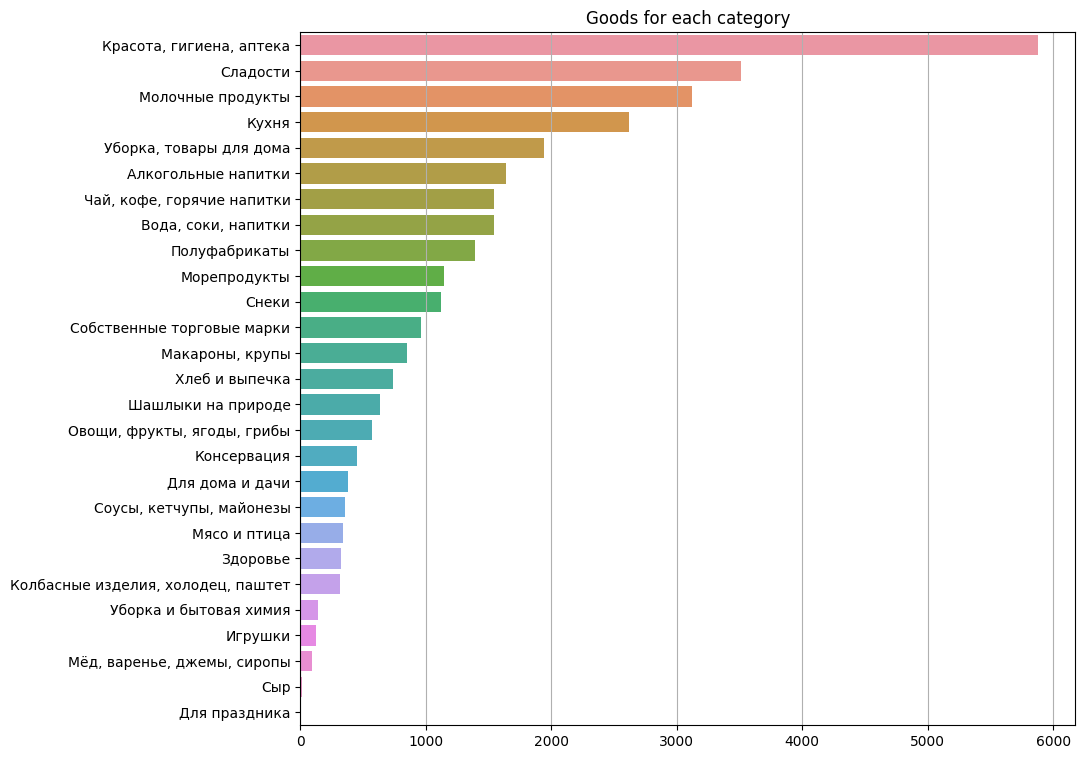

In [33]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df['cat1'].value_counts().values, y=df['cat1'].value_counts().index) 
None

In [34]:
# 'Сыр'
for i, name, cat in zip(range(len(df)), df['name'], df['cat1']):
    if name.lower().startswith('сыр ') or name.lower() == 'сыр' or 'сырный продукт' in name.lower() or 'плавленый' in name.lower() or 'чеддер' in name.lower():
        df['cat1'][i] = 'Сыр'
        cat = 'Сыр'

In [35]:
# 'Яйцо'
for i, name, cat in zip(range(len(df)), df['name'], df['cat1']):
    if name.lower().startswith('яйцо') or name.lower().startswith('яйца') or name.lower().startswith('белок яичный') or name.lower().startswith('яичный белок') or 'яйцо куриный' in name.lower() or 'желток ' in name.lower() or 'меланж яичный' in name.lower():
        df['cat1'][i] = 'Яйцо'
        cat = 'Яйцо'

In [36]:
# 'Снеки'
snacks = ['Снеки', 'Смеси орехов и сухофруктов', 'Чипсы, снеки', 'Орехи', 'Сухарики, гренки', 'Чипсы', 'Сухофрукты', 'Семечки, семена', 'Сушеные и вяленые морепродукты', 'Орехи, семечки']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if name.lower().startswith('чипсы ') or name.lower().startswith('орех ') or name.lower().startswith('смесь орех ') or name.lower().startswith('сухарик ') or name.lower().startswith('финик ') or name.lower().startswith('цукат ') or name.lower().startswith('чернослив ') or name.lower().startswith('арахис ') or name.lower().startswith('фисташка ') or cat2 in snacks:
        df['cat1'][i] = 'Снеки'
        cat = 'Снеки'

In [37]:
# 'Сладости'
sweet = ['Большая упаковка', 'Детское питание', 'Мармелад, зефир', 'Печенье, вафли', 'Мороженое', 'Порционное', 'Шоколад, конфеты', 'Восточные сладости', 'Полезные сладости', 'Напитки и десерты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in sweet or name.lower().startswith('шоколад ') or name.lower().startswith('сорбета ') or name.lower().startswith('трубочка ') or name.lower().startswith('десерт ') or name.lower().startswith('пудинг ') or name.lower().startswith('резинка жевательный ')or name.lower().startswith('конфета ') or name.lower().startswith('драже ') or name.lower().startswith(' маршмеллоу ') or name.lower().startswith('мармелад ') or name.lower().startswith('леденец ') or name.lower().startswith('батончик ') or name.lower().startswith('печение ') or name.lower().startswith('вафельный трубочка ') or name.lower().startswith('крекер ')or name.lower().startswith('вафля ') or name.lower().startswith('пряник ') or name.lower().startswith('галета ')or name.lower().startswith('рулет ') or name.lower().startswith('пирожное ') or name.lower().startswith('тарт ') or name.lower().startswith('торт ') or name.lower().startswith('халва ') or name.lower().startswith('трюфель ')or name.lower().startswith('суфле ') or name.lower().startswith('жевательный резинка ') or name.lower().startswith('пахлава ')or name.lower().startswith('баклава ') or name.lower().startswith('зефир ') or name.lower().startswith('чак ') or name.lower().startswith('щербета ') or name.lower().startswith('рахат ') or name.lower().startswith('козинак ') or name.lower().startswith('туррон ') or name.lower().startswith('пастила ') or name.lower().startswith('зефир ') or name.lower().startswith('меренга  ') or name.lower().startswith('пломбир '):
        df['cat1'][i] = 'Сладости'
        cat = 'Сладости'

In [38]:
# 'Мёд, варенье, джемы, сиропы'
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 == 'Мёд, варенье' or name.lower().startswith('мёд ') or name.lower().startswith('варенье ') or name.lower().startswith('джема ') or name.lower().startswith('сироп ') or name.lower().startswith('конфитюр ') or name.lower().startswith('топпинг')or name.lower().startswith('топинг') or name.lower().startswith('повидло ') or name.lower().startswith('протертый') or name.lower().startswith('дробленый'):
        df['cat1'][i] = 'Мёд, варенье, джемы, сиропы'
        cat = 'Мёд, варенье, джемы, сиропы'

In [39]:
# 'Хлеб и выпечка'
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 == 'Хлебцы, сухари' or name.lower().startswith('пирог ') or name.lower().startswith('кулич ') or name.lower().startswith('кекс ') or name.lower().startswith('штрудель ') or name.lower().startswith('круассан ') or name.lower().startswith('слойка')or name.lower().startswith('плюшка ') or name.lower().startswith('тарталетка ') or name.lower().startswith('хлебец ') or name.lower().startswith('баранка ') or name.lower().startswith('тесто ') or name.lower().startswith('багет ') or name.lower().startswith('батон ') or name.lower().startswith('хлеб ') or name.lower().startswith('пончик ') or name.lower().startswith('баранка ') or name.lower().startswith('пампушка ') or name.lower().startswith('чиабатта ') or name.lower().startswith('сочник ') or name.lower().startswith('изделие булочный ') or name.lower().startswith('булочка ') or name.lower().startswith('лепешка ') or name.lower().startswith('лепёшка ') or name.lower().startswith('лаваш ') or name.lower().startswith('ролл пшеничный ') or name.lower().startswith('тортилья '):
        df['cat1'][i] = 'Хлеб и выпечка'
        cat = 'Хлеб и выпечка'

In [40]:
# 'Вода, соки, напитки'
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 == 'Газировка' or cat2 == 'Детские напитки' or name.lower().startswith('квас ') or 'кесель ' in name.lower() or 'кисель ' in name.lower() or name.lower().startswith('сок ') or name.lower().startswith('смузи ') or name.lower().startswith('напиток ')or name.lower().startswith('вода ') or name.lower().startswith('сокосодержащий напиток ') or name.lower().startswith('нектар ') or name.lower().startswith('морс ') or name.lower().startswith('лимонад ') or name.lower().startswith('газировать напиток') or name.lower().startswith('энергетический ') or name.lower().startswith('компот ') or name.lower().startswith('комбучить ') or name.lower().startswith('узвар ') or name.lower().startswith('сбитень ') or name.lower().startswith('энергетик '):
        df['cat1'][i] = 'Вода, соки, напитки'
        cat = 'Вода, соки, напитки'

In [41]:
# 'Чай, кофе, горячие напитки'
for i, name, cat in zip(range(len(df)), df['name'], df['cat1']):
    if name.lower().startswith('чай ') or name.lower().startswith('холодный чай ') or name.lower().startswith('кофе ') or name.lower().startswith('цикорий ') or name.lower().startswith('какао ') or name.lower().startswith('горячий шоколад ')or name.lower().startswith('капуччиный ') or name.lower().startswith('кэроба ') or name.lower().startswith('чайный напиток') or name.lower().startswith('набор чайный '):
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
        cat = 'Чай, кофе, горячие напитки'

In [42]:
# 'Молочные продукты'
oil = ['Ореховые и другие масла', 'Масло, уксус', 'Оливковые масла', 'Подсолнечные масла', 'Масло, маргарин', 'Йогурты, десерты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in oil or name.lower().startswith('молоко ') or name.lower().startswith('кефир ') or name.lower().startswith('ряженка ') or name.lower().startswith('сырок ') or name.lower().startswith('творог ') or name.lower().startswith('йогурт ')or name.lower().startswith('айран ') or name.lower().startswith('масло растительный ') or 'кисломолочный' in name.lower() or name.lower().startswith('тан ') or name.lower().startswith('продукт питьевой ') or name.lower().startswith('кумыс ') or name.lower().startswith('мацони ') or name.lower().startswith('катык ') or name.lower().startswith('коктейль ') or name.lower().startswith('сметана ') or name.lower().startswith('закваска ') or name.lower().startswith('простокваша ') or name.lower().startswith('маргарин ') or name.lower().startswith('биотворог ') or name.lower().startswith('биолакт ') or name.lower().startswith('биойогурт ') or name.lower().startswith('масса творожный ') or name.lower().startswith('варенец ') or name.lower().startswith('сливка ') or 'nemoloko' in name.lower() or name.lower().startswith('овсяный продукт ') or name.lower().startswith('сгущенка ') or name.lower().startswith('сгущёнка ') or 'творожный ' in name.lower() or name.lower().startswith('творожок ') or name.lower().startswith('продукт йогуртный ') or name.lower().startswith('сгустить молоко ') or name.lower().startswith('туиль ') or name.lower().startswith('тоф  ') or name.lower().startswith('продукт кефирный') or name.lower().startswith('биокефир '):
        df['cat1'][i] = 'Молочные продукты'
        cat = 'Молочные продукты'

In [43]:
# 'Соусы, кетчупы, майонезы'
sauce = ['Майонез, соусы', 'Соусы кулинарные', 'Кетчуп и томатная паста']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in sauce or name.lower().startswith('майонез ') or name.lower().startswith('кетчуп ') or name.lower().startswith('соус ') or name.lower().startswith('аджика ') or name.lower().startswith('уксус ') or name.lower().startswith('заправка ')or name.lower().startswith('маринад ') or name.lower().startswith('салатный заправка ') or name.lower().startswith('крем соус ') or name.lower().startswith('горчица ') or name.lower().startswith('хрен ') or name.lower().startswith('васаби '):
        df['cat1'][i] = 'Соусы, кетчупы, майонезы'
        cat = 'Соусы, кетчупы, майонезы'

In [44]:
# 'Консервация'
canned_food = ['Рыбные консервы', 'Консервы', 'Соленья', 'Овощные консервы', 'Грибные консервы', 'Фруктовые консервы', 'Мясные консервы']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in canned_food:
        df['cat1'][i] = 'Консервация'
        cat = 'Консервация'

In [45]:
# 'Морепродукты'
seafood = ['Рыба, креветки', 'Рыба', 'Море продукты', 'Красная икра', 'Имитированная икра', 'Икра других рыб', 'Черная икра', 'Крабовое мясо, палочки', 'Охлажденные морепродукты', 'Замороженные морепродукты', 'Сушеная, вяленая рыба', 'Копченая рыба', 'Соленая рыба', 'Замороженная рыба', 'Охлажденная рыба', 'Пресервы', 'Морепродукты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in seafood or name.lower().startswith('мидии ') or name.lower().startswith('кальмар ') or name.lower().startswith('паста треск ') or name.lower().startswith('риета горбуша '):
        df['cat1'][i] = 'Морепродукты'
        cat = 'Морепродукты'

In [46]:
# 'Мясо и птица'
meat = ['Мясо, птица', 'Фарш, печень, язык', 'Копченые деликатесы', 'Мясные деликатесы', 'Субпродукты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in meat:
        df['cat1'][i] = 'Мясо и птица'
        cat = 'Мясо и птица'

In [47]:
# 'Колбасные изделия, холодец, паштет'
ham = ['Паштеты', 'Сосиски', 'Колбасные изделия', 'Копченая колбаса', 'Холодец, студень', 'Сосиски, сардельки, шпикачки', 'Копченая колбаса', 'Бекон, шпик, сало', 'Ливерная, жареная колбаса', 'Ветчина', 'Сыровяленая колбаса', 'Колбаса, бекон, паштет']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in ham:
        df['cat1'][i] = 'Колбасные изделия, холодец, паштет'
        cat = 'Колбасные изделия, холодец, паштет'

In [48]:
# 'Алкогольные напитки'
alcohol = ['Красное вино', 'Белое вино', 'Пиво', 'Розовое вино', 'Коктейли', 'Коньяк, бренди, арманьяк', 'Ром, текила, джин', 'Плодовая алкогольная продукция', 'Безалкогольное пиво', 'Виски, бурбон', 'Сидр, медовуха', 'Водка, абсент', 'Крепленое вино', 'Игристое вино', 'Граппа, чача, ракия', 'Ликеры, настойки, биттеры', 'Вермуты, аперитивы', 'Крепкие напитки', 'Игристое', 'Пиво, сидр', 'Вино']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in alcohol or name.lower().startswith('пивной напиток'):
        df['cat1'][i] = 'Алкогольные напитки'
        cat = 'Алкогольные напитки'

In [49]:
# 'Макароны, крупы'
cereals = ['Крупы, бобовые', 'Макароны, паста', 'Каши, хлопья', 'Каша, хлопья', 'Без глютена', 'Макаронные изделия', 'Бобовые', 'Крупы', 'Сухие завтраки', 'Мюсли, гранола']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in cereals:
        df['cat1'][i] = 'Макароны, крупы'
        cat = 'Макароны, крупы'

In [50]:
# 'Специи, соль, сахар'
spices = ['Сахар, соль, специи', 'Зелень, пряные травы', 'Приправы', 'Специи и пряности', 'Сахар и сахарозаменители']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in spices or name.lower().startswith('сахар ') or name.lower().startswith('соль '):
        df['cat1'][i] = 'Специи, соль, сахар'
        cat = 'Специи, соль, сахар'

In [51]:
# 'Мука, дрожжи'
flour = ['Мука, дрожжи', 'Мука', 'Смеси для выпечки', 'Ингредиенты для выпечки', 'Кондитерский декор']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in flour or name.lower().startswith('желе '):
        df['cat1'][i] = 'Мука, дрожжи'
        cat = 'Мука, дрожжи'

In [52]:
# 'Овощи, фрукты, ягоды, грибы'
fruits = ['Овощи, зелень, грибы', 'Овощи', 'Фрукты, ягоды', 'Оливки, маслины, каперсы', 'Грибы', 'Овощи, фрукты', 'Экзотические', 'Перец сладкий, острый', 'Томаты, огурцы', 'Яблоки, груши', 'Ягоды', 'Томаты, огурцы', 'Цитрусовые', 'Бананы', 'Свежие', 'Виноград', 'Салатные смеси, салаты', 'Капуста', 'Лук', 'Картофель', 'Фрукты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in fruits or name.lower().startswith('смесь овощной'):
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
        cat = 'Овощи, фрукты, ягоды, грибы'

In [53]:
# 'Полуфабрикаты'
junk_food = ['Лапша, пюре', 'Залить водой', 'Супы, бульоны', 'Основное меню', 'Пельмени, котлеты']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in junk_food:
        df['cat1'][i] = 'Полуфабрикаты'
        cat = 'Полуфабрикаты'

In [54]:
# 'Здоровье'
health = ['Спорт питание', 'Здоровый перекус', 'Напитки с пользой']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in health:
        df['cat1'][i] = 'Здоровье'
        cat = 'Здоровье'

In [55]:
# 'Автотовары'
car = ['Всё для авто']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in car:
        df['cat1'][i] = 'Автотовары'
        cat = 'Автотовары'

In [56]:
# 'Красота, гигиена, аптека'
beauty = set(df[df['cat1'] == 'Красота, гигиена, аптека']['cat2'])
b = ['Детская гигиена', 'Уход, гигиена', 'Уход за полостью рта', 'Аптека', 'Ароматы для дома']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in beauty or cat2 in b:
        df['cat1'][i] = 'Красота, гигиена, аптека'
        cat = 'Красота, гигиена, аптека'

In [57]:
# 'Зоотовары'
zoo = ['Для кошек', 'Для собак', 'Для рыб', 'Домики, лежанки', 'Для других животных', 'Для птиц', 'Миски, поилки', 'Переноски', 'Для грызунов', 'Лакомства', 'Наполнители', 'Амуниция', 'Влажные корма', 'Сухие корма']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in zoo:
        df['cat1'][i] = 'Зоотовары'
        cat = 'Зоотовары'

In [58]:
# 'Игрушки'
toys = set(df[df['cat1'] == 'Игрушки']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in toys:
        df['cat1'][i] = 'Игрушки'
        cat = 'Игрушки'

In [59]:
# 'Кухня'
kitchen = ['Посуда']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in kitchen or cat2 in set(df[df['cat1'] ==  'Кухня']['cat2']):
        df['cat1'][i] = 'Кухня'
        cat = 'Кухня'

In [60]:
# 'Одежда, обувь и аксессуары'
clothes = set(df[df['cat1'] == 'Одежда, обувь и аксессуары']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in clothes:
        df['cat1'][i] = 'Одежда, обувь и аксессуары'
        cat = 'Одежда, обувь и аксессуары'

In [61]:
# 'Спорт и отдых'
sport = set(df[df['cat1'] == 'Спорт и отдых']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in sport:
        df['cat1'][i] = 'Спорт и отдых'
        cat = 'Спорт и отдых'

In [62]:
# 'Системы нагревания, табак'
smoking = set(df[df['cat1'] == 'Системы нагревания, табак']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in smoking:
        df['cat1'][i] = 'Системы нагревания, табак'
        cat = 'Системы нагревания, табак'

In [63]:
# 'Уборка, товары для дома'
cleaning = ['Предметы для уборки', 'Для мытья посуды', 'Для обуви и одежды', 'Для стирки','Чистящие средства', 'Хозяйственные мелочи', 'Тряпки, салфетки и чистящие средства', 'Влажные салфетки', 'Бумага и салфетки', 'Бумажные полотенца']
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in cleaning:
        df['cat1'][i] = 'Уборка, товары для дома'
        cat = 'Уборка, товары для дома'

In [64]:
# 'Все для детей'
children = set(df[df['cat1'] == 'Все для детей']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 in children or 'детский' in name.lower():
        df['cat1'][i] = 'Все для детей'
        cat = 'Все для детей'

In [65]:
# 'Канцтовары'
supplies = set(df[df['cat1'] == 'Канцтовары']['cat2'])
for i, name, cat1, cat2 in zip(range(len(df)), df['name'], df['cat1'], df['cat2']):
    if cat2 == 'Бумага, ручки, краски' or cat2 in supplies:
        df['cat1'][i] = 'Канцтовары'
        cat = 'Канцтовары'

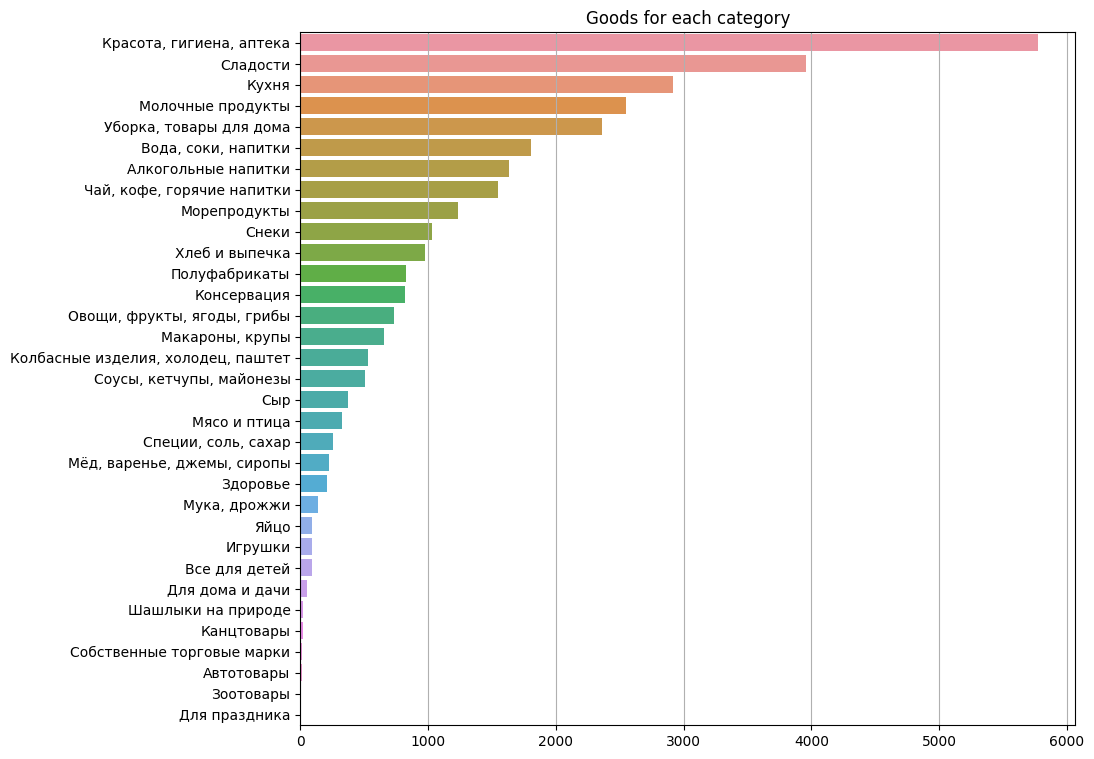

In [66]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df['cat1'].value_counts().values, y=df['cat1'].value_counts().index) 
None

In [67]:
set(df[df['cat1'] == 'Игрушки']['cat2'])

{'Игры, игрушки', 'Хобби'}

In [68]:
# названия в определенной категории
for i, j, k in zip(df.index, df[df['cat1'] ==  'От Перекрёстка']['name'], df[df['cat1'] ==  'От Перекрёстка']['cat2']):
    print(i, j, '|', k)

## CAT 2.5

Делаем кат3 в перекрестке кат2 в наших данных

In [69]:
for i in range(len(df)):
    if not str(df.loc[i, 'cat3']) == 'nan':
        df.loc[i, 'cat2'] =  df.loc[i, 'cat3']

In [70]:
df.sample(10)

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
30152,Виски Two Stacks Smoke & Mirrors односолодовый...,376297.jpg,"{'Производитель': 'Two Stacks Whiskey Co', 'Бр...",Алкогольные напитки,"Виски, бурбон",two stacks whiskey co two stacks ирландия виск...,two stacks whiskey co two stacks висковый соло...,виски two stacks smoke mirrors односолодовый,"Виски, бурбон"
22558,Масло сладкосливочное Искренне Ваш Традиционно...,40857.jpg,"{'Жирность, %': '81-90', 'Заменитель молочного...",Молочные продукты,Масло,81 90 дмитрогорский мз искренне ваш масло слив...,дмитрогорский мз искренне ваш масло сливочный ...,масло сладкосливочный искренне ваш традиционны...,Масло
21989,"Виски Glen Angel 40%, 700мл",267755.jpg,"{'Производитель': 'Clos Quebrada de Macul', 'Б...",Алкогольные напитки,Коктейли. Миксуем дома,clos quebrada de macul glen angel великобритан...,clos quebrada de macul glen angel солодовый во...,виски glen angel,Коктейли. Миксуем дома
27266,Куриная грудка с картофелем по-деревенски Шеф ...,352781.jpg,"{'Производитель': 'Продмастер ООО', 'Бренд': '...",Полуфабрикаты,Шеф Перекрёсток,продмастер ооо шеф перекрёсток россия грудка к...,продмастер ооо шеф перекрёсток грудка куриный ...,куриный грудка картофель деревенски шеф перекр...,Шеф Перекрёсток
26398,"Сыр полутвёрдый Viola Маасдам 45%, 220г",368262.jpg,"{'Тип сыра': 'Полутвёрдый', 'Производитель': '...",Сыр,Сыр,полутвёрдый valio viola россия молоко нормализ...,полутвёрдый valio viola молоко нормализовать п...,сыр полутвёрдый viola маасдать,Сыр
25034,"Соус Mivimex Кавказский особо острый, 200мл",45449.jpg,"{'Добавки': 'Без добавок', 'Производитель': 'Т...","Соусы, кетчупы, майонезы",Соусы,без добавка тпк биофуд острый mivimex овощ пер...,тпк биофуд mivimex перечный соус вода сахар ...,соус mivimex кавказский особо,Соусы
17808,"Гель-крем для душа Deonica Питание нежности, 2...",small_daa1ca5b63c96f63afbf18c5021397f5ffc6504c...,"{'Бренд': 'Deonica', 'Тип товара': 'Гель', 'Ма...","Красота, гигиена, аптека",Гели для душа,deonica гель 0.258 0.29 aqua sodium laureth su...,deonica гель aqua sodium laureth sulfate coc...,гель крем душа deonica питание нежность,NaN
987,"Набор одноразовых тарелок ND Play Чебурашка, 1...",small_15fb360bab649ab9979a9cf0894ea77346c21a33...,"{'Бренд': 'ND Play', 'Масса нетто, кг': '0.04'...",Кухня,Тарелки,nd play 0.04 0.04 картон 10 200 200 ооо свежий...,nd play картон ооо свежий ветер,набор одноразовый тарелка nd play чебурашка,NaN
2678,"Часы настенные Apeyron Electrics с фоторамкой,...",small_a0e9061cf6fab58edf14ab3bb61fc97712a2eb4f...,"{'Бренд': 'Apeyron', 'Масса нетто, кг': '0.3',...","Уборка, товары для дома",Предметы интерьера,apeyron 0.3 0.3 350 350 40 китай 0.3 кг 35 смо...,apeyron,часы настенный apeyron electrics фоторамка,NaN
27848,"Нектар Jumex Guava Nectar гуава, 1л",346837.jpg,"{'Бренд': 'Jumex', 'Производитель': 'Экспресс-...","Вода, соки, напитки",Нектары,jumex экспресс вендор мексика фруктовый ягодны...,jumex экспресс вендор фруктовые/ягодный нектар...,нектар jumex guava nectar,Нектары


### кат1 = Алкоголь

In [71]:
cat2_names = df.loc[df['cat1'] == 'Алкогольные напитки', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Вода, соки, напитки', 'cat2'].unique().tolist())


In [72]:
len(cat2_names)

74

In [73]:
cat2_names.sort()
cat2_names

['Бальзам',
 'Безалкогольное вино',
 'Безалкогольное вино',
 'Безалкогольное пиво',
 'Безалкогольное пиво',
 'Вермут',
 'Вино',
 'Виски, бурбон',
 'Вода',
 'Водка, Абсент',
 'Газированная',
 'Горячий шоколад',
 'Детская',
 'Детские смеси и заменители',
 'Джин',
 'Другие напитки',
 'Зеленый',
 'Зелёная линия',
 'Игристые вина',
 'Игристые вина',
 'Квас',
 'Кисели',
 'Кисломолочные продукты',
 'Коктейли. Миксуем дома',
 'Коктейли. Миксуем дома',
 'Кола',
 'Комбуча',
 'Компоты',
 'Кофе',
 'Кофейный напиток',
 'Лечебно-столовая',
 'Ликёры',
 'Маркет',
 'Медовуха',
 'Молочные',
 'Молочные коктейли',
 'Морсы',
 'Морсы, компоты, узвар',
 'Напитки',
 'Напитки, лёд',
 'Настойки',
 'Негазированная',
 'Нектары',
 'От 5 литров',
 'Пиво',
 'Пиво',
 'Питьевой',
 'Пр!ст',
 'Растворимый',
 'Растительные напитки',
 'Растительные продукты',
 'Ром',
 'Самогон',
 'Сбитень и узвары',
 'Сидр',
 'Сиропы',
 'Слабоалкогольные напитки',
 'Слабоалкогольные напитки',
 'Сладкие газированные напитки',
 'Смузи',
 'С

In [74]:
import difflib

s = difflib.SequenceMatcher()
full = []
for i in cat2_names:
    s.set_seq2(i)
    for n in (cat2_names):
        if n == i:
            continue
        s.set_seq1(n)
        full.append((i, n, s.ratio()))

In [75]:
full.sort(key=lambda x: x[2], reverse=True)

In [76]:
with open('cat_simialarity.txt', 'w') as fp:
    for i in range(len(full)):
        fp.write(f'{full[i][0]}\t{full[i][1]}\t{full[i][2]}\n')

In [77]:
def combine_categories(data_category, first_category, second_category, category_name):
    data_category[data_category == first_category] = category_name
    data_category[data_category == second_category] = category_name

    return data_category


In [78]:
df.loc[df['cat2'] == 'Утюги', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3


In [79]:
df['cat2'] = combine_categories(df['cat2'], 'Вермут', 'Вермуты, аперитивы', 'Вермуты, аперитивы')
df['cat2'] = combine_categories(df['cat2'], 'Водка, Абсент', 'Водка, абсент', 'Водка, абсент')
df['cat2'] = combine_categories(df['cat2'], 'Газированная', 'Негазированная', 'Вода')
df['cat2'] = combine_categories(df['cat2'], 'Игристое вино', 'Игристые вина', 'Игристые вина')
df['cat2'] = combine_categories(df['cat2'], 'Коктейли. Миксуем дома', 'Коктейли', 'Коктейли')
df['cat2'] = combine_categories(df['cat2'], 'Кофейный напиток', 'Кофе', 'Кофе')
df['cat2'] = combine_categories(df['cat2'], 'Ликеры, настойки, биттеры', 'Ликёры', 'Ликеры, настойки, биттеры')
df['cat2'] = combine_categories(df['cat2'], 'Молочные', 'Молочные коктейли', 'Молочные коктейли')
df['cat2'] = combine_categories(df['cat2'], 'Морсы', 'Морсы, компоты, узвар', 'Морсы, компоты, узвар')
df['cat2'] = combine_categories(df['cat2'], 'Компоты', 'Морсы, компоты, узвар', 'Морсы, компоты, узвар')
df['cat2'] = combine_categories(df['cat2'], 'Напитки', 'Напитки, лёд', 'Напитки, лёд')
df['cat2'] = combine_categories(df['cat2'], 'Ром', 'Джин', 'Ром, текила, джин')
df['cat2'] = combine_categories(df['cat2'], 'Ром, текила, джин', 'Текила', 'Ром, текила, джин')
df['cat2'] = combine_categories(df['cat2'], 'Сидр', 'Сидр, медовуха', 'Сидр, медовуха')
df['cat2'] = combine_categories(df['cat2'], 'Смузи', 'Смузи, кисель, морс', 'Смузи, кисель, морс')
df['cat2'] = combine_categories(df['cat2'], 'Травяной', 'Холодный чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'], 'Зеленый', 'Чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'], 'Медовуха', 'Сидр, медовуха', 'Сидр, медовуха')
df['cat2'] = combine_categories(df['cat2'], 'Соки, Нектары, Морсы', 'Соки', 'Соки')
df['cat2'] = combine_categories(df['cat2'], 'Соки, компоты', 'Морсы, компоты, узвар', 'Морсы, компоты, узвар')

df['cat2'][(df['cat2'] == 'Пиво') & (df['cat1']=='Вода, соки, напитки')] = 'Безалкогольное пиво'
df['cat1'][df['cat2']=='Безалкогольное пиво'] = 'Вода, соки, напитки'
df['cat1'][df['cat2']=='Безалкогольное вино'] = 'Вода, соки, напитки'




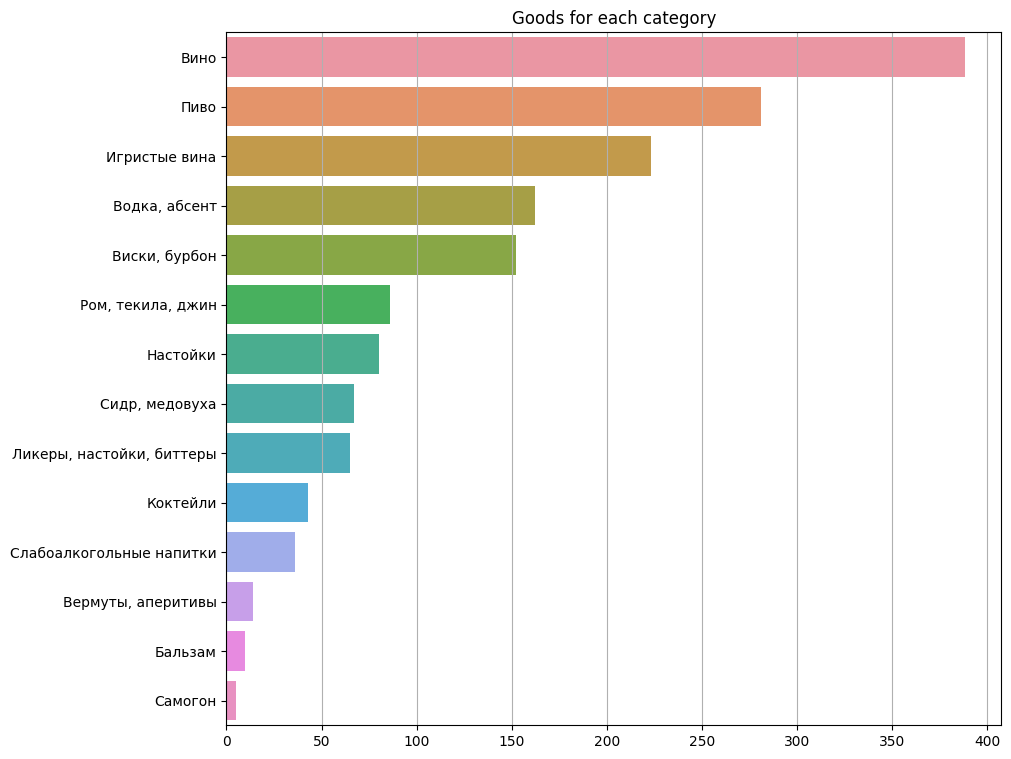

In [80]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Алкогольные напитки', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Алкогольные напитки', 'cat2'].value_counts().index) 
None

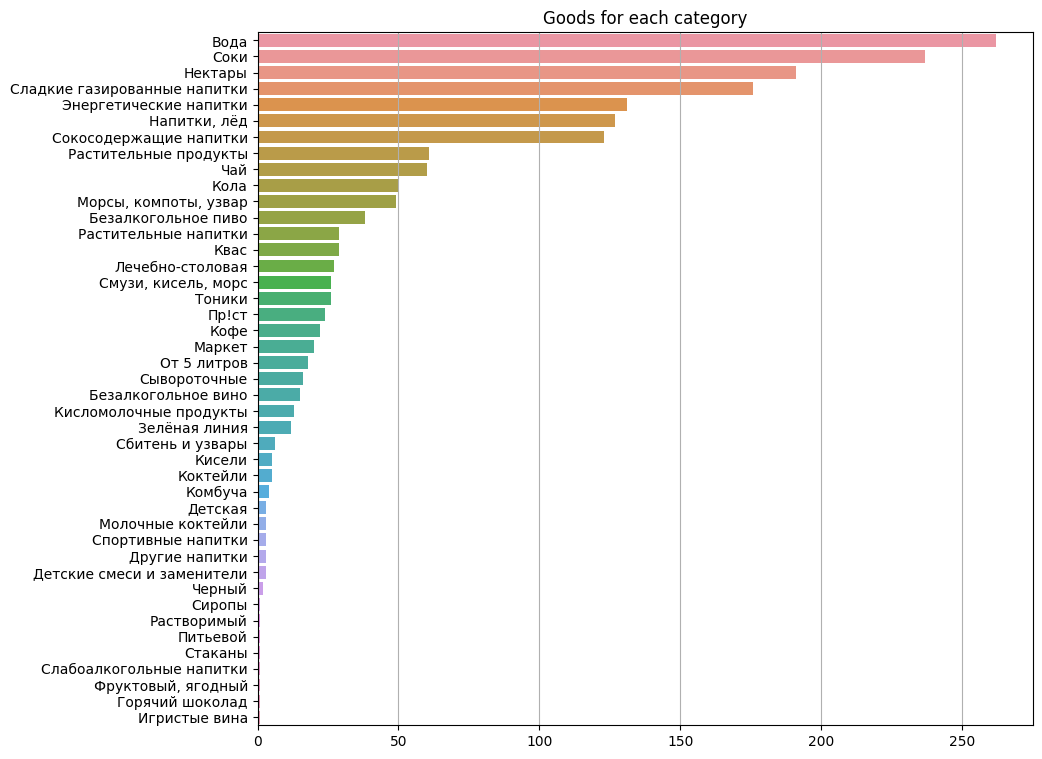

In [81]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Вода, соки, напитки', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Вода, соки, напитки', 'cat2'].value_counts().index) 
None

In [82]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'auchan_perekrestok_prepared.csv', index=False)

### Сладости, мед варенье джемы сиропы

In [83]:
cat2_names = df.loc[df['cat1'] == 'Сладости', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Мёд, варенье, джемы, сиропы', 'cat2'].unique().tolist())

In [84]:
len(cat2_names)

68

In [85]:
cat2_names.sort()
cat2_names

['Батончики',
 'Без глютена',
 'Большая упаковка',
 'Варенье',
 'Варенье',
 'Вафли',
 'Восточные сладости',
 'Восточные сладости, халва',
 'Десертные пасты',
 'Десерты и снеки',
 'Десерты, снеки',
 'Детские смеси и заменители',
 'Джем',
 'Джемы',
 'Джемы',
 'Диабетическая продукция',
 'Диабетическая продукция',
 'Диабетические сладости',
 'Драже',
 'Желейные, мармелад',
 'Зелёная линия',
 'Зефир',
 'Карамель, драже, леденцы',
 'Конфитюр',
 'Крекер',
 'Леденцы',
 'Маркет',
 'Маркет',
 'Марципан',
 'Мед',
 'Молочный Знак',
 'Мороженое',
 'Мёд',
 'Наборы конфет',
 'Орехи',
 'Пастила',
 'Печенье',
 'Пироги, сдоба, кексы, рулеты',
 'Пирожки, булочки',
 'Пирожные, десерты',
 'Пластинки',
 'Подушечки',
 'Порционное',
 'Пр!ст',
 'Пр!ст',
 'Правильные сладости',
 'Правильные сладости',
 'Пралине',
 'Протертые ягоды',
 'Пряники',
 'Растительные продукты',
 'Сиропы',
 'Сливочные, помадка, ирис',
 'Снеки',
 'Спортивное питание и БАД',
 'Суперфуд',
 'Суфле',
 'Сыр',
 'Сырки, суфле',
 'Творожки',
 '

In [86]:
df.loc[df['cat2'] == 'Шоколадные батончики', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
742,"Шоколадные батончики Nuts с орехами мультипак,...",small_d7d8f43eb7db217e13d9d6e061214aea8b8d7dd4...,"{'Бренд': 'Nuts', 'Упаковка': 'Флоу-пак', 'Тип...",Сладости,Шоколадные батончики,nuts флоу пак шоколадный батончик 8.1 26.7 0.0...,nuts шоколадный батончик молочный шоколад сах...,шоколадный батончик nuts орех мультипак,NaN
793,Батончик «Просто чудо» с вафлями и миндальной ...,small_6ca1b1eb4576c3dea3b61ec4792f7bff7ef33213...,"{'Бренд': 'Просто чудо', 'Упаковка': 'Флоу-пак...",Сладости,Шоколадные батончики,просто чудо флоу пак батончик 4.5 33 0.04 0.04...,просто чудо батончик сахар масло какао сывор...,батончик просто чудо вафля миндальный паста,NaN
800,Батончик шоколадный «ХРУТКА» с суфле и молочно...,small_4cfd8e6b9789057ebd76a25057b748f74ac14aee...,"{'Бренд': 'ХРУТКА', 'Белки на 100 г, г': '5', ...",Сладости,Шоколадные батончики,хрутка 5 22 0.171 0.176 сахар патока жир специ...,хрутка сахар патока жир специальный назначен...,батончик шоколадный хрутка суфле,NaN
856,"Шоколадный батончик «СТЕП» Super, 65 г",small_c9e9a9e4fa431a0397d3537e50a2364c106632f7...,"{'Бренд': 'СТЕП', 'Упаковка': 'Флоу-пак', 'Тип...",Сладости,Шоколадные батончики,степ флоу пак шоколадный батончик 7.6 25.1 0.0...,степ шоколадный батончик сахар патока арахис...,шоколадный батончик степ super,NaN
859,"Батончик Nuts Брауни, 60 г",small_4945e4825d1d9004276c7679e4de3a08c9452612...,"{'Бренд': 'Nuts', 'Белки на 100 г, г': '5.1', ...",Сладости,Шоколадные батончики,nuts 5.1 22 0.06 0.061 сахар патока пальмовый ...,nuts сахар патока пальмовый масло фундук це...,батончик nuts брауни,NaN
...,...,...,...,...,...,...,...,...,...
19727,Батончик Good Vibes с карамелью и кокосом в шо...,small_0c1c05081d7e46e9339d6d5886bdcc1ba7eb2a30...,"{'Бренд': 'Good Vibes', 'Белки на 100 г, г': '...",Сладости,Шоколадные батончики,good vibes 4.5 24 0.04 0.055 молокосодержащий ...,good vibes молокосодержащий сухой продукт мас...,батончик good vibes кокос шоколадный глазурь,NaN
19735,"Батончик «АККОНД» Гранднатс жареный арахис, ка...",small_93991d0bee59481f0d6690c2802daad9b9ee5b9b...,"{'Бренд': 'АККОНД', 'Тип товара': 'Батончик', ...",Сладости,Шоколадные батончики,акконда батончик 9 26 0.04 0.042 сахар арахис ...,акконда батончик сахар арахис патока жир ра...,батончик акконда гранднатс жареный арахис нуга,NaN
19738,"Марципановый батончик ZENTIS, 100 г",small_05617f445b98c1bdfe68e012ab1706116d9d082f...,"{'Бренд': 'ZENTIS', 'Упаковка': 'Фольга', 'Тип...",Сладости,Шоколадные батончики,zentis фольга шоколадный батончик 4.9 16 0.1 0...,zentis шоколадный батончик сахар миндаль 21% ...,марципановый батончик zentis,NaN
19748,"Батончик GRONDARD кокосовый малина, 40 г",small_9b6b819789402853cceb07e586fda1e3ef7c561e...,"{'Бренд': 'GRONDARD', 'Вкус/Аромат': 'Кокосовы...",Сладости,Шоколадные батончики,grondard кокосовый 6.5 14 0.04 0.0426 кокосовы...,grondard кокосовый стружка глюкозный фруктозн...,батончик grondard кокосовый малина,NaN


In [87]:
df['cat2'] = combine_categories(df['cat2'], 'Восточные сладости', 'Восточные сладости, халва', 'Восточные сладости, халва')
df['cat2'] = combine_categories(df['cat2'], 'Десерты и снеки', 'Десерты, снеки', 'Десерты и снеки')
df['cat2'] = combine_categories(df['cat2'], 'Джем', 'Джемы', 'Джемы')
df['cat2'] = combine_categories(df['cat2'], 'Диабетическая продукция', 'Диабетические сладости', 'Диабетическая продукция')
df['cat2'] = combine_categories(df['cat2'], 'Драже', 'Леденцы', 'Карамель, драже, леденцы')
df['cat2'] = combine_categories(df['cat2'], 'Мед', 'Мёд', 'Мёд')
df['cat2'] = combine_categories(df['cat2'], 'Шоколадные и ореховые пасты', 'Десертные пасты', 'Шоколадные и ореховые пасты')
df['cat2'] = combine_categories(df['cat2'], 'Шоколадные', 'Шоколадные батончики', 'Шоколадные конфеты')
df['cat2'] = combine_categories(df['cat2'], 'Снеки', 'Десерты и снеки', 'Десерты и снеки')
df['cat2'] = combine_categories(df['cat2'], 'Печенье', 'Свежее печенье', 'Печенье')

df['cat1'][df['cat2']=='Мёд'] = 'Мёд, варенье, джемы, сиропы'
df['cat1'][df['cat2']=='Джемы'] = 'Мёд, варенье, джемы, сиропы'
df['cat1'][df['cat2']=='Варенье'] = 'Мёд, варенье, джемы, сиропы'





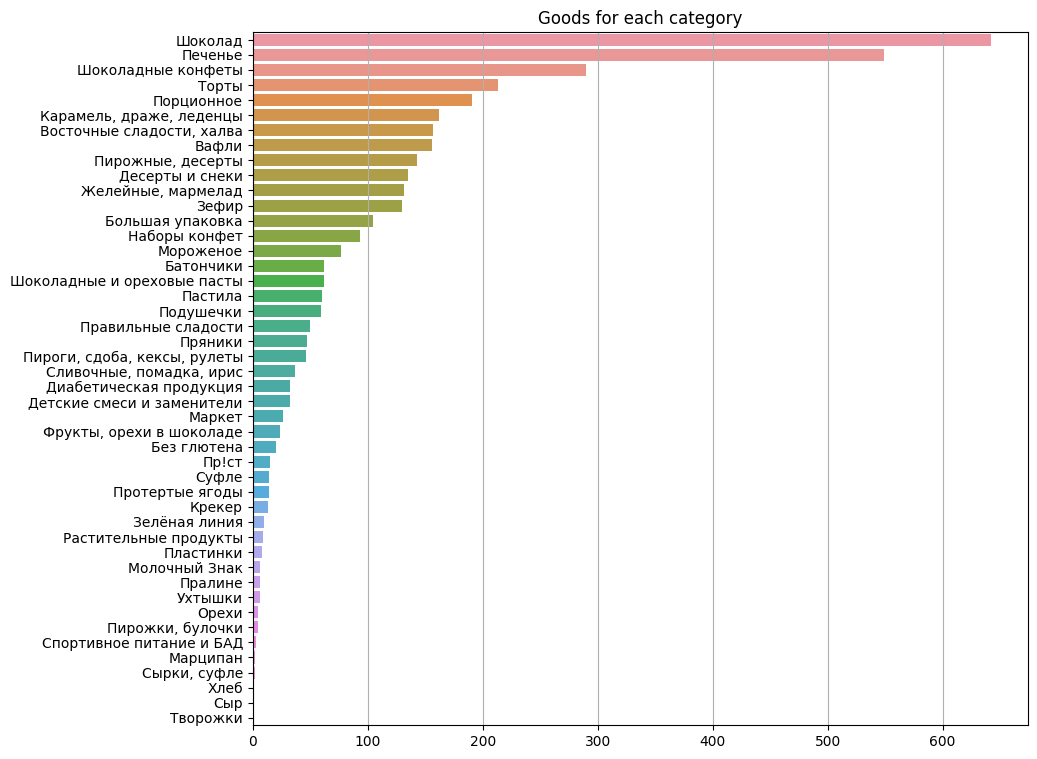

In [88]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Сладости', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Сладости', 'cat2'].value_counts().index) 
None

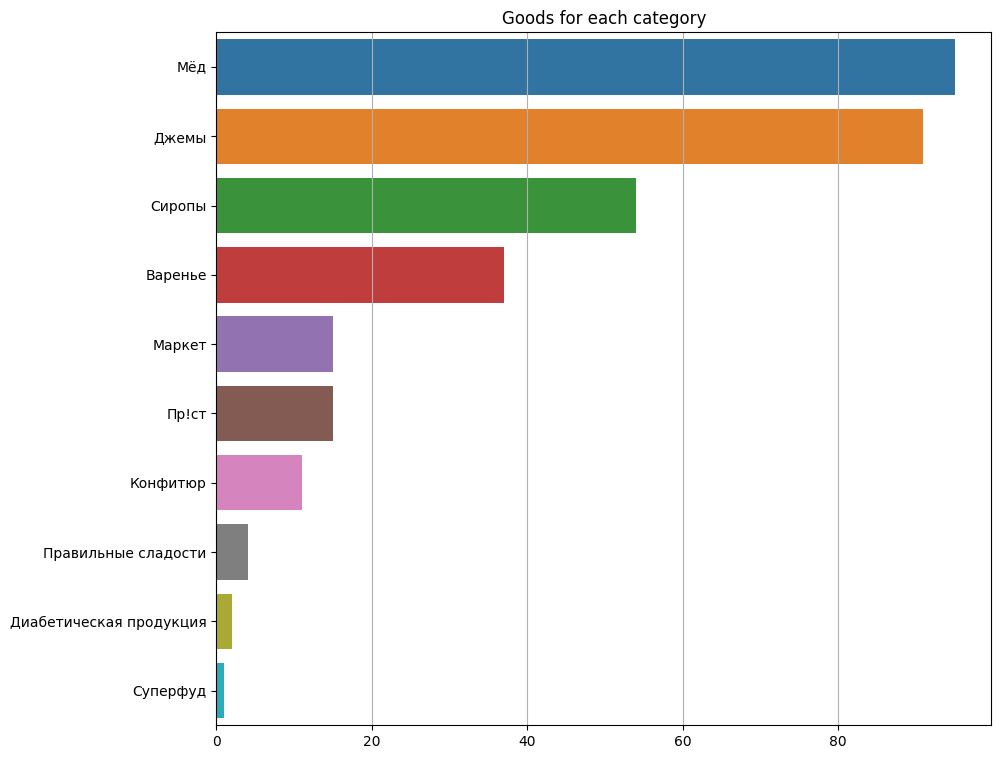

In [89]:
plt.figure(figsize=(10, 9))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Мёд, варенье, джемы, сиропы', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Мёд, варенье, джемы, сиропы', 'cat2'].value_counts().index) 
None

In [90]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'auchan_perekrestok_prepared.csv', index=False)

### Уборка, товары для дома

In [91]:
cat2_names = df.loc[df['cat1'] == 'Уборка, товары для дома', 'cat2'].unique().tolist()

In [92]:
len(cat2_names)

55

In [93]:
cat2_names.sort()
cat2_names

['Home Story',
 'Альбомы',
 'Баки для белья',
 'Бумажная и ватная продукция',
 'Бумажные полотенца',
 'Вазы',
 'Ведра, тазы',
 'Вешалки, чехлы для одежды',
 'Влажные салфетки',
 'Всё для дачи и сада',
 'Всё для хранения',
 'Для мытья посуды',
 'Для плит и духовок',
 'Для полов',
 'Для посудомоечных и стиральных машин',
 'Для стирки и ухода за вещами',
 'Для стёкол и зеркал',
 'Для устранения засоров',
 'До и после еды',
 'Дозаторы',
 'Коврики',
 'Ковры, коврики придверные',
 'Корзины, короба, контейнеры',
 'Лампочки',
 'Лампочки и батарейки',
 'Люстры, светильники, бра',
 'Маркет',
 'Мелочи для дома',
 'Мыльницы',
 'Наборы для уборки',
 'Настольные лампы, ночники',
 'Одеяла, подушки',
 'Пледы, покрывала, декоративные подушки',
 'Полки, шторки, карнизы',
 'Постельное белье',
 'Пр!ст',
 'Предметы интерьера',
 'Принадлежности для ванны и туалета',
 'Прищепки, шпагат',
 'Прочие световые приборы',
 'Ролики, формодержатели',
 'Свечи, подсвечники, ароматизаторы',
 'Совки, веники',
 'Стаканы, 

In [94]:
df.loc[df['cat2'] == 'Капсулы', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3


In [95]:
df['cat2'] = combine_categories(df['cat2'], 'Щетки, черенки', 'Щетки и черенки', 'Щетки и черенки')
df['cat2'] = combine_categories(df['cat2'], 'Швабры, насадки, стекломои', 'Швабры', 'Швабры, насадки, стекломои')
df['cat2'] = combine_categories(df['cat2'], 'Универсальные', 'Универсальные средства', 'Универсальные средства')
df['cat2'] = combine_categories(df['cat2'], 'Тряпки, салфетки и чистящие средства', 'Салфетки, губки, тряпки', 'Салфетки, губки, тряпки и чистящие средства')
df['cat2'] = combine_categories(df['cat2'], 'Батарейки и аккумуляторы', 'Лампочки', 'Лампочки и батарейки')
df['cat2'] = combine_categories(df['cat2'], 'Лампочки и батарейки', 'Лампы', 'Лампочки, батарейки и аккумуляторы')
df['cat2'] = combine_categories(df['cat2'], 'Бумажные полотенца', 'Бумажная и ватная продукция', 'Бумажная и ватная продукция')
df['cat2'] = combine_categories(df['cat2'], 'Для полов', 'Для пола, ковров и мебели', 'Для пола, ковров и мебели')
df['cat2'] = combine_categories(df['cat2'], 'Для прочистки труб', 'Для устранения засоров', 'Для устранения засоров')
df['cat2'] = combine_categories(df['cat2'], 'Перчатки', 'Перчатки, спецодежда, защита', 'Перчатки, спецодежда, защита')
df['cat2'] = combine_categories(df['cat2'], 'Порошки', 'Таблетки', 'Для посудомоечных и стиральных машин')
df['cat2'] = combine_categories(df['cat2'], 'Прочие световые приборы', 'Люстры, светильники, бра', 'Люстры, светильники, бра')
df['cat2'] = combine_categories(df['cat2'], 'Рулетки строительные', 'Рулетки, уровни', 'Рулетки, уровни')
df['cat2'] = combine_categories(df['cat2'], 'Ведра и тазы', 'Ведра, тазы', 'Ведра, тазы')
df['cat2'] = combine_categories(df['cat2'], 'Наборы для уборки', 'Совки, веники', 'Совки, веники')
df['cat2'] = combine_categories(df['cat2'], 'Прищепки, шпагат', 'Сушилки для белья, прищепки, шпагат', 'Сушилки для белья, прищепки, шпагат')
df['cat2'] = combine_categories(df['cat2'], 'Насадки для швабр, тряпки', 'Швабры, насадки, стекломои', 'Швабры, насадки, стекломои')
df['cat2'] = combine_categories(df['cat2'], 'Капсулы', 'Для посудомоечных и стиральных машин', 'Для посудомоечных и стиральных машин')



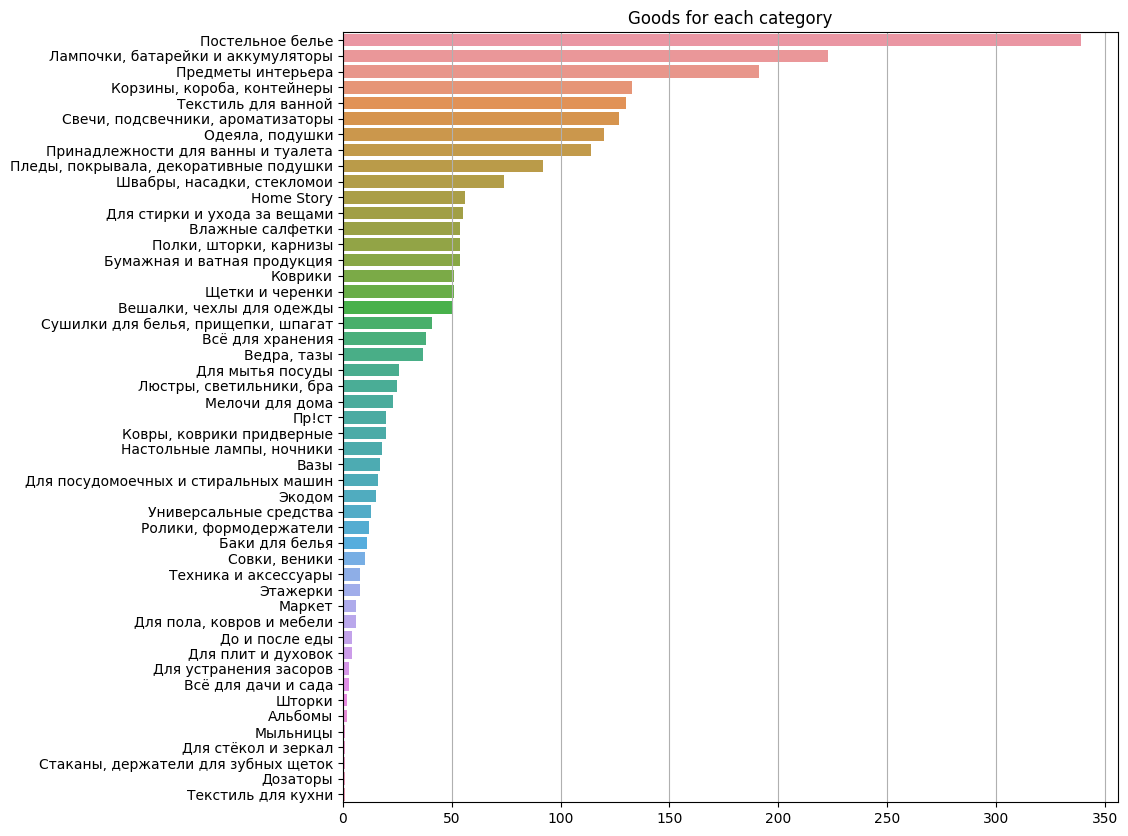

In [96]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Уборка, товары для дома', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Уборка, товары для дома', 'cat2'].value_counts().index) 
None

### Молочные продукты, сыр

In [97]:
cat2_names = df.loc[df['cat1'] == 'Молочные продукты', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Сыр', 'cat2'].unique().tolist())


In [98]:
len(cat2_names)

57

In [99]:
cat2_names.sort()
cat2_names

['Греческий',
 'Густой',
 'Десерты и снеки',
 'Детские молочные продукты',
 'Диабетическая продукция',
 'Закуски',
 'Зелёная линия',
 'Зелёная линия',
 'Йогурты',
 'Кексы',
 'Кефир, снежок, закваски',
 'Кисломолочные напитки',
 'Кисломолочные продукты',
 'Кокосовое молоко',
 'Копченые, снеки',
 'Маргарин',
 'Маргарин, спред',
 'Маркет',
 'Маркет',
 'Масло',
 'Молодые, рассольные',
 'Молоко',
 'Молочные коктейли',
 'Молочные консервы',
 'Молочный Знак',
 'Мягкие и творожные',
 'Напитки с пользой',
 'Напитки, лёд',
 'Национальные продукты',
 'Пирожные, десерты',
 'Питьевой',
 'Пр!ст',
 'Пр!ст',
 'Растительное масло',
 'Растительные напитки',
 'Растительные продукты',
 'Ряженка, варенец, простокваша',
 'Сгущённое молоко',
 'Сливки',
 'Сливочное',
 'Смеси орехов и сухофруктов',
 'Сметана',
 'Смузи, кисель, морс',
 'Спред',
 'Суперфуд',
 'Сывороточные',
 'Сыр',
 'Сыр',
 'Сырки, суфле',
 'Твердые и полутвердые',
 'Творог',
 'Творог, творожная масса',
 'Творожки',
 'Топленое',
 'Торты',
 'Шок

In [100]:
df.loc[df['cat2'] == 'Ореховые и другие масла', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3


In [101]:
df['cat2'] = combine_categories(df['cat2'], 'Шоколадное', 'Сливочное', 'Масло')
df['cat2'] = combine_categories(df['cat2'], 'Греческий', 'Густой', 'Йогурты')
df['cat2'] = combine_categories(df['cat2'], 'Кисломолочные напитки', 'Кисломолочные продукты', 'Кисломолочные продукты')
df['cat2'] = combine_categories(df['cat2'], 'Маргарин', 'Маргарин, спред', 'Маргарин, спред')
df['cat2'] = combine_categories(df['cat2'], 'Молочные консервы', 'Сгущённое молоко', 'Сгущённое молоко')
df['cat2'] = combine_categories(df['cat2'], 'Творог', 'Творог, творожная масса', 'Творог, творожная масса')
df['cat2'] = combine_categories(df['cat2'], 'Питьевой', 'Густой', 'Йогурты')
df['cat2'] = combine_categories(df['cat2'], 'Растительное масло', 'Подсолнечные масла', 'Подсолнечные масла')
df['cat2'] = combine_categories(df['cat2'], 'Маргарин, спред', 'Спред', 'Маргарин, спред')


df['cat2'][(df['cat1']=='Молочные продукты')&(df['cat2']=='Мягкие и творожные')] = 'Сырки, суфле'
df['cat1'][df['cat2']=='Шоколадные и ореховые пасты'] = 'Сладости'
df['cat1'][df['cat2']=='Сыр'] = 'Сыр'



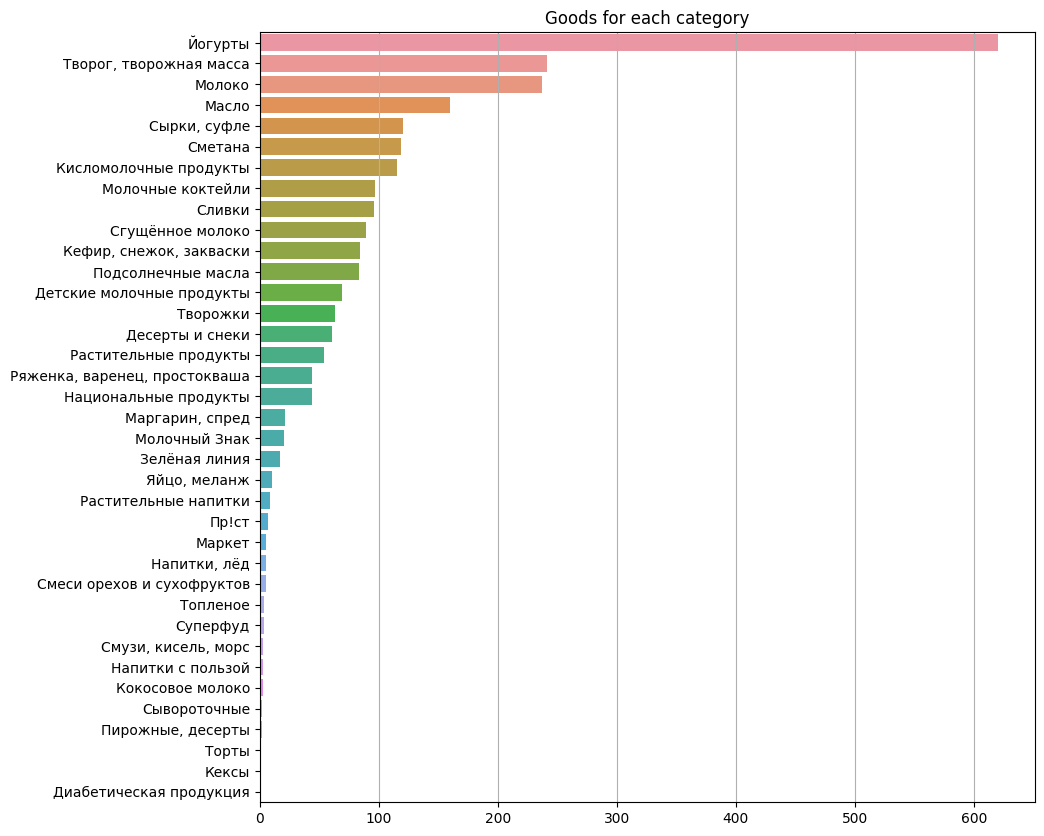

In [102]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Молочные продукты', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Молочные продукты', 'cat2'].value_counts().index) 
None

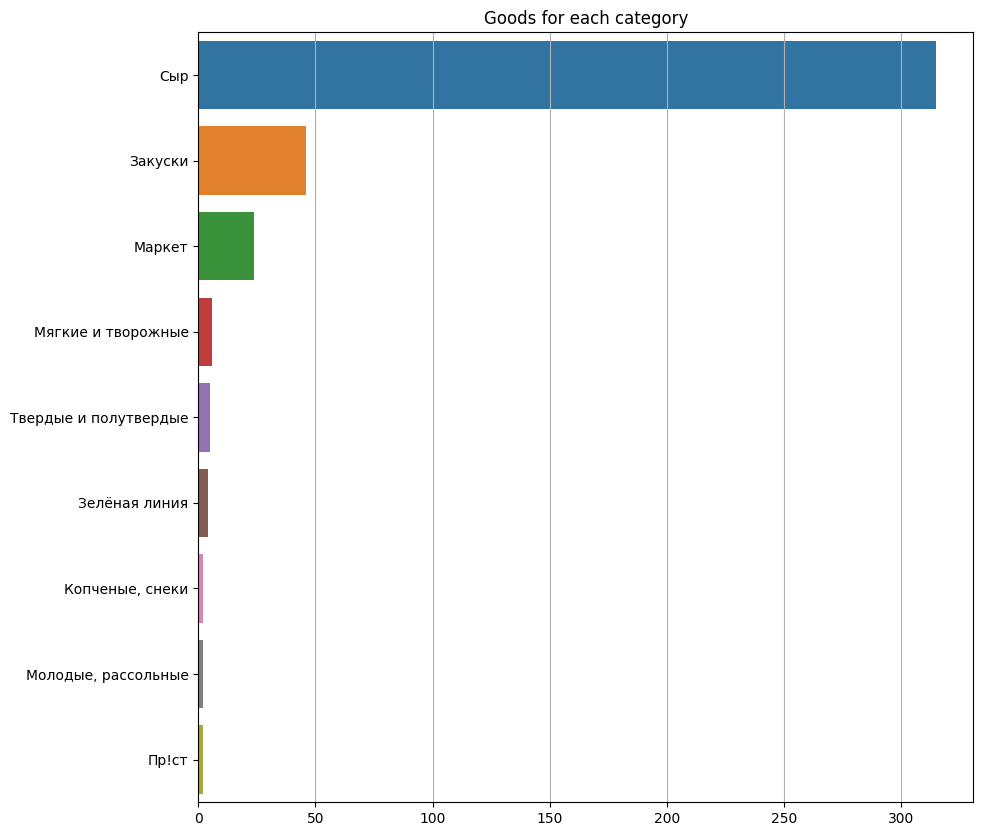

In [103]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Сыр', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Сыр', 'cat2'].value_counts().index) 
None

### Кухня

In [104]:
cat2_names = df.loc[df['cat1'] == 'Кухня', 'cat2'].unique().tolist()

In [105]:
len(cat2_names)

49

In [106]:
cat2_names.sort()
cat2_names

['Home Story',
 'Аксессуары для выпечки',
 'Аксессуары для сервировки стола',
 'Аксессуары, наборы',
 'Барные и винные аксессуары',
 'Блюда, менажницы',
 'Бокалы, барные аксессуары',
 'Бокалы, фужеры',
 'Всё для дачи и сада',
 'Всё для шашлыка',
 'До и после еды',
 'Емкости для напитков',
 'Заварочные чайники, френч-прессы',
 'Казаны',
 'Канцелярия',
 'Кастрюли, ковши',
 'Кружки',
 'Крышки, ручки',
 'Кухонные полотенца',
 'Лопатки, шумовки, половники',
 'Маркет',
 'Мелочи для дома',
 'Ножи, разделочные доски',
 'Одноразовая посуда',
 'Подушки на стулья',
 'Пр!ст',
 'Прихватки',
 'Проточные фильтры',
 'Прочие принадлежности для кухни',
 'Салатники, миски, креманки',
 'Салфетки',
 'Салфетки, скатерти',
 'Скатерти',
 'Сковороды, сотейники',
 'Сменные картриджи к проточным фильтрам',
 'Сменные кассеты для фильтров-кувшинов',
 'Стаканы, бокалы',
 'Стаканы, стопки, рюмки',
 'Столовые приборы',
 'Тарелки',
 'Терки, овощерезки, прессы',
 'Термосы, термокружки',
 'Фартуки',
 'Фильтр-кувшины',
 

In [107]:
df.loc[df['cat2'] == 'Аксессуары, наборы', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
661,Трубочки бумажные одноразовые для напитков 195...,small_0a70de5b3f466da5b797e6a56ad78c3f2863bf26...,"{'Масса нетто, кг': '0.015', 'Масса брутто, кг...",Кухня,"Аксессуары, наборы",0.015 0.015 картон 20 70 200 россия 0.015 кг 1...,картон,трубочка бумажный одноразовый напиток,NaN
775,"Набор одноразовых мисок Actuel, 20х600 мл",small_afbf4bf7f66f698dea24a914a1f4ddbf323f45ef...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.3', ...",Кухня,"Аксессуары, наборы",actuel 0.3 0.3 55 215 315 россия 0.3 кг 20х600 мл,actuel,набор одноразовый миска actuel,NaN
776,Набор одноразовых ножей Actuel прозрачные 17х3...,small_0dfcc862835bfc3378a7ec00cbfd955f2abff665...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.1', ...",Кухня,"Аксессуары, наборы",actuel 0.1 0.1 20 85 265 россия 0.1 кг прозрач...,actuel,набор одноразовый нож actuel,NaN
782,"Набор одноразовых чашек Actuel коричневые, 10х...",small_30952e187f41acfa8d726c7bd26e1d14f45112b2...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.2', ...",Кухня,"Аксессуары, наборы",actuel 0.2 0.2 80 125 325 россия 0.2 кг коричн...,actuel,набор одноразовый чашка actuel,NaN
787,Набор одноразовых чайных ложек Actuel прозрачн...,small_88ef159c9fe25585cc45a58e729c4b3bf79df4cb...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.1', ...",Кухня,"Аксессуары, наборы",actuel 0.1 0.1 30 65 19 россия 0.1 кг прозрачн...,actuel,набор одноразовый чайный ложка actuel,NaN
791,"Набор одноразовой посуды Actuel, на 6 персон",small_13ce48852700ce2832177bc5029e26222a22afef...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.5', ...",Кухня,"Аксессуары, наборы",actuel 0.5 0.5 85 195 285 россия 0.5 кг 6,actuel,набор одноразовый посуда actuel персона,NaN
803,Контейнер пластиковый для пищевой продукции с ...,small_ad88ca646eb37591882b820a5371b120c58c68bf...,"{'Масса нетто, кг': '0.1', 'Масса брутто, кг':...",Кухня,"Аксессуары, наборы",0.1 0.1 полиэтилентерефталат 160 160 85 ооо по...,полиэтилентерефталат ооо полиэр,контейнер пластиковый пищевой продукция крышка,NaN
804,Набор одноразовых вилкок Actuel прозрачные 17 ...,small_68d405fe150134636be94d05077377b9861b8b00...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.1', ...",Кухня,"Аксессуары, наборы",actuel 0.1 0.1 15 95 255 россия 0.1 кг прозрач...,actuel,набор одноразовый вилкок actuel,NaN
805,"Набор одноразовых вилкок «Мистерия» зеленые, 1...",small_831aab8cbe66cd6c6de6bcdfd7dd833622417a40...,"{'Бренд': 'Мистерия', 'Масса нетто, кг': '0.06...",Кухня,"Аксессуары, наборы",мистерия 0.06 0.06 19 90 10 россия 0.06 кг зел...,мистерия,набор одноразовый вилкок мистерия штука,NaN
807,"Набор одноразовых вилкок «Мистерия» красные, 1...",small_8432fe702047e73bc2ee197251867a7e4824ee1b...,"{'Бренд': 'Мистерия', 'Масса нетто, кг': '0.06...",Кухня,"Аксессуары, наборы",мистерия 0.06 0.06 190 90 10 россия 0.06 кг кр...,мистерия,набор одноразовый вилкок мистерия штука,NaN


In [108]:
df['cat2'] = combine_categories(df['cat2'], 'Бокалы, барные аксессуары', 'Бокалы, фужеры', 'Бокалы, барные аксессуары')
df['cat2'] = combine_categories(df['cat2'], 'Салфетки', 'Скатерти', 'Салфетки, скатерти')
df['cat2'] = combine_categories(df['cat2'], 'Стаканы', 'Стаканы, бокалы', 'Стаканы, стопки, рюмки')
df['cat2'] = combine_categories(df['cat2'], 'Формы для выпечки', 'Формы для выпечки, запекания', 'Формы для выпечки, запекания')
df['cat2'] = combine_categories(df['cat2'], 'Заварочные чайники, френч-прессы', 'Чайники, турки, кофеварки', 'Заварочные чайники, турки')
df['cat2'] = combine_categories(df['cat2'], 'Проточные фильтры', 'Сменные картриджи к проточным фильтрам', 'Проточные фильтры, картириджи')


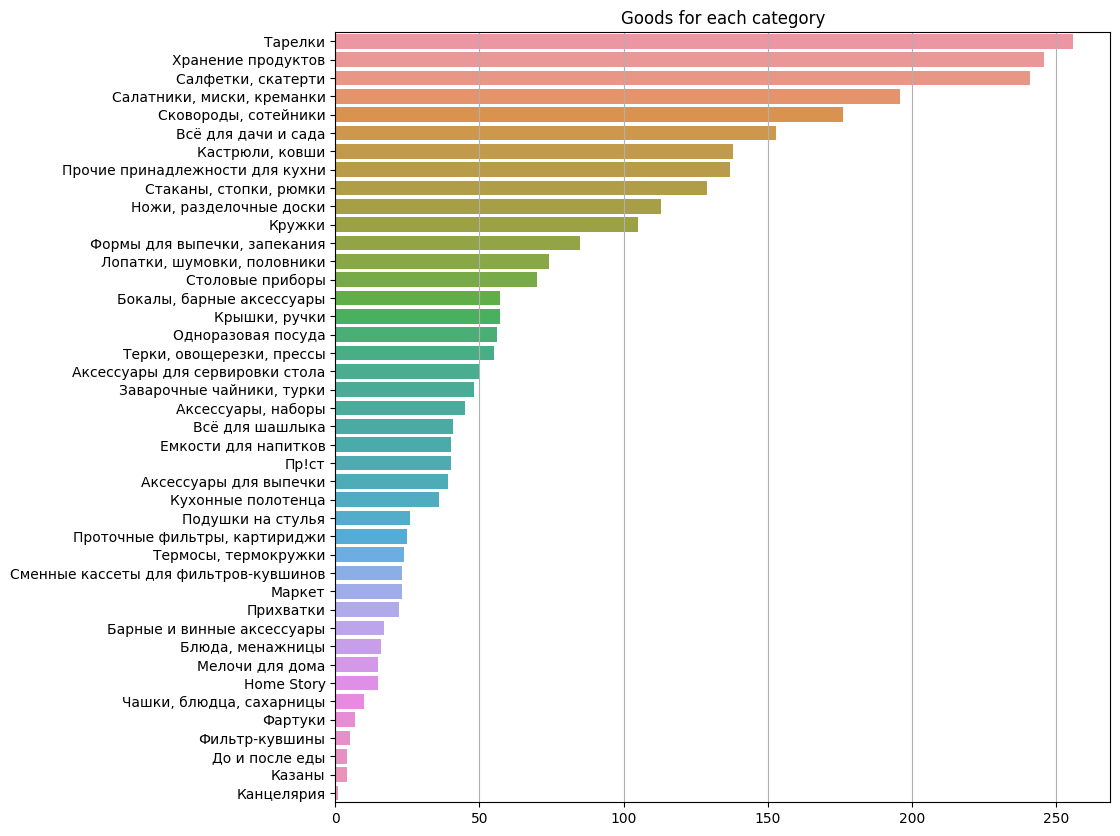

In [109]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Кухня', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Кухня', 'cat2'].value_counts().index) 
None

### Красота, гигиена аптека, Здоровье

In [110]:
cat2_names = df.loc[df['cat1'] == 'Красота, гигиена, аптека', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Здоровье', 'cat2'].unique().tolist())


In [111]:
len(cat2_names)

90

In [112]:
cat2_names.sort()
cat2_names

['Home Story',
 'Аксессуары для волос',
 'Аксессуары для макияжа',
 'Антибактериальные\xa0средства',
 'Аптека',
 'Бальзамы, кондиционеры',
 'Батончики',
 'Брови',
 'Ватные диски и палочки',
 'Галантерейные аксессуары',
 'Гели для душа',
 'Глаза',
 'Губки, мочалки для душа',
 'Губы',
 'Дезодоранты',
 'Дезодоранты и антиперспиранты',
 'Декоративные наборы',
 'Депиляция и эпиляция',
 'Диабетическая продукция',
 'Диабетическая продукция',
 'Диабетические напитки',
 'Для детей',
 'Жидкое мыло',
 'Зубные нити, зубочистки',
 'Зубные пасты, гели, порошки',
 'Зубные щетки',
 'Коррекция фигуры',
 'Косметические наборы',
 'Кремы для\xa0ног',
 'Кремы, сыворотки для лица',
 'Кремы\xa0для рук\xa0и ногтей',
 'Кусковое мыло',
 'Лаки и средства для ногтей',
 'Лицо',
 'Маникюрные принадлежности',
 'Маркет',
 'Маски для лица',
 'Маски и уход за волосами',
 'Молочко, лосьон, крем, масло',
 'Мочалки и губки',
 'Мыло',
 'Напитки с пользой',
 'Ополаскиватели',
 'Очки и оправы',
 'Пастила',
 'Пена и соль для 

In [113]:
df.loc[df['cat2'] == 'Маски для лица', :]

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
6827,Очищающая bio маска-пилинг с пробиотиками evel...,small_ef40711e62f03bf1d75ac4f7547bdd5028914c5b...,"{'Бренд': 'Еveline', 'Масса нетто, кг': '0.016...","Красота, гигиена, аптека",Маски для лица,еveline 0.0168 0.0173 aqua water glycerin ethy...,еveline aqua water glycerin ethylhexyl ste...,очищать bio маска пилинг пробиотик eveline pow...,NaN
6830,Маска для лица Garnier Увлажнение+Сияние Сакур...,small_345c163f3b66ef3b8681f0c96195da7dcc9b2466...,"{'Бренд': 'Garnier', 'Масса нетто, кг': '0.032...","Красота, гигиена, аптека",Маски для лица,garnier 0.032 0.041 aqua water propylene glyco...,garnier aqua / water propylene glycol glycer...,маска лицо garnier увлажнение+сияние сакура тк...,NaN
6875,Маска для лица тканевая Professor SkinGOOD Омо...,small_67e83fa62123f1a2e25eac03f3d693c03a3eef7b...,"{'Бренд': 'Professor SkinGOOD', 'Вид упаковки'...","Красота, гигиена, аптека",Маски для лица,professor skingood пакет любой маска 0.039 0.0...,professor skingood пакет маска aqua water g...,маска лицо тканевый professor skingood омолажи...,NaN
6876,Маска для лица «Витэкс» LikeMe Красивая кожа В...,small_f11885f077247eaebdebe166736c7d09ed0571f2...,"{'Бренд': 'Витэкс', 'Вид упаковки': 'Туба', 'П...","Красота, гигиена, аптека",Маски для лица,витэкс туба женский маска 0.075 0.089 вода гиа...,витэкс туба маска вода гиалуронат натрий гли...,маска лицо витэкс likeme красивый кожа витамин...,NaN
6877,Маска для лица «Витэкс» Aloe 97% Ночная антист...,small_6eb4f195d9531b0edaf2d9eb743cf8127022157c...,"{'Бренд': 'Витэкс', 'Вид упаковки': 'Туба', 'П...","Красота, гигиена, аптека",Маски для лица,витэкс туба женский маска 0.075 0.09 вода сок ...,витэкс туба маска вода сок лист aloe barbaden...,маска лицо витэкс aloe ночной антистресс несмы...,NaN
...,...,...,...,...,...,...,...,...,...
16614,Маска для лица Jkosmec Skin Solution с гиалуро...,small_9a986bd5c30b6466df593496644b26c6525b6314...,"{'Бренд': 'Jkosmec', 'Масса нетто, кг': '0.025...","Красота, гигиена, аптека",Маски для лица,jkosmec 0.025 0.035 water glycerin polysorbate...,jkosmec water glycerin polysorbate 80 carbo...,маска лицо jkosmec skin solution гиалуронов ки...,NaN
16621,Маска для лица Consly с экстрактом карамболы в...,small_41e5339ad51c7c0056f5bdcad04abed9b3c2f78d...,"{'Бренд': 'CONSLY', 'Масса нетто, кг': '0.02',...","Красота, гигиена, аптека",Маски для лица,consly 0.02 0.023 water glycerin propylene gly...,consly water glycerin propylene glycol alco...,маска лицо consly экстракт карамбола выводить ...,NaN
16627,Маска для лица The nicess Vegan очищение и вит...,small_44f0f897a5a2206ede7d8d72b528b5d52b8a9258...,"{'Бренд': 'The nicess', 'Тип товара': 'Маска',...","Красота, гигиена, аптека",Маски для лица,the nicess маска пакет женский 0.043 0.05 wate...,the nicess маска пакет water glycerin diprop...,маска лицо the nicess vegan очищение витаминиз...,NaN
16630,Маска для лица Elizavecca Collagen Deep Power ...,small_9f55d3ade3c6c490d612579e18787c9a91963086...,"{'Бренд': 'Elizavecca', 'Масса нетто, кг': '0....","Красота, гигиена, аптека",Маски для лица,elizavecca 0.023 0.043 water glycerin dipropyl...,elizavecca water glycerin dipropylene glycol...,маска лицо elizavecca collagen deep power ring...,NaN


In [114]:
df['cat2'] = combine_categories(df['cat2'], 'Дезодоранты', 'Дезодоранты и антиперспиранты', 'Дезодоранты и антиперспиранты')
df['cat2'] = combine_categories(df['cat2'], 'Прокладки гигиенические', 'Прокладки ежедневные', 'Прокладки')
df['cat2'] = combine_categories(df['cat2'], 'Средства\xa0для бритья', 'Средства\xa0после\xa0бритья', 'Средства для бритья')
df['cat2'] = combine_categories(df['cat2'], 'Стайлинг волос', 'Стайлинг для волос', 'Стайлинг для волос')
df['cat2'] = combine_categories(df['cat2'], 'Уход за лицом', 'Средства для умывания\xa0и очищения', 'Уход за лицом')
df['cat2'] = combine_categories(df['cat2'], 'Антибактериальные\xa0средства', 'Антибактериальные\xa0средства', 'Антибактериальные средства')
df['cat2'] = combine_categories(df['cat2'], 'Губы', 'Уход за губами', 'Помада')
df['cat2'] = combine_categories(df['cat2'], 'Уход для волос', 'Уход за волосами', 'Уход за волосами')
df['cat2'] = combine_categories(df['cat2'], 'Скрабы,\xa0пилинги для лица', 'Скрабы,\xa0пилинги для лица', 'Скрабы, пилинги для лица')
df['cat2'] = combine_categories(df['cat2'], 'Зубные пасты, гели, порошки', 'Прочие товары для полости рта', 'Зубные пасты, гели, порошки')
df['cat2'] = combine_categories(df['cat2'], 'Уход за руками', 'Кремы\xa0для рук\xa0и ногтей', 'Уход за руками')
df['cat2'] = combine_categories(df['cat2'], 'Кремы для\xa0ног', 'Кремы для\xa0ног', 'Кремы для ног')
df['cat2'] = combine_categories(df['cat2'], 'Средства личной гигиены', 'Прокладки', 'Прокладки')
df['cat2'] = combine_categories(df['cat2'], 'Уход за волосами', 'Маски и уход за волосами', 'Уход за волосами')
df['cat2'] = combine_categories(df['cat2'], 'Тампоны', 'Прокладки', 'Прокладки и тампоны')



df['cat1'][df['cat2']=='Уход, гигиена'] = 'Зоотовары'
df['cat1'][df['cat1']=='Птица, мясо'] = 'Мясо и птица'


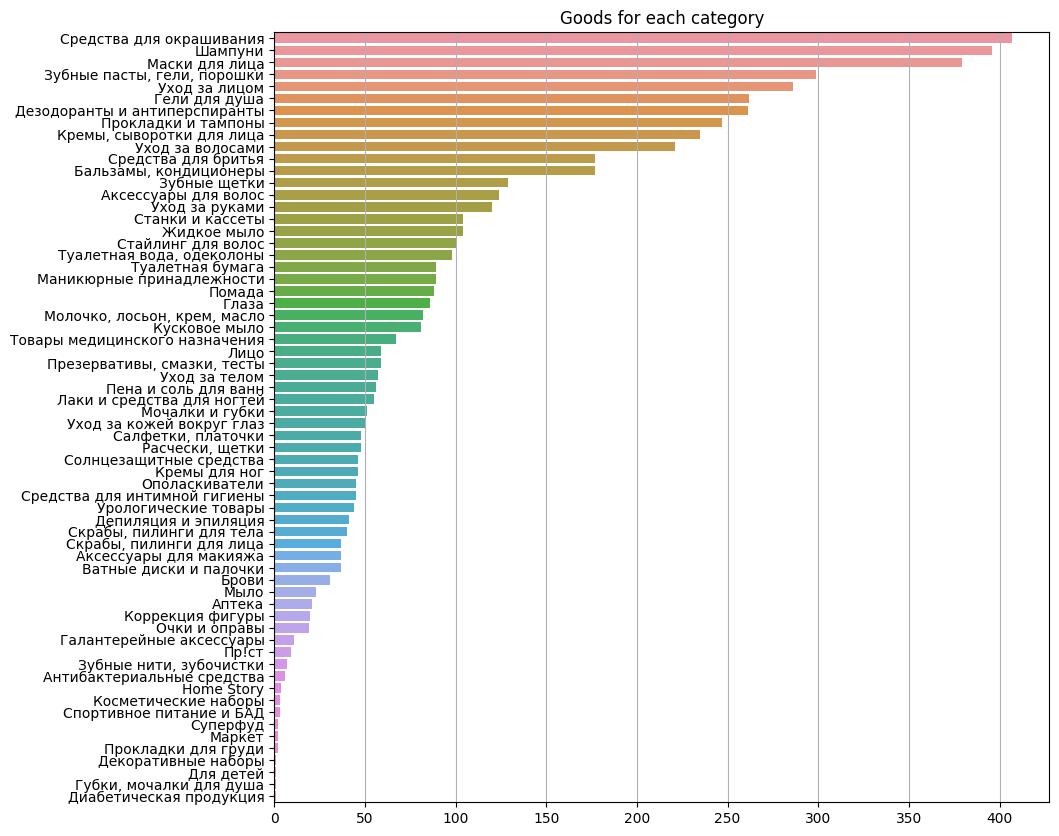

In [115]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Красота, гигиена, аптека', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Красота, гигиена, аптека', 'cat2'].value_counts().index) 
None

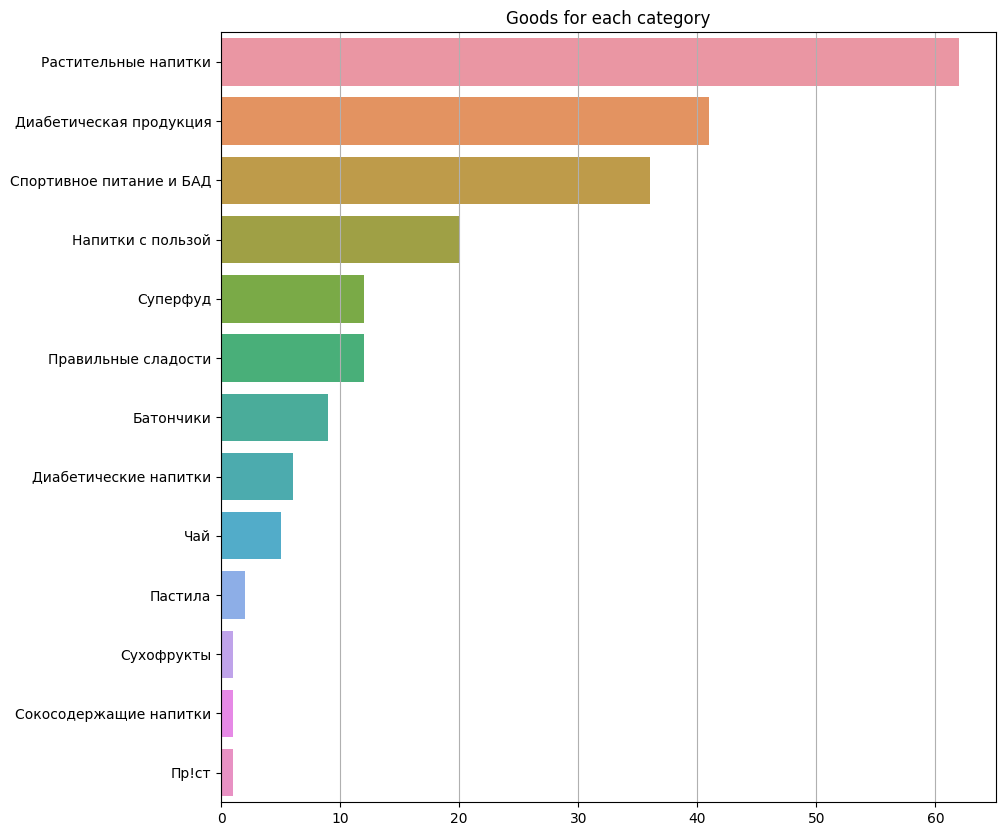

In [116]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Здоровье', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Здоровье', 'cat2'].value_counts().index) 
None

### Здоровье

In [117]:
cat2_names = df.loc[df['cat1'] == 'Здоровье', 'cat2'].unique().tolist()
cat2_names

['Сухофрукты',
 'Пастила',
 'Суперфуд',
 'Сокосодержащие напитки',
 'Батончики',
 'Диабетические напитки',
 'Растительные напитки',
 'Правильные сладости',
 'Чай',
 'Пр!ст',
 'Напитки с пользой',
 'Диабетическая продукция',
 'Спортивное питание и БАД']

In [118]:
len(cat2_names)

13

In [119]:
for i in range(len(df)):
    if df['cat2'][i] == 'Напитки с пользой':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Здоровье | Напитки с пользой | Чай гречишный Natures Own Factory со вкусом лайма-мёда негазированный, 250мл
Здоровье | Напитки с пользой | Чай гречишный Natures Own Factory с малиной негазированный, 250мл
Здоровье | Напитки с пользой | Напиток Babushkas Ferma Иван-чай Карельский ягодный негазированный, 330мл
Здоровье | Напитки с пользой | Напиток Babushkas Ferma Иван-чай Медовая облепиха негазированный, 330мл
Здоровье | Напитки с пользой | Напиток Babushkas Ferma Иван-чай Имбирный цитрус негазированный, 330мл
Здоровье | Напитки с пользой | Детокс-сок Ideas облепиха-апельсин-тыква-имбирь, 300мл
Здоровье | Напитки с пользой | Детокс-сок Ideas томат-огурец-перец-лук-чеснок, 300мл
Здоровье | Напитки с пользой | Цикорий натуральный растворимый сублимированный Зелёная Линия, 85г
Здоровье | Напитки с пользой | Цикорий Московская Кофейня На Паяхъ Насыщенный растворимый сублимированный, 95г
Здоровье | Напитки с пользой | Напиток безалкогольный Oshee Vitamin Energy Zero Magnesium со вкусом ягод 

In [120]:
for i in range(len(df)):
    if df['cat2'][i] == 'Батончики':
        df['cat1'][i] = 'Батончики'
        df['cat1'][i] = 'Сладости'
    if df['cat2'][i] == 'Диабетические напитки' or df['cat2'][i] == 'Напитки с пользой':
        df['cat1'][i] = 'Диабетические напитки'
        df['cat1'][i] = 'Вода, соки, напитки'

### Все для детей, Игрушки

In [121]:
cat2_names = df.loc[df['cat1'] == 'Все для детей', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Игрушки', 'cat2'].unique().tolist())

In [122]:
len(cat2_names)


25

In [123]:
cat2_names.sort()
cat2_names

['Аксессуары для волос',
 'Бальзамы, кондиционеры',
 'Всё для дачи и сада',
 'Галантерейные аксессуары',
 'Гели для душа',
 'Десерты и снеки',
 'Детские молочные продукты',
 'Зефир',
 'Игровые наборы',
 'Игрушки',
 'Канцелярия',
 'Лаки и средства для ногтей',
 'Молочко, лосьон, крем, масло',
 'Наборы для творчества',
 'Наборы конфет',
 'Настольные игры',
 'Настольные лампы, ночники',
 'Помада',
 'Развивающие игрушки и конструкторы',
 'Растительные напитки',
 'Сладкие газированные напитки',
 'Товары медицинского назначения',
 'Уход за волосами',
 'Шампуни',
 'Шоколадные конфеты']

In [124]:
df.loc[df['cat2'] == 'Средства для мытья посуды', ['name', 'attributes', 'cat1']]

,name,attributes,cat1


In [125]:
df['cat1'][df['cat1']=='Игрушки'] = 'Все для детей'


df['cat2'] = combine_categories(df['cat2'], 'Бассейны надувные', 'Детские бассейны', 'Детские бассейны')
df['cat2'] = combine_categories(df['cat2'], 'Гаражи, парковки', 'Игрушечная техника', 'Игрушечная техника')
df['cat2'] = combine_categories(df['cat2'], 'Развивающие игрушки', 'LEGO', 'Развивающие игрушки и конструкторы')
df['cat2'] = combine_categories(df['cat2'], 'Пластиковые конструкторы', 'Пластиковые конструкторы', 'Развивающие игрушки и конструкторы')

df['cat2'] = combine_categories(df['cat2'], 'Детские смеси', 'Детские смеси и заменители', 'Детские смеси и заменители')
df['cat2'] = combine_categories(df['cat2'], 'Детские средства для купания', 'Детские аксессуары для ухода и гигиены', 'Детские аксессуары для ухода и гигиены')
df['cat2'] = combine_categories(df['cat2'], 'Детская посуда', 'Детские кухни, посуда и продукты', 'Детские кухни, посуда и продукты')
df['cat2'] = combine_categories(df['cat2'], 'Солдаты, рыцари', 'Роботы и трансформеры', 'Герои и персонажи')
df['cat2'] = combine_categories(df['cat2'], 'Солдаты, рыцари', 'Фигурки-сюрпризы', 'Герои и персонажи')

df['cat2'] = combine_categories(df['cat2'], 'Игрушечная техника', 'Волчки', 'Игрушки')
df['cat2'] = combine_categories(df['cat2'], 'Детские каши', 'Каши, хлопья', 'Детские каши, хлопья')
df['cat2'] = combine_categories(df['cat2'], 'Пупсы', 'Куклы', 'Куклы')
df['cat2'] = combine_categories(df['cat2'], 'Мягкие конструкторы', 'Наборы букв и цифр', 'Развивающие игрушки и конструкторы')
df['cat2'] = combine_categories(df['cat2'], 'Железные дороги', 'Треки, авторалли', 'Транспорт')
df['cat2'] = combine_categories(df['cat2'], 'Товары медицинского назначения', 'Аптека', 'Аптека')
df['cat2'] = combine_categories(df['cat2'], 'Металлические конструкторы', 'Обучающие игры', 'Развивающие игрушки и конструкторы')
df['cat2'] = combine_categories(df['cat2'], 'Магнитные конструкторы', 'Кубики, пирамидки, сортеры', 'Развивающие игрушки и конструкторы')
df['cat2'] = combine_categories(df['cat2'], 'Научные игры', 'Товары для рукоделия', 'Развивающие игрушки и конструкторы')
df['cat2'] = combine_categories(df['cat2'], 'Головоломки', '', 'Развивающие игрушки и конструкторы')



df['cat2'] = combine_categories(df['cat2'], 'Пазлы для малышей', 'Пазлы для детей', 'Пазлы для детей')
df['cat2'] = combine_categories(df['cat2'], 'Подушки', 'Покрывала, одеяла', 'Одеяла, подушки')
df['cat2'] = combine_categories(df['cat2'], 'Надувные матрасы и насосы', 'Отдых на воде', 'Аксессуары для плавания')
df['cat2'] = combine_categories(df['cat2'], 'Надувные матрасы и насосы', 'Маски, очки, трубки', 'Аксессуары для плавания')
df['cat2'] = combine_categories(df['cat2'], 'Уход за полостью рта', 'Зубные пасты, гели, порошки', 'Зубные пасты, гели, порошки')
df['cat2'] = combine_categories(df['cat2'], 'Строительные инструменты', 'Наборы инструментов', 'Наборы инструментов')

df['cat2'] = combine_categories(df['cat2'], 'Столы детские, парты', 'Комплекты мебели', 'Детская мебель')
df['cat2'] = combine_categories(df['cat2'], 'Автокресла детские, бустеры', 'Детские кресла, стулья', 'Детская мебель')
df['cat2'] = combine_categories(df['cat2'], 'Подставки, ступеньки', 'Детские кресла, стулья', 'Детская мебель')


df['cat2'] = combine_categories(df['cat2'], 'Уход за кожей ребенка', 'Детские аксессуары для ухода и гигиены', 'Детские аксессуары для ухода и гигиены')
df['cat2'] = combine_categories(df['cat2'], 'Пододеяльники, простыни, наволочки', 'Комплекты постельного белья и украшения', 'Постельное белье')

df['cat2'] = combine_categories(df['cat2'], 'Средства для мытья посуды', 'Для мытья посуды', 'Средства для мытья посуды')

df['cat2'] = combine_categories(df['cat2'], 'Пустышки, прорезыватели', 'Соски', 'Соски')
df['cat2'] = combine_categories(df['cat2'], 'Трусики', 'Подгузники', 'Подгузники, трусики')







df['cat1'][(df['cat1']=='Все для детей')&(df['cat2']=='Уход для волос')] = 'Красота, гигиена, аптека'
df['cat1'][df['cat2']=='Пельмени'] = 'Полуфабрикаты'
df['cat1'][df['cat2']=='Аксессуары для волос'] = 'Красота, гигиена, аптека'

df['cat1'][df['cat2']=='Мясные полуфабрикаты'] = 'Полуфабрикаты'

df['cat1'][df['cat2']=='Средства от насекомых'] = 'Спорт и отдых'
df['cat1'][df['cat2']=='Вешалки, чехлы для одежды'] = 'Уборка, товары для дома'
df['cat1'][df['cat2']=='Одежда, обувь, аксессуары'] = 'Одежда, обувь, аксессуары'
df['cat1'][df['cat2']=='Матрасы'] = 'Мебель'
df['cat1'][df['cat2']=='Корзины, короба, контейнеры'] = 'Уборка, товары для дома'
df['cat1'][df['cat2']=='Кондиционеры'] = 'Уборка, товары для дома'
df['cat1'][df['cat2']=='Гели'] = 'Уборка, товары для дома'
df['cat1'][df['cat2']=='Средства для мытья посуды'] = 'Уборка, товары для дома'









df['cat2'][(df['cat1']=='Все для детей')&(df['cat2']=='Мыло')] = 'Детские аксессуары для ухода и гигиены'





















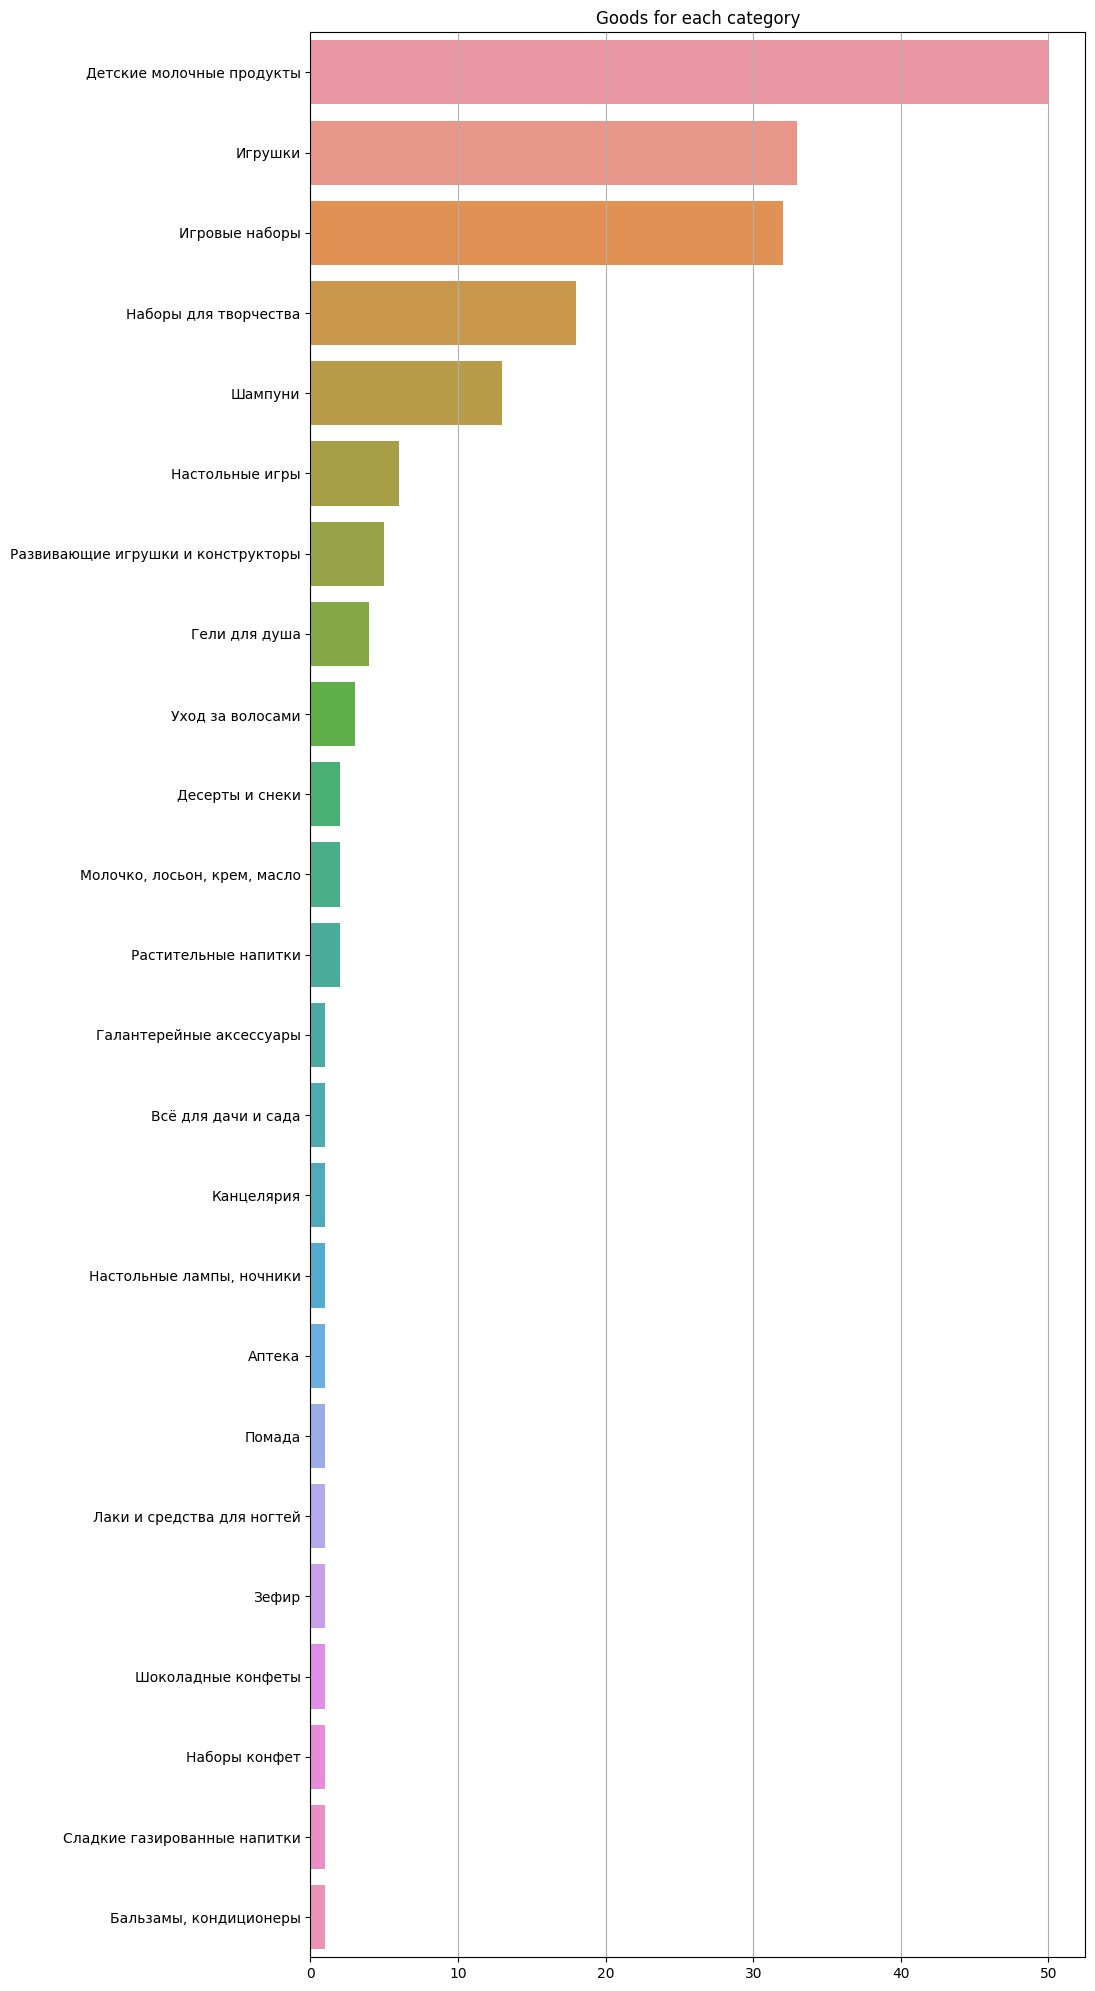

In [126]:
plt.figure(figsize=(10, 25))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Все для детей', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Все для детей', 'cat2'].value_counts().index) 
None

In [127]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'auchan_perekrestok_prepared.csv', index=False)

### Полуфабрикаты, Мясо и птица, Колбасне изделия

In [128]:
df['cat1'].unique()

array(['Сладости', 'Кухня', 'Мёд, варенье, джемы, сиропы', 'Снеки',
       'Вода, соки, напитки', 'Красота, гигиена, аптека',
       'Молочные продукты', 'Мука, дрожжи', 'Яйцо',
       'Овощи, фрукты, ягоды, грибы', 'Специи, соль, сахар',
       'Морепродукты', 'Колбасные изделия, холодец, паштет', 'Сыр',
       'Мясо и птица', 'Хлеб и выпечка', 'Все для детей', 'Для праздника',
       'Уборка, товары для дома', 'Соусы, кетчупы, майонезы',
       'Полуфабрикаты', 'Консервация', 'Чай, кофе, горячие напитки',
       'Алкогольные напитки', 'Макароны, крупы', 'Здоровье',
       'Шашлыки на природе', 'Для дома и дачи',
       'Собственные торговые марки', 'Автотовары', 'Зоотовары',
       'Канцтовары', 'Одежда, обувь, аксессуары'], dtype=object)

In [129]:
cat2_names = df.loc[df['cat1'] == 'Полуфабрикаты', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Мясо и птица', 'cat2'].unique().tolist())
cat2_names.extend(df.loc[df['cat1'] == 'Колбасные изделия, холодец, паштет', 'cat2'].unique().tolist())


In [130]:
len(cat2_names)

61

In [131]:
cat2_names.sort()
cat2_names

['Блины, сырники, оладьи',
 'Вареники',
 'Весовая кулинария',
 'Ветчина',
 'Вторые\xa0блюда',
 'Говядина',
 'Готовые полуфабрикаты',
 'Гриль',
 'Дамплинги, гёдза',
 'Деликатесы и копчёности',
 'До и после еды',
 'Закуски',
 'Закуски',
 'Заливное',
 'Замороженные полуфабрикаты',
 'Зелёная линия',
 'Колбаса',
 'Копченая колбаса',
 'Копченые деликатесы',
 'Котлеты, наггетсы',
 'Крабовые палочки, мясо',
 'Круассаны, выпечка',
 'Лапша',
 'Манты, хинкали',
 'Маркет',
 'Маркет',
 'Маркет',
 'Мясные полуфабрикаты',
 'Мясо птицы',
 'Мясо, птица',
 'Мясо, птица и субпродукты',
 'Напитки, лёд',
 'Овощные полуфабрикаты',
 'Основные блюда',
 'Паштеты',
 'Паштеты',
 'Пельмени',
 'Первые блюда',
 'Первые\xa0блюда',
 'Пицца, пироги',
 'Пр!ст',
 'Пр!ст',
 'Рыбные полуфабрикаты',
 'Салаты',
 'Сардельки',
 'Свинина',
 'Смеси',
 'Сосиски',
 'Спортивное питание и БАД',
 'Субпродукты',
 'Супы',
 'Сыровяленая колбаса',
 'Сэндвичи и шаурма',
 'Тесто, основы, хлеб',
 'Фарш',
 'Хамон, сыровяленые деликатесы',
 

In [132]:
df.loc[df['cat2'] == 'Сэндвичи, пироги, шаурма, пицца', ['name', 'attributes', 'cat1']]


,name,attributes,cat1


In [133]:
df['cat2'] = combine_categories(df['cat2'], 'Сосиски', 'Сардельки', 'Сосиски, сардельки, шпикачки')
df['cat2'] = combine_categories(df['cat2'], 'Сосиски', 'Шпикачки', 'Сосиски, сардельки, шпикачки')
df['cat2'] = combine_categories(df['cat2'], 'Колбаски, купаты', 'Шпикачки', 'Сосиски, сардельки, шпикачки')


df['cat2'] = combine_categories(df['cat2'], 'Супы', 'Супы, бульоны', 'Супы, бульоны')
df['cat2'] = combine_categories(df['cat2'], 'Холодцы', 'Холодец, студень', 'Холодец, студень')
df['cat2'] = combine_categories(df['cat2'], 'Сэндвичи и шаурма', 'Сэндвичи, пироги', 'Сэндвичи, пироги, шаурма')
df['cat2'] = combine_categories(df['cat2'], 'Первые блюда', 'Первые\xa0блюда', 'Первые блюда')
df['cat2'] = combine_categories(df['cat2'], 'Основные блюда', 'Вторые\xa0блюда', 'Вторые блюда')
df['cat2'] = combine_categories(df['cat2'], 'Сэндвичи, пироги, шаурма', 'Пицца', 'Сэндвичи, пироги, шаурма, пицца')
df['cat2'] = combine_categories(df['cat2'], 'Кулинария', 'Пицца, пироги', 'Сэндвичи, пироги, шаурма, пицца')




df['cat2'] = combine_categories(df['cat2'], 'Мясо', 'Мясо птицы', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Мясо, птица', 'Мясные деликатесы', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Курица', 'Кролик', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Индейка', 'Говядина', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Телятина', 'Субпродукты', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Свинина', 'Утка', 'Мясо, птица и субпродукты')
df['cat2'] = combine_categories(df['cat2'], 'Птица', 'Баранина', 'Мясо, птица и субпродукты')





df['cat2'] = combine_categories(df['cat2'], 'Из телятины', 'Из птицы', 'Фарш')
df['cat2'] = combine_categories(df['cat2'], 'Из кролика', 'Из баранины', 'Фарш')
df['cat2'] = combine_categories(df['cat2'], 'Говяжий', 'Свиной', 'Фарш')
df['cat2'] = combine_categories(df['cat2'], 'Смешанный', 'Свиной', 'Фарш')


df['cat2'] = combine_categories(df['cat2'], 'Лапша', 'Лапша, пюре', 'Лапша, пюре')


df['cat2'] = combine_categories(df['cat2'], 'Блины, оладьи', 'Запеканки, сырники', 'Блины, сырники, оладьи')

df['cat2'] = combine_categories(df['cat2'], 'Деликатесы и копчёности', 'Копченые деликатесы', 'Копченые деликатесы')



df['cat2'] = combine_categories(df['cat2'], 'Колбасные изделия', 'Копченая колбаса', 'Колбаса, ветчина')
df['cat2'] = combine_categories(df['cat2'], 'Ветчина', 'Колбаса', 'Колбаса, ветчина')
df['cat2'] = combine_categories(df['cat2'], 'Сыровяленая колбаса', 'Ливерная, жареная колбаса', 'Колбаса, ветчина')


df['cat1'][df['cat2']=='Паштеты'] = 'Колбасные изделия, холодец, паштет'
df['cat1'][df['cat2']=='Сэндвичи, пироги, шаурма, пицца'] = 'Снеки'




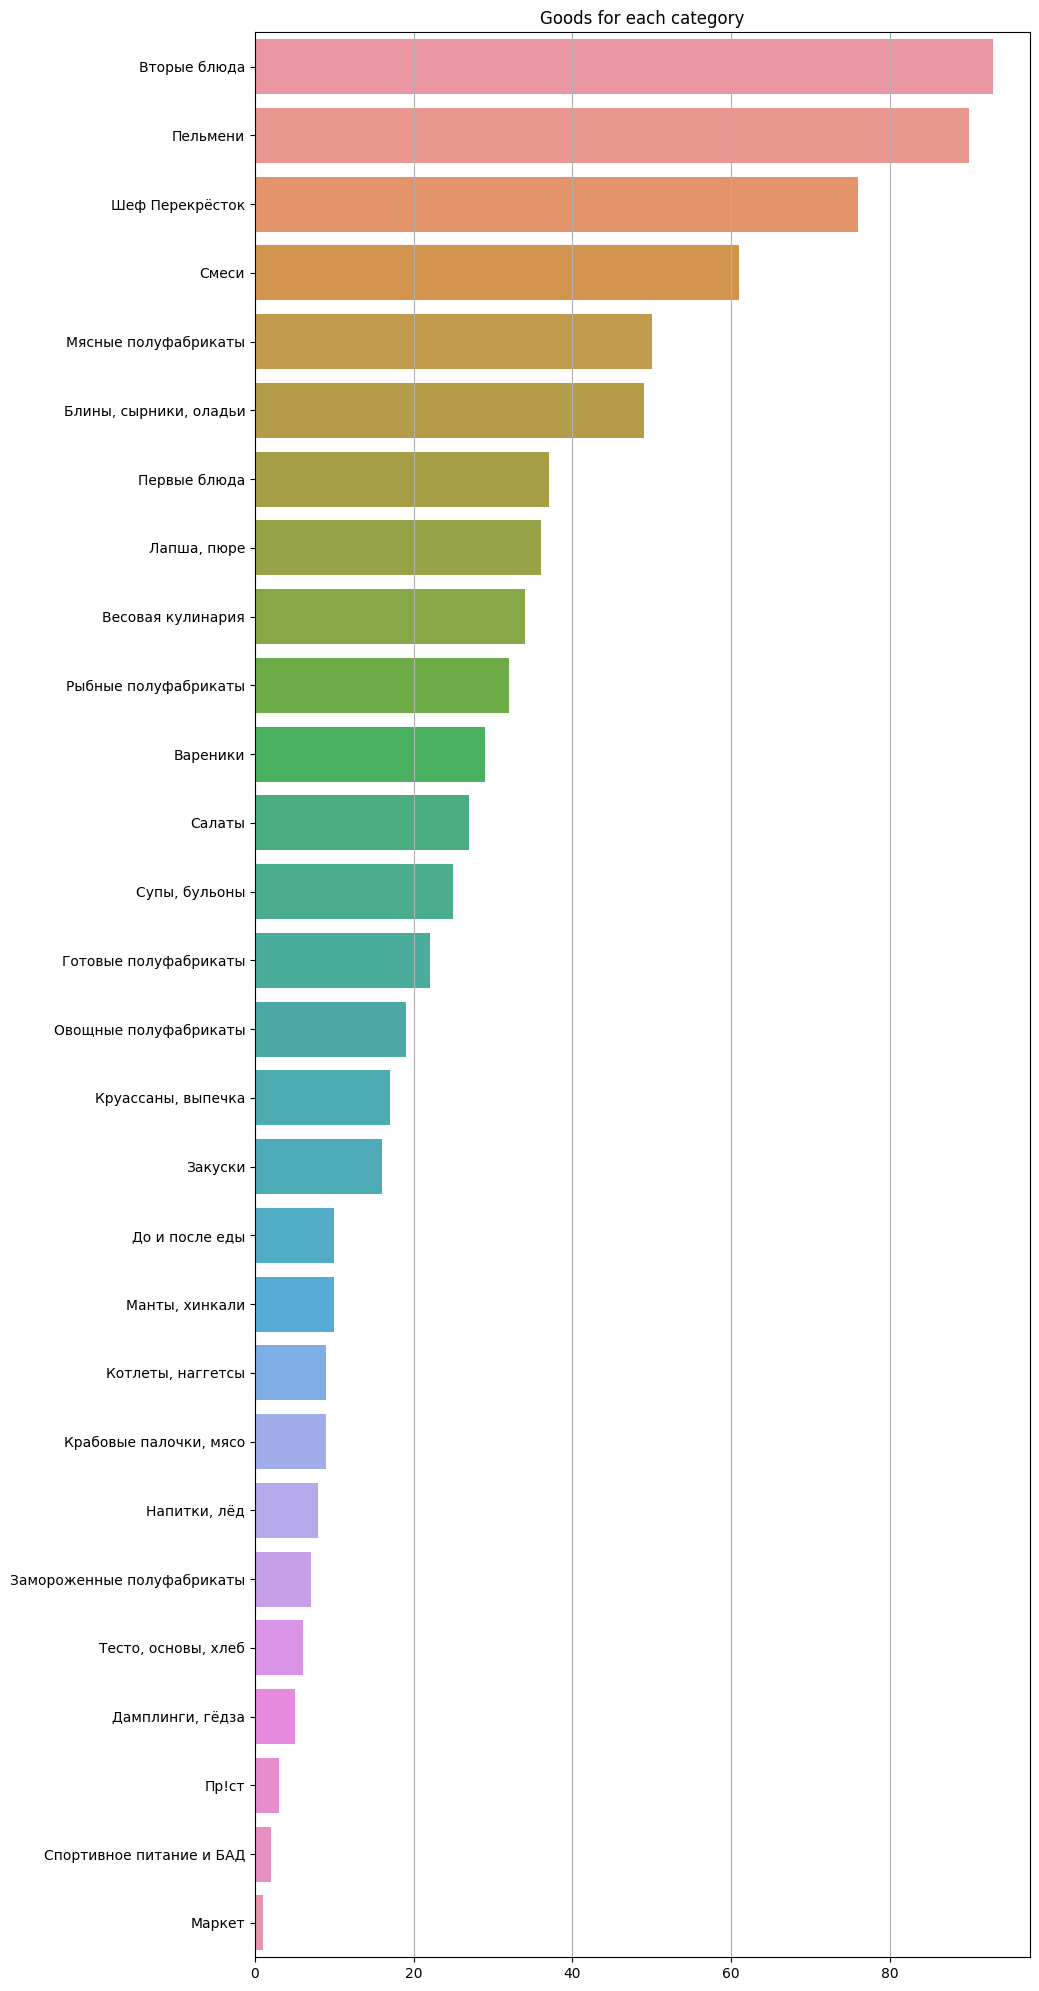

In [134]:
plt.figure(figsize=(10, 25))
plt.grid()
plt.title('Goods for each category')

cat1_name = 'Полуфабрикаты'

sns.barplot(x=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().index) 
None

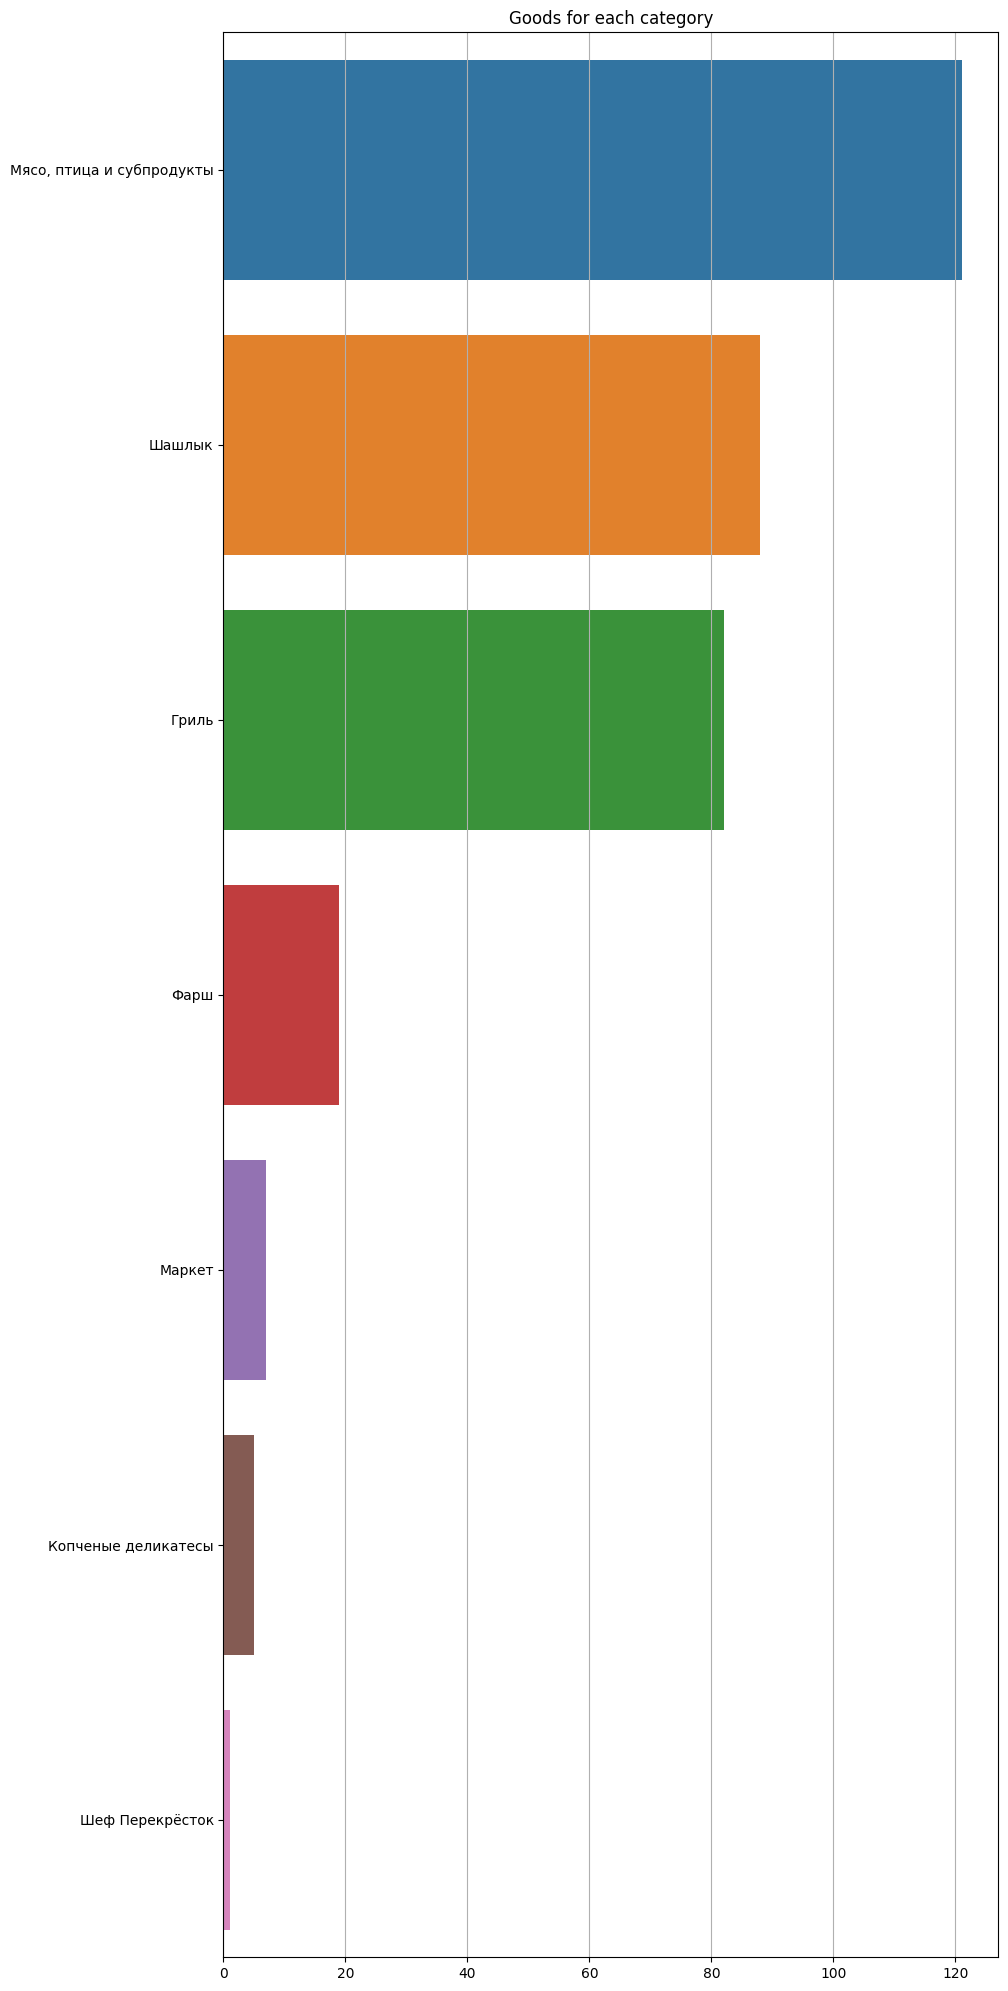

In [135]:
plt.figure(figsize=(10, 25))
plt.grid()
plt.title('Goods for each category')

cat1_name = 'Мясо и птица'

sns.barplot(x=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().index) 
None

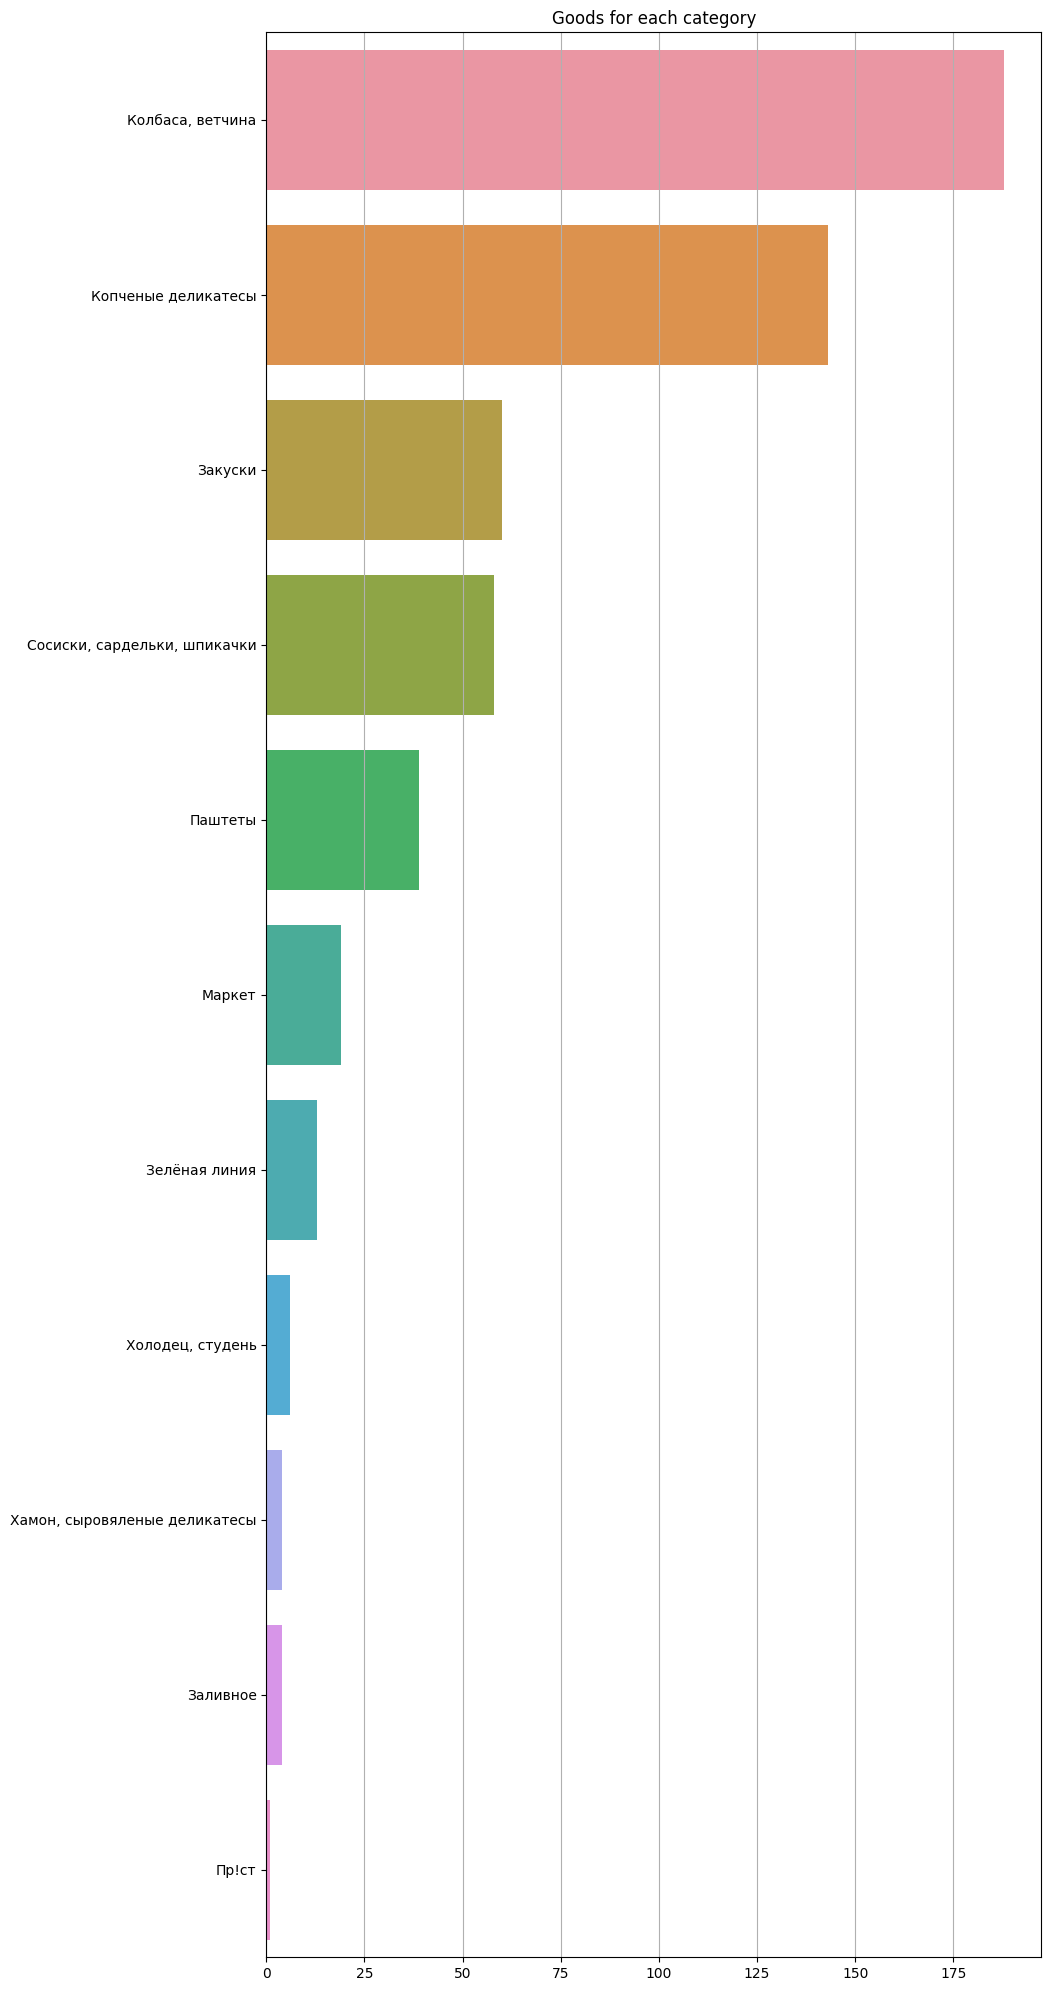

In [136]:
plt.figure(figsize=(10, 25))
plt.grid()
plt.title('Goods for each category')

cat1_name = 'Колбасные изделия, холодец, паштет'

sns.barplot(x=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat1_name, 'cat2'].value_counts().index) 
None

In [137]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'auchan_perekrestok_prepared.csv', index=False)

### Чай, кофе, горячие напитки

In [138]:
cat2_names = df.loc[df['cat1'] == 'Чай, кофе, горячие напитки', 'cat2'].unique().tolist()
cat2_names

['Цикорий',
 'Какао',
 'Другие напитки',
 'Горячий шоколад',
 'Растворимый',
 'Зерновой',
 'Молотый',
 'Капсульный',
 'Чай в подарочной упаковке',
 'Кофе',
 'Чай',
 'Чайное ассорти',
 'Черный',
 'Улун, Пуэр',
 'Фруктовый, ягодный',
 'Другие чаи',
 'Кофе в подарочной упаковке',
 'Напитки, лёд',
 'Пр!ст',
 'Диабетическая продукция']

In [139]:
len(cat2_names)

20

In [140]:
cat2_names.sort()
cat2_names

['Горячий шоколад',
 'Диабетическая продукция',
 'Другие напитки',
 'Другие чаи',
 'Зерновой',
 'Какао',
 'Капсульный',
 'Кофе',
 'Кофе в подарочной упаковке',
 'Молотый',
 'Напитки, лёд',
 'Пр!ст',
 'Растворимый',
 'Улун, Пуэр',
 'Фруктовый, ягодный',
 'Цикорий',
 'Чай',
 'Чай в подарочной упаковке',
 'Чайное ассорти',
 'Черный']

In [141]:
for i in range(len(df)):
    if df['cat2'][i] == 'Чай':
        print(df['cat1'][i], df['name'][i])

Чай, кофе, горячие напитки Чай черный Nestea лесные ягоды, 1,5 л
Чай, кофе, горячие напитки Чай черный Nestea лесные ягоды, 500 мл
Чай, кофе, горячие напитки Чай черный Lipton лимон, 1,5л
Чай, кофе, горячие напитки Чай зеленый Lipton, 500 мл
Чай, кофе, горячие напитки Чай черный Rich со вкусом Персика, 1 л
Чай, кофе, горячие напитки Чай черный Rich tea со вкусом Лимона, 1 л
Чай, кофе, горячие напитки Чай зеленый Nestea малина, 1,5 л
Чай, кофе, горячие напитки Чай холодный Nestea черный со вкусом манго и ананаса, 1,5 л
Чай, кофе, горячие напитки Чай холодный Your Water черный со вкусом лесных ягод, 1 л
Чай, кофе, горячие напитки Чай зеленый Lipton земляника-клюква, 1,5 л
Чай, кофе, горячие напитки Чай черный Ti холодный со вкусом Кокоса и Личи, 1,25 л
Чай, кофе, горячие напитки Чай холодный Lipton арбуз-мята, 1 л
Чай, кофе, горячие напитки Чай холодный Nestea зеленый со вкусом малины, 500 мл
Чай, кофе, горячие напитки Чай холодный Lipton Земляника и Клюква зеленый, 500 мл
Чай, кофе, гор

In [142]:
for i in range(len(df)):
    if df['cat2'][i] == 'Чай':
        print(df['name'][i])

Чай черный Nestea лесные ягоды, 1,5 л
Чай черный Nestea лесные ягоды, 500 мл
Чай черный Lipton лимон, 1,5л
Чай зеленый Lipton, 500 мл
Чай черный Rich со вкусом Персика, 1 л
Чай черный Rich tea со вкусом Лимона, 1 л
Чай зеленый Nestea малина, 1,5 л
Чай холодный Nestea черный со вкусом манго и ананаса, 1,5 л
Чай холодный Your Water черный со вкусом лесных ягод, 1 л
Чай зеленый Lipton земляника-клюква, 1,5 л
Чай черный Ti холодный со вкусом Кокоса и Личи, 1,25 л
Чай холодный Lipton арбуз-мята, 1 л
Чай холодный Nestea зеленый со вкусом малины, 500 мл
Чай холодный Lipton Земляника и Клюква зеленый, 500 мл
Чай зеленый Rich tea  со вкусом Манго, 1 л
Чай зеленый холодный Nestea клубника-алоэ вера, 500 мл
Чай черный TASSAY с персиком, 500 мл
Чай Lipton Арбуз и Мята, 1,5 л
Чай холодный Lipton Земляника и Клюква зеленый, 1 л
Чай зеленый Rich tea, 1 л
Чай холодный Lipton Персик, 1 л
Чай черный Ti холодный со вкусом Персика, 1,25 л
Чай черный Ti холодный со вкусом Персика, 500 мл
Чай черный Ti холо

In [143]:
for i in range(len(df)):
    # ухтышки
    if 'ухтышка' in df['name'][i] and 'Ухтышки' == df['cat2'][i]:
        if df['name'][i].startswith('паста'):
            df['cat2'][i] = 'Шоколадные и ореховые пасты'
        if df['name'][i].startswith('вафля'):
            df['cat2'][i] = 'Вафли'
        if df['name'][i].startswith('шарик'):
            df['cat2'][i] = 'Шарики'
            df['cat1'][i] = 'Макароны, крупы'
        if df['name'][i].startswith('круассан'):
            df['cat2'][i] = 'Пироги, сдоба, кексы, рулеты'
            df['cat1'][i] = 'Хлеб и выпечка'
        if df['name'][i].startswith('мармелад'):
            df['cat2'][i] = 'Желейные, мармелад'
            df['cat1'][i] = 'Сладости'
        if df['name'][i].startswith('какао'):
            df['cat2'][i] = 'Какао'
            df['cat1'][i] = 'Чай, кофе, горячие напитки'
        if df['name'][i].startswith('молоко'):
            df['cat2'][i] = 'Молоко'
            df['cat1'][i] = 'Молочные продукты'
        if df['name'][i].startswith('палочка'):
            df['cat2'][i] = 'Кукурузные палочки'
            df['cat1'][i] = 'Снеки'
            
    if df['name'][i].startswith('мармелад'):
        df['cat2'][i] = 'Желейные, мармелад'
        df['cat1'][i] = 'Сладости'
        
    # напитки
    if df['cat2'][i] == 'Напитки, лёд' and 'чай' not in df['name'][i] and (df['cat1'][i] == 'Шашлыки на природе' or df['cat1'][i] == 'Чай, кофе, горячие напитки' or df['cat1'][i] == 'Полуфабрикаты'):
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Напитки, лёд' and 'чай' in df['name'][i]:
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
        df['cat2'][i] = 'Чай'
    if df['name'][i].startswith('чай '):
        df['cat2'][i] = 'Чай'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['name'][i].startswith('цикорий'):
        df['cat2'][i] = 'Цикорий'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['name'][i].startswith('какао'):
        df['cat2'][i] = 'Какао'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['name'][i].startswith('горячий'):
        df['cat2'][i] = 'Горячий шоколад'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['cat2'][i] == 'Другие напитки':
        df['cat1'][i] = 'Вода, соки, напитки'

In [144]:
df['cat2'] = combine_categories(df['cat2'], 'Черный', 'Чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'], 'Фруктовый, ягодный', 'Чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'],  'Улун, Пуэр', 'Чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'], 'Другие чаи', 'Чай', 'Чай')
df['cat2'] = combine_categories(df['cat2'], 'Растворимый', 'Кофе', 'Кофе')
df['cat2'] = combine_categories(df['cat2'], 'Молотый', 'Кофе', 'Кофе')
df['cat2'] = combine_categories(df['cat2'],  'Капсульный', 'Кофе', 'Кофе')
df['cat2'] = combine_categories(df['cat2'], 'Зерновой', 'Кофе', 'Кофе')

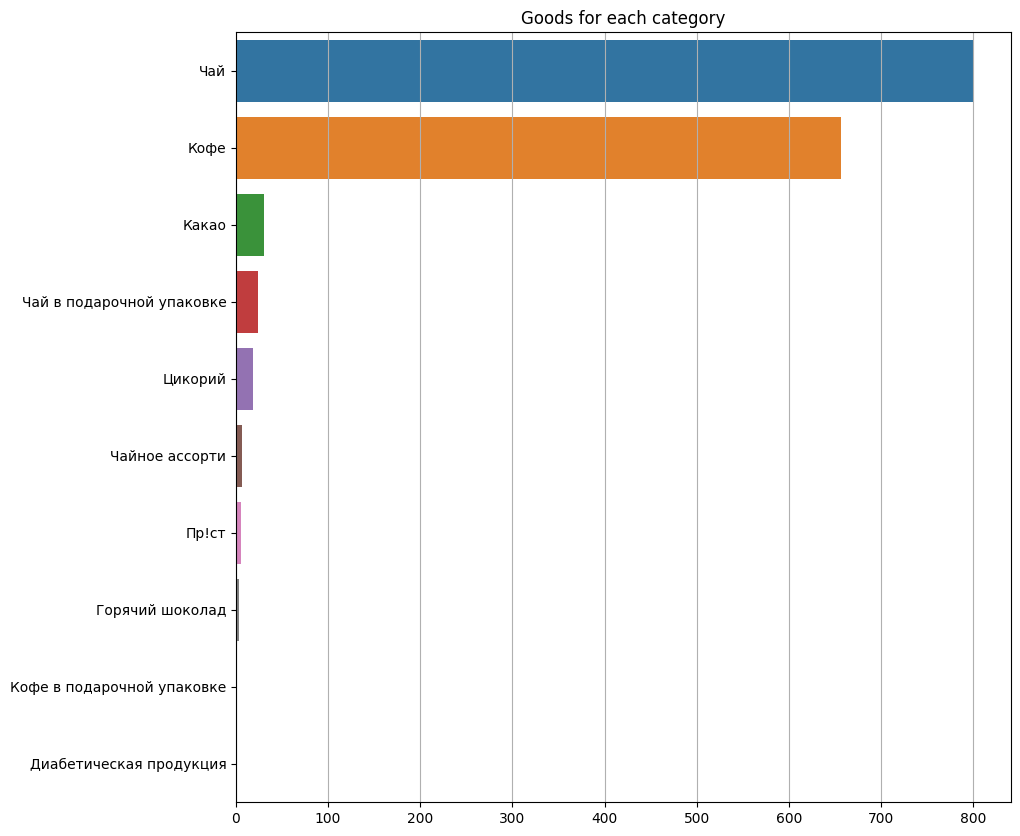

In [145]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Чай, кофе, горячие напитки', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Чай, кофе, горячие напитки', 'cat2'].value_counts().index) 
None

### Макароны и крупы

In [146]:
cat2_names = df.loc[df['cat1'] == 'Макароны, крупы', 'cat2'].unique().tolist()
cat2_names

['Бобовые',
 'Лапша, пюре',
 'Колечки',
 'Суперфуд',
 'Крупы',
 'Шарики',
 'Соусы',
 'Маркет',
 'Каши',
 'Хлопья',
 'Рис',
 'Гранола',
 'Зелёная линия',
 'Вторые блюда',
 'Каши быстрого приготовления',
 'Закуски',
 'Пр!ст',
 'Макароны',
 'Диабетическая продукция',
 'Хлебцы',
 'Без глютена',
 'Ухтышки']

In [147]:
len(cat2_names)

22

In [148]:
df['cat2'] = combine_categories(df['cat2'],  'Хлопья', 'Сухие завтраки', 'Сухие завтраки')

In [149]:
for i in range(len(df)):
    if df['cat2'][i] == 'Сухие завтраки':
        print(df['cat1'][i], df['name'][i])

Макароны, крупы Хлопья Любятово кукурузные, 300г
Макароны, крупы Мюсли Matti банан-шоколад, 250г
Макароны, крупы Хлопья кукурузные Хрутка хрустящие, 700г
Макароны, крупы Мюсли Ого с орехом запечённые, 350г
Макароны, крупы Подушечки Любятово с шоколадной начинкой, 220г
Макароны, крупы Хлопья кукурузные Хрутка медовые, 300г
Макароны, крупы Подушечки Любятово с молочной начинкой, 220г
Макароны, крупы Хлопья мультизлаковые Любятово, 250г
Макароны, крупы Хлопья Кузя Лакомкин кукурузные глазированные, 250г
Макароны, крупы Завтрак готовый Хрутка Алфавит шоколадный обогащенный кальцием, 230г
Макароны, крупы Мюсли Matti орех-яблоко, 250г
Макароны, крупы Хлопья кукурузные Хрутка хрустящие, 320г
Макароны, крупы Хлопья Любятово кукурузные, 600г
Макароны, крупы Хлопья Schar кукурузные без глютена, 250г
Макароны, крупы Мюсли Ого фруктовый микс классические, 400г
Макароны, крупы Хлопья кукурузные глазированные Маркет, 300г
Макароны, крупы Хлопья Nordic 4 вида зерновых, 500г
Макароны, крупы Хлопья Вит

In [150]:
for i in range(len(df)):
    if df['cat2'][i] == 'Крупы':
        print(df['name'][i])

Рис длиннозёрный Маркет Перекрёсток, 900г
Гречка ядрица пропаренная Маркет Перекрёсток, 900г
Кускус Зелёная Линия, 350г
Гречка зелёная ядрица 1 сорт Зелёная Линия, 400г
Киноа белая Зелёная Линия, 350г
Булгур из пшеницы Зелёная Линия, 400г
Рис Мистраль Кубань белый круглозёрный, 900г
Рис длиннозёрный Маркет Перекрёсток, 900г
Рис круглозернистый шлифованный, 900г
Рис Националь для плова шлифованный, 900г
Рис Увелка длиннозёрный пропаренный, 5х80г
Рис длиннозёрный, 900г
Рис Мистраль Жасмин белый ароматный длиннозёрный, 500г
Рис пропаренный шлифованный, 900г
Рис Увелка круглозёрный шлифованный, 5х80г
Рис Мистраль Басмати белый ароматный, 500г
Рис Агро-Альянс Кубанский Экстра элитный шлифованный, 900г
Рис Агро-Альянс Экстра для плова шлифованный, 900г
Рис Агро-Альянс Slim&fit Экстра бурый, 800г
Рис Мистраль Янтарь длиннозёрный пропаренный, 900г
Рис круглозёрный Маркет Перекрёсток, 900г
Смесь Увелка Дружба рис круглозёрного и пшено, 5х80г
Рис круглозёрный Маркет Перекрёсток, 4х125г
Рис Мистр

In [151]:
for i in range(len(df)):
    if 'плов' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Макароны, крупы | Крупы | Рис Националь для плова шлифованный, 900г
Макароны, крупы | Крупы | Рис Агро-Альянс Экстра для плова шлифованный, 900г
Макароны, крупы | Крупы | Рис Мистраль для плова традиционного, 900г
Макароны, крупы | Крупы | Рис Мистраль Басмати Extra Long для плова по-персидски белый ароматный, 900г
Специи, соль, сахар | Специи, приправы и пряности | Смесь сухая Maggi На второе для плова с курицей, 24г
Специи, соль, сахар | Специи, приправы и пряности | Приправа Kotanyi для плова, 20г
Специи, соль, сахар | Специи, приправы и пряности | Приправа Kotanyi для узбекского плова, 20г
Специи, соль, сахар | Специи, приправы и пряности | Приправа для плова Маркет Перекрёсток, 20г
Специи, соль, сахар | Специи, приправы и пряности | Приправа Приправия натуральная для плова, 40г
Специи, соль, сахар | Специи, приправы и пряности | Приправа Волшебное Дерево для плова по-восточному, 30г
Специи, соль, сахар | Маркет | Приправа для плова Маркет Перекрёсток, 20г
Уборка, товары для дома |

In [152]:
for i in range(len(df)):
    if df['name'][i].startswith('лапша'):
        df['cat2'][i] = 'Лапша'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('суп') or df['name'][i].startswith('основа суп'):
        df['cat2'][i] = 'Суп'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('плов '):
        df['cat2'][i] = 'Вторые блюда'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['cat2'][i] == 'Вторые блюда':
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('фасоль') or df['name'][i].startswith('чечевица') or df['name'][i].startswith('горох') or df['name'][i].startswith('нут'):
        df['cat2'][i] = 'Бобовые'
        df['cat1'][i] = 'Макароны, крупы'
        
    if df['name'][i].startswith('каша'):
        df['cat2'][i] = 'Крупы'
        df['cat1'][i] = 'Макароны, крупы'
        
    if df['name'][i].startswith('чипсы') or df['name'][i].startswith('снек'):
        df['cat2'][i] = 'Чипсы'
        df['cat1'][i] = 'Снеки'
    if df['name'][i].startswith('хлебец') or df['name'][i].startswith('хлебцы'):
        df['cat2'][i] = 'Хлебцы'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('печение') or df['name'][i].startswith('печенье'):
        df['cat2'][i] = 'Печенье'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('вафля') or df['name'][i].startswith('вафли'):
        df['cat2'][i] = 'Вафли'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('батончик') or df['name'][i].startswith('батончики'):
        df['cat2'][i] = 'Батончики'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('шоколад ') or df['name'][i].startswith('шоколадка '):
        df['cat2'][i] = 'Шоколад'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('мука '):
        df['cat2'][i] = 'Мука'
        df['cat1'][i] = 'Мука, дрожжи'
    if df['name'][i].startswith('макароны ') or df['name'][i].startswith('спагетти '):
        df['cat2'][i] = 'Макароны'
        df['cat1'][i] = 'Макароны, крупы'
    if df['name'][i].startswith('хлеб '):
        df['cat2'][i] = 'Хлеб'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('сырок ') and 'творожный' in df['name'][i]:
        df['cat2'][i] = 'Сырки, суфле'
        df['cat1'][i] = 'Молочные продукты'
    if df['name'][i].startswith('соус '):
        df['cat2'][i] = 'Соусы кулинарные'
        df['cat1'][i] = 'Соусы, кетчупы, майонезы'
    if df['name'][i].startswith('соус '):
        df['cat2'][i] = 'Соусы кулинарные'
        df['cat1'][i] = 'Соусы, кетчупы, майонезы'
    if df['name'][i].startswith('булочка ') or df['name'][i].startswith('кренделёк'):
        df['cat2'][i] = 'Пирожки, булочки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('пирожное ') or df['name'][i].startswith('пироженое'):
        df['cat2'][i] = 'Пирожные, десерты'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('молоко кокосовый'):
        df['cat2'][i] = 'Кокосовое молоко'
        df['cat1'][i] = 'Молочные продукты'
    if df['name'][i].startswith('хлопья'):
        df['cat2'][i] = 'Хлопья'
        df['cat1'][i] = 'Макароны, крупы'
    if df['name'][i].startswith('завтрак ') or df['name'][i].startswith('сухой завтрак') or df['name'][i].startswith('энергетический завтрак'):
        df['cat2'][i] = 'Сухие завтраки'
        df['cat1'][i] = 'Макароны, крупы'
    if df['name'][i].startswith('отруби '):
        df['cat2'][i] = 'Отруби'
        df['cat1'][i] = 'Макароны, крупы'

In [153]:
df['cat2'] = combine_categories(df['cat2'], 'Макаронные изделия', 'Макароны', 'Макароны')
df['cat2'] = combine_categories(df['cat2'], 'Рис', 'Крупы', 'Крупы')
df['cat2'] = combine_categories(df['cat2'],  'Колечки', 'Сухие завтраки', 'Сухие завтраки')
df['cat2'] = combine_categories(df['cat2'], 'Гранола', 'Сухие завтраки', 'Сухие завтраки')
df['cat2'] = combine_categories(df['cat2'], 'Без глютена', 'Сухие завтраки', 'Сухие завтраки')
df['cat2'] = combine_categories(df['cat2'], 'Мюсли, гранола', 'Сухие завтраки', 'Сухие завтраки')
df['cat2'] = combine_categories(df['cat2'], 'Шарики', 'Сухие завтраки', 'Сухие завтраки')
df['cat2'] = combine_categories(df['cat2'], 'Каши быстрого приготовления', 'Крупы', 'Крупы')
df['cat2'] = combine_categories(df['cat2'],  'Каши, хлопья', 'Крупы', 'Крупы')
df['cat2'] = combine_categories(df['cat2'], 'Каши', 'Крупы', 'Крупы')

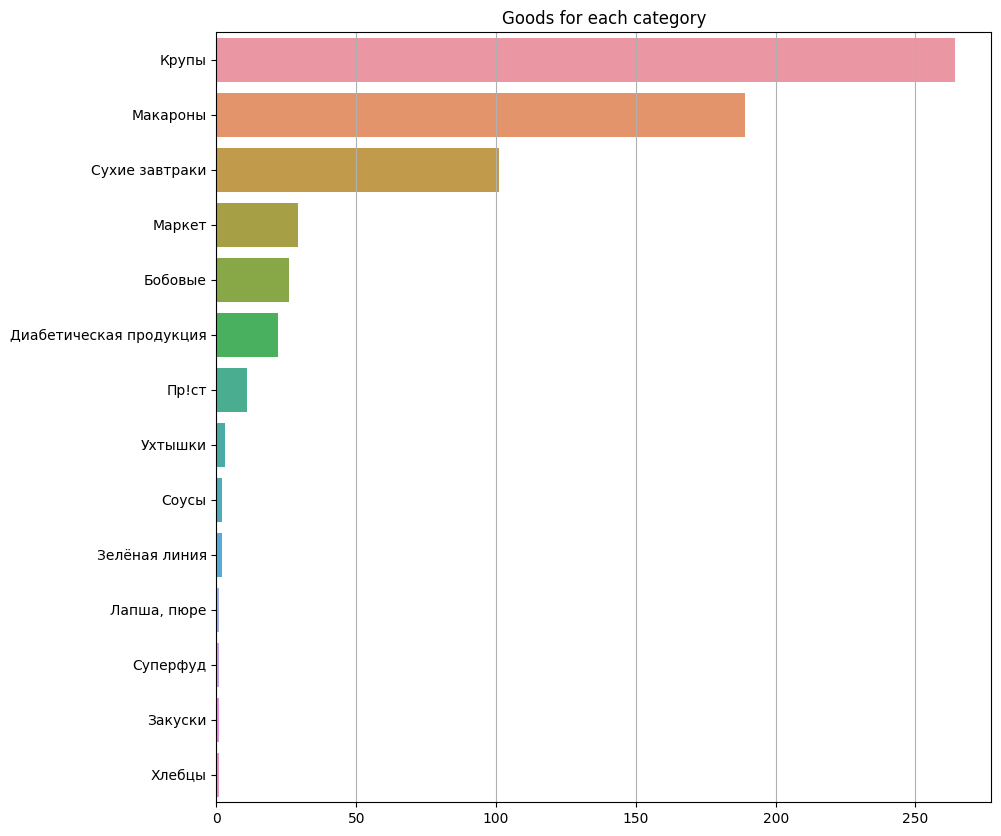

In [154]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Макароны, крупы', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Макароны, крупы', 'cat2'].value_counts().index) 
None

### Бытовая техника

In [155]:
cat2_names = df.loc[df['cat1'] == 'Бытовая техника', 'cat2'].unique().tolist()
cat2_names

[]

In [156]:
len(cat2_names)

0

In [157]:
for i in range(len(df)):
    if df['cat2'][i] == 'Бритвы':
        print(df['cat1'][i], '|', df['name'][i])

In [158]:
for i in range(len(df)):
    if df['cat2'][i] == 'Лампочки, батарейки и аккумуляторы':
        print(df['name'][i])

LED-Лампа АШАН Красная птица E27 4-40W
Лампа светодиодная АШАН Красная птица Е14 7Вт теплый свет
LED-Лампа АШАН Красная птица E27 4-40W
Лампа светодиодная АШАН Красная птица Е14 7Вт холодный свет
Лампа светодиодная филаментная АШАН Красная птица Е14 8Вт теплый свет
Лампа светодиодная АШАН Красная птица Е14 6Вт холодный свет
Лампа светодиодная АШАН Красная птица Е27 6Вт холодный свет
Лампа светодиодная АШАН Красная птица Е27 6Вт теплый свет
Лампа светодиодная АШАН Красная птица Шар Е27 теплый свет, 8 Вт
Лампа светодиодная АШАН Красная птица Шар Е27 холодный свет, 5 Вт
Лампа светодиодная АШАН Красная птица Шар Е27 холодный свет, 8 Вт
Лампа светодиодная АШАН Красная птица Е14 6Вт холодный свет
LED-Лампа АШАН Красная птица E14 6-60W
Лампа АШАН Красная птица светодиодная LED груша теплый свет, 12W Е27
LED-Лампа АШАН Красная птица E27 4-40W
Лампа АШАН Красная птица светодиодная LED груша холодный свет, 12W Е27
Лампа светодиодная АШАН Красная птица Е27 спот R63, холодный свет, 8 Вт
LED-Лампа 

In [159]:
for i in range(len(df)):
    if 'чайник ' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Кухня | Заварочные чайники, турки | Чехол на чайник Guten Morgen лен, 25х30 см


In [160]:
for i in range(len(df)):
    if df['name'][i].startswith('весы') and df['cat2'][i] == 'Другие аксессуары':
        df['cat2'][i] = 'Кухонные весы'
        df['cat1'][i] = 'Бытовая техника'
    if ('кассета ' in df['name'][i] or df['name'][i].startswith('станок ')):
        df['cat2'][i] = 'Станки и кассеты'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('бритва ') or df['name'][i].startswith('электробритва '):
        df['cat2'][i] = 'Бритвы'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('вентилятор') or df['name'][i].startswith('тепловентилятор'):
        df['cat2'][i] = 'Вентиляторы'
        df['cat1'][i] = 'Бытовая техника'
    if 'увлажнитель' in df['name'][i] or df['name'][i].startswith('конвектор') or df['name'][i].startswith('водогреть') or df['name'][i].startswith('радиатор') or df['name'][i].startswith('метеостанция') or df['name'][i].startswith('грелка '):
        df['cat2'][i] = 'Климатическая техника'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('блендер') or df['name'][i].startswith('миксер') or df['name'][i].startswith('настольный блендер') or df['name'][i].startswith('погружной блендер'):
        df['cat2'][i] = 'Блендеры, миксеры'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('бумбокс') or df['name'][i].startswith('аудиосистема') or df['name'][i].startswith('музыкальный центр') or df['name'][i].startswith('акустический система'):
        df['cat2'][i] = 'Аудиосистемы'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('наушник') or 'гарнитур' in df['name'][i]:
        df['cat2'][i] = 'Наушники'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('селфи ') or 'штатив' in df['name'][i] or df['name'][i].startswith('монопод '):
        df['cat2'][i] = 'Штативы, моноподы'
        df['cat1'][i] = 'Бытовая техника'
    if (df['name'][i].startswith('аккумулятор ') or df['name'][i].startswith('батарейка ') or df['name'][i].startswith('батарея аккумуляторный') or df['name'][i].startswith('устройство зарядный') or (df['cat2'][i] == 'Лампочки, батарейки и аккумуляторы' and df['cat1'][i] == 'Уборка, товары для дома')) and df['cat2'][i] != 'Спорт и отдых':
        df['cat2'][i] = 'Лампочки, батарейки и аккумуляторы'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('радиоприёмник '):
        df['cat2'][i] = 'Радиоприемник'
        df['cat1'][i] = 'Бытовая техника'
    if (df['name'][i].startswith('средство ') or df['name'][i].startswith('очиститель ')) and df['cat2'][i] == 'Аксессуары для кухонной техники':
        df['cat2'][i] = 'Для стёкол и зеркал'
        df['cat1'][i] = 'Уборка, товары для дома'
    if df['cat2'][i] == 'Аксессуары для кухонной техники':
        df['cat2'][i] = 'Мелочи для дома'
        df['cat1'][i] = 'Кухня'
    if df['cat2'][i] == 'Техника и аксессуары' and df['name'][i].startswith('чайник '):
        df['cat2'][i] = 'Электрические чайники, термопоты'
        df['cat1'][i] = 'Бытовая техника'

In [161]:
df['cat2'] = combine_categories(df['cat2'], 'Беспроводные колонки', 'Аудиосистемы', 'Аудиосистемы')
df['cat2'] = combine_categories(df['cat2'], 'Веб-камеры', 'Камеры', 'Камеры')
df['cat2'] = combine_categories(df['cat2'], 'Экшн-камеры', 'Камеры', 'Камеры')
df['cat2'] = combine_categories(df['cat2'], 'Флешки', 'Флешки, карты памяти', 'Флешки, карты памяти')
df['cat2'] = combine_categories(df['cat2'], 'Карты памяти', 'Флешки, карты памяти', 'Флешки, карты памяти')
df['cat2'] = combine_categories(df['cat2'], 'Фены', 'Фены, фен-щетки', 'Фены, фен-щетки')
df['cat2'] = combine_categories(df['cat2'], 'Защитные стекла', 'Защитные стекла, чехлы', 'Защитные стекла, чехлы')
df['cat2'] = combine_categories(df['cat2'], 'Колонки для компьютера', 'Аудиосистемы', 'Аудиосистемы')
df['cat2'] = combine_categories(df['cat2'], 'Радио и радио-часы',  'Смарт-часы, фитнес-браслеты',  'Смарт-часы, фитнес-браслеты')
df['cat2'] = combine_categories(df['cat2'], 'Колонки для компьютера', 'Аудиосистемы', 'Аудиосистемы')
df['cat2'] = combine_categories(df['cat2'], 'Радиотелефоны',  'Мобильные телефоны',  'Мобильные телефоны')
df['cat2'] = combine_categories(df['cat2'], 'Смартфоны',  'Мобильные телефоны',  'Мобильные телефоны')
df['cat2'] = combine_categories(df['cat2'], 'Кнопочные телефоны',  'Мобильные телефоны',  'Мобильные телефоны')
df['cat2'] = combine_categories(df['cat2'], 'Держатели, подставки',  'Штативы, моноподы',  'Штативы, моноподы')
df['cat2'] = combine_categories(df['cat2'], 'Машинки для стрижки',  'Машинки для стрижки, триммеры',  'Машинки для стрижки, триммеры')
df['cat2'] = combine_categories(df['cat2'], 'Мешки и пылесборники',  'Пылесосы, аксессуары',  'Пылесосы, аксессуары')
df['cat2'] = combine_categories(df['cat2'], 'Пылесосы',  'Пылесосы, аксессуары',  'Пылесосы, аксессуары')
df['cat2'] = combine_categories(df['cat2'], 'ТВ-приставки',  'Приставки',  'Приставки')
df['cat2'] = combine_categories(df['cat2'], 'Кронштейны',  'Кронштейны, крепления',  'Кронштейны, крепления')
df['cat2'] = combine_categories(df['cat2'], 'Холодильники',  'Холодильники, морозильные камеры',  'Холодильники, морозильные камеры')
df['cat2'] = combine_categories(df['cat2'], 'Утюги',  'Утюги, парогенираторы',  'Утюги, парогенираторы')
df['cat2'] = combine_categories(df['cat2'], 'Парогенираторы',  'Утюги, парогенираторы',  'Утюги, парогенираторы')
df['cat2'] = combine_categories(df['cat2'], 'Мясорубки',  'Мясорубки, измельчители',  'Мясорубки, измельчители')
df['cat2'] = combine_categories(df['cat2'], 'Измельчители',  'Мясорубки, измельчители',  'Мясорубки, измельчители')
df['cat2'] = combine_categories(df['cat2'], 'Кофеварки',  'Кофеварки, кофемашины',  'Кофеварки, кофемашины')
df['cat2'] = combine_categories(df['cat2'], 'Чайники электрические',  'Электрические чайники, термопоты',  'Электрические чайники, термопоты')
df['cat2'] = combine_categories(df['cat2'], 'Кофеварки',  'Кофеварки, кофемашины',  'Кофеварки, кофемашины')
df['cat2'] = combine_categories(df['cat2'], 'Тостеры',  'Тостеры, хлебопечки',  'Тостеры, хлебопечки')
df['cat2'] = combine_categories(df['cat2'], 'Хлебопечки',  'Тостеры, хлебопечки',  'Тостеры, хлебопечки')
df['cat2'] = combine_categories(df['cat2'], 'Мультиварки',  'Мультиварки, пароварки',  'Мультиварки, пароварки')
df['cat2'] = combine_categories(df['cat2'], 'Мультиварки',  'Мультиварки, пароварки',  'Мультиварки, пароварки')
df['cat2'] = combine_categories(df['cat2'], 'Электробритвы',  'Бритвы',  'Бритвы')

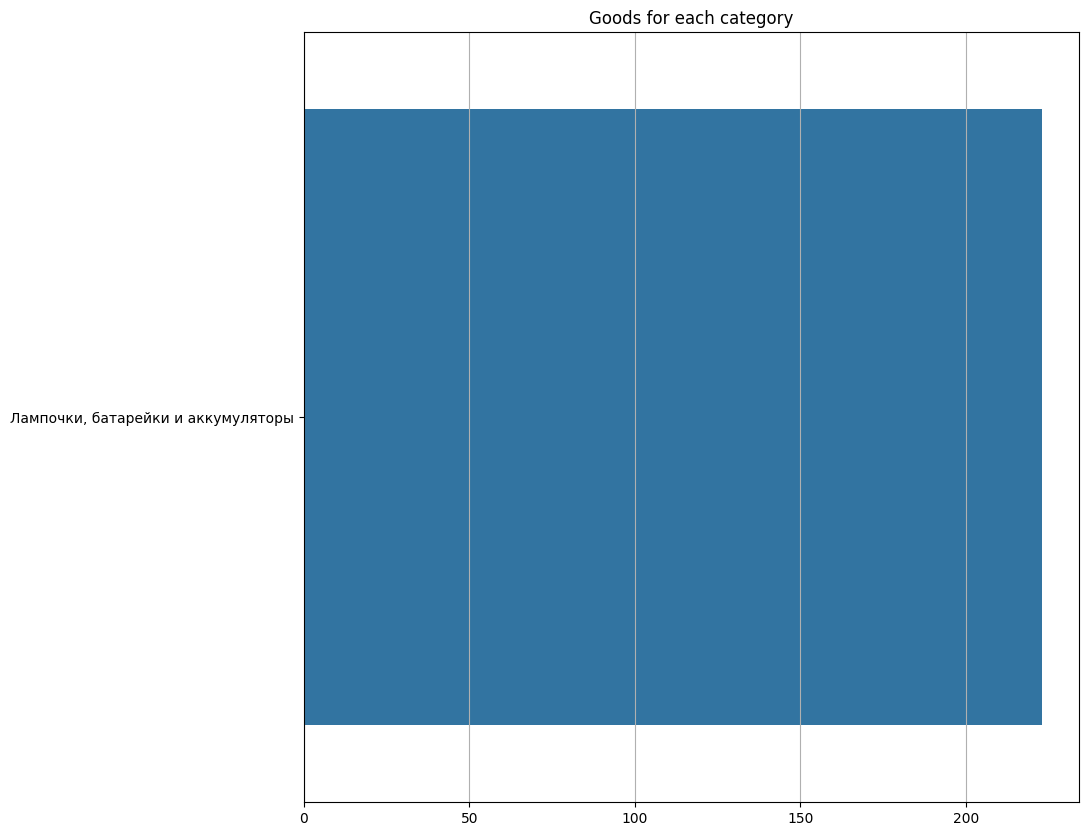

In [162]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Бытовая техника', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Бытовая техника', 'cat2'].value_counts().index) 
None

### Морепродукты

In [163]:
cat2_names = df.loc[df['cat1'] == 'Морепродукты', 'cat2'].unique().tolist()
cat2_names

['Сушеные и вяленые морепродукты',
 'Черная икра',
 'Икра других рыб',
 'Имитированная икра',
 'Красная икра',
 'Пресервы',
 'Закуски',
 'Рыбные консервы',
 'Рыба',
 'Морепродукты',
 'Замороженные морепродукты',
 'Охлажденные морепродукты',
 'Крабовое мясо, палочки',
 'Морская капуста, чука',
 'Копченая рыба',
 'Соленая рыба',
 'Замороженная рыба',
 'Сушеная, вяленая рыба',
 'Охлажденная рыба',
 'Шашлыки и маринады',
 'Креветки',
 'Собственное производство',
 'Крабовое мясо и палочки',
 'Икра',
 'Гриль',
 'Рыбные консервы и кулинария',
 'Копчёная рыба',
 'Мидии',
 'Маркет',
 'Кальмары',
 'Пресервы из морепродуктов',
 'Новый Океан',
 'Пр!ст',
 'Коктейли из морепродуктов',
 'Вся рыба',
 'Сушёная рыба']

In [164]:
len(cat2_names)

36

In [165]:
for i in range(len(df)):
    if df['cat2'][i] == 'Осьминог':
        print(df['cat1'][i], '|', df['name'][i])

In [166]:
for i in range(len(df)):
    if df['cat2'][i] == 'Крупы':
        print(df['name'][i])

Рис длиннозёрный Маркет Перекрёсток, 900г
Гречка ядрица пропаренная Маркет Перекрёсток, 900г
Кускус Зелёная Линия, 350г
Гречка зелёная ядрица 1 сорт Зелёная Линия, 400г
Киноа белая Зелёная Линия, 350г
Булгур из пшеницы Зелёная Линия, 400г
Рис Мистраль Кубань белый круглозёрный, 900г
Рис длиннозёрный Маркет Перекрёсток, 900г
Рис круглозернистый шлифованный, 900г
Рис Националь для плова шлифованный, 900г
Рис Увелка длиннозёрный пропаренный, 5х80г
Рис длиннозёрный, 900г
Рис Мистраль Жасмин белый ароматный длиннозёрный, 500г
Рис пропаренный шлифованный, 900г
Рис Увелка круглозёрный шлифованный, 5х80г
Рис Мистраль Басмати белый ароматный, 500г
Рис Агро-Альянс Кубанский Экстра элитный шлифованный, 900г
Рис Агро-Альянс Экстра для плова шлифованный, 900г
Рис Агро-Альянс Slim&fit Экстра бурый, 800г
Рис Мистраль Янтарь длиннозёрный пропаренный, 900г
Рис круглозёрный Маркет Перекрёсток, 900г
Смесь Увелка Дружба рис круглозёрного и пшено, 5х80г
Рис круглозёрный Маркет Перекрёсток, 4х125г
Рис Мистр

In [167]:
for i in range(len(df)):
    if ' креветка ' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [168]:
for i in range(len(df)):
    if df['cat2'][i] == 'Рыбные консервы' or df['cat2'][i] == 'Рыбные консервы и кулинария':
        df['cat2'][i] = 'Рыбные консервы'
        df['cat1'][i] = 'Консервация'
    if ('слабосоленый' in df['name'][i] or 'слабосолёный' in df['name'][i] or 'соленый' in df['name'][i] or 'солёный' in df['name'][i]) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Соленая рыба'
        df['cat1'][i] = 'Морепродукты'
    if ('копченая' in df['name'][i] or 'подкоптить' in df['name'][i] or 'копчёная' in df['name'][i] or 'копчение' in df['name'][i]) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Копченая рыба'
        df['cat1'][i] = 'Морепродукты'
    if ('вяленый' in df['name'][i] or df['name'][i].startswith('палочка') or 'соломка' in df['name'][i] or 'сушеный' in df['name'][i] or 'сушёный' in df['name'][i]) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Сушеная, вяленая рыба'
        df['cat1'][i] = 'Морепродукты'
    if ('маринад' in df['name'][i] or 'шашлык' in df['name'][i]) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Шашлыки и маринады'
        df['cat1'][i] = 'Морепродукты'
    if (df['name'][i].startswith('крабовый мясо') or df['name'][i].startswith('клешня маленький краб') or df['name'][i].startswith('крабовый палочка') or df['name'][i].startswith('мясо краб')) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Крабовое мясо, палочки'
        df['cat1'][i] = 'Морепродукты'
    if (df['name'][i].startswith('креветка') or df['name'][i].startswith('морепродукт vici креветка') or df['name'][i].startswith('мясо креветка')) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Креветки'
        df['cat1'][i] = 'Морепродукты'
    if (df['name'][i].startswith('кальмар') or df['name'][i].startswith('щупальце кальмар')) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Кальмары'
        df['cat1'][i] = 'Морепродукты'
    if (df['name'][i].startswith('мидия') or df['name'][i].startswith('мясо мидия')) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Мидии'
        df['cat1'][i] = 'Морепродукты'
    if (df['name'][i].startswith('осьминог') or df['name'][i].startswith('мясо осьминог')) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Осьминог'
        df['cat1'][i] = 'Морепродукты'
    if df['name'][i].startswith('гребешок') and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Гребешки'
        df['cat1'][i] = 'Морепродукты'
    if df['name'][i].startswith('икра осетровый') or (df['name'][i].startswith('икра') and 'осётр' in df['name'][i]) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Черная икра'
        df['cat1'][i] = 'Морепродукты'
    if df['name'][i].startswith('икра лосось') or df['name'][i].startswith('икра форель') or (df['name'][i].startswith('икра') and ('лососёвый' in df['name'][i] or 'лососевый' in df['name'][i])) and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Красная икра'
        df['cat1'][i] = 'Морепродукты'
    if df['name'][i].startswith('икра') and 'имитировать' in df['name'][i] and df['cat1'][i] == 'Морепродукты':
        df['cat2'][i] = 'Имитированная икра'
        df['cat1'][i] = 'Морепродукты'
    if df['cat1'][i] == 'Морепродукты' and df['cat2'][i] == 'Гриль':
        df['cat2'][i] = 'Рыба'
        df['cat1'][i] = 'Морепродукты'

In [169]:
df['cat2'] = combine_categories(df['cat2'], 'Замороженная рыба', 'Рыба', 'Рыба')
df['cat2'] = combine_categories(df['cat2'], 'Охлажденная рыба', 'Рыба', 'Рыба')
df['cat2'] = combine_categories(df['cat2'],  'Сушёная рыба', 'Сушеная, вяленая рыба', 'Сушеная, вяленая рыба')
df['cat2'] = combine_categories(df['cat2'], 'Вся рыба', 'Вся рыба', 'Рыба')
df['cat2'] = combine_categories(df['cat2'], 'Копчёная рыба', 'Копченая рыба', 'Копченая рыба')
df['cat2'] = combine_categories(df['cat2'], 'Новый Океан', 'Рыба', 'Рыба')
df['cat2'] = combine_categories(df['cat2'], 'Собственное производство', 'Рыба', 'Рыба')
df['cat2'] = combine_categories(df['cat2'], 'Икра', 'Икра других рыб', 'Икра других рыб')
df['cat2'] = combine_categories(df['cat2'],  'Крабовое мясо и палочки', 'Крабовое мясо, палочки', 'Крабовое мясо, палочки')
df['cat2'] = combine_categories(df['cat2'], 'Замороженные морепродукты', 'Морепродукты', 'Морепродукты')
df['cat2'] = combine_categories(df['cat2'], 'Охлажденные морепродукты', 'Морепродукты', 'Морепродукты')
df['cat2'] = combine_categories(df['cat2'], 'Пресервы из морепродуктов', 'Морепродукты', 'Морепродукты')
df['cat2'] = combine_categories(df['cat2'], 'Закуски', 'Пресервы', 'Пресервы')

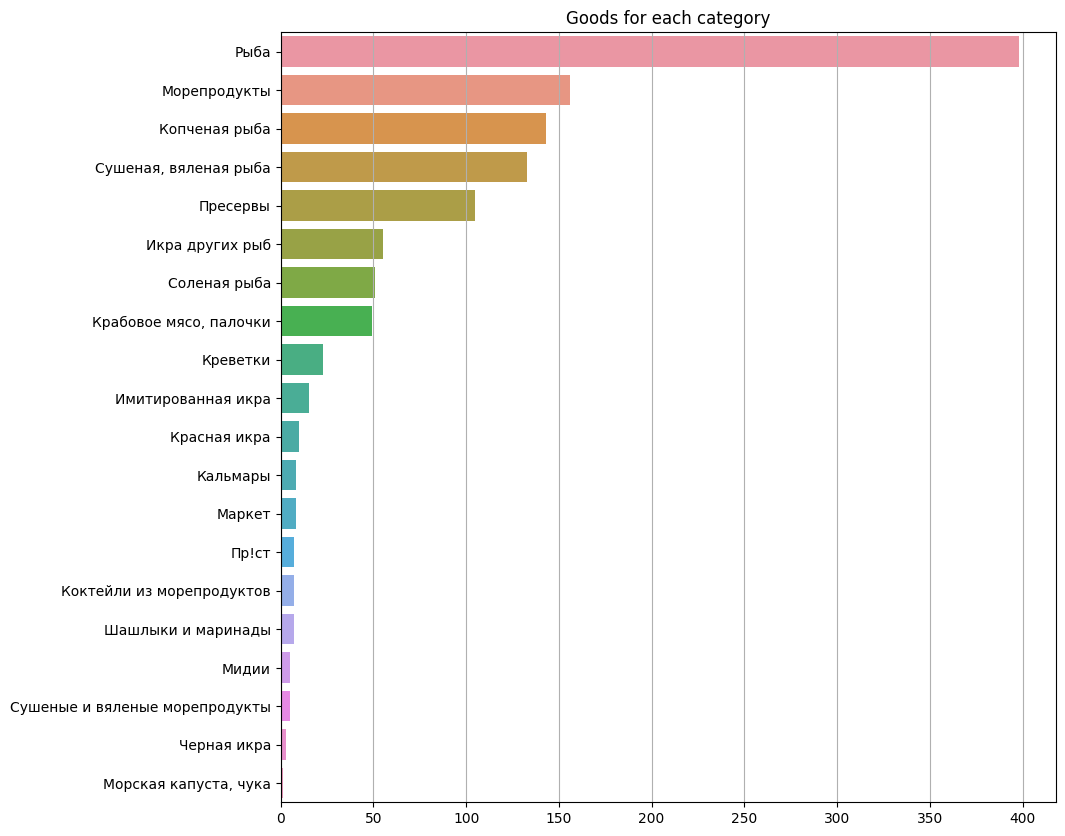

In [170]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Морепродукты', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Морепродукты', 'cat2'].value_counts().index) 
None

### Сад и огород

In [171]:
cat2_names = df.loc[df['cat1'] == 'Сад и огород', 'cat2'].unique().tolist()
cat2_names

[]

In [172]:
len(cat2_names)

0

In [173]:
for i in range(len(df)):
    if df['cat2'][i] == 'Защита растений от болезней и вредителей':
        print(df['cat1'][i], '|', df['name'][i])

In [174]:
for i in range(len(df)):
    if df['cat2'][i] == 'Средства защиты от насекомых и грызунов':
        print(df['name'][i])

In [175]:
for i in range(len(df)):
    if 'метр ' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Уборка, товары для дома | Сушилки для белья, прищепки, шпагат | Шнур бытовой «Шнурком» белый 20 метров диаметр 3мм
Кухня | Прочие принадлежности для кухни | Термометр на магните Fackelman
Кухня | Прочие принадлежности для кухни | Термометр деревянный Fackelmann Urban, 27 см
Кухня | Прочие принадлежности для кухни | Термометр оконный Fackelmann, 7 см
Красота, гигиена, аптека | Аптека | Термометр безртутный клинический NexTemp
Красота, гигиена, аптека | Аксессуары для волос | Бигуди для волос Valexa диаметр 36 мм, 6 шт
Красота, гигиена, аптека | Аксессуары для волос | Бигуди для волос Valexa диаметр 38 мм, 8 шт
Красота, гигиена, аптека | Аксессуары для волос | Бигуди для волос Valexa диаметр 50 мм, 4 шт


In [176]:
for i in range(len(df)):
    if df['name'][i].startswith('леска'):
        df['cat2'][i] = 'Снасти'
        df['cat1'][i] = 'Спорт и отдых'
    if (df['name'][i].startswith('газонокосилка') or df['name'][i].startswith('триммер')) and (df['cat1'][i] == 'Сад и огород' or df['cat1'][i] == 'Спорт и отдых'):
        df['cat2'][i] = 'Газонокосилки и триммеры'
        df['cat1'][i] = 'Сад и огород'
    if df['name'][i].startswith('пила'):
        df['cat2'][i] = 'Цепные пилы'
        df['cat1'][i] = 'Сад и огород'
    if df['name'][i].startswith('горшок ') and df['cat1'][i] == 'Сад и огород':
        df['cat2'][i] = 'Горшки'
        df['cat1'][i] = 'Сад и огород'
    if (df['name'][i].startswith('ваза ') or df['name'][i].startswith('вазы ')) and df['cat1'][i] == 'Сад и огород':
        df['cat2'][i] = 'Вазы'
        df['cat1'][i] = 'Сад и огород'
    if df['name'][i].startswith('кашпо ') and df['cat1'][i] == 'Сад и огород':
        df['cat2'][i] = 'Кашпо'
        df['cat1'][i] = 'Сад и огород'
    if df['name'][i].startswith('поддон ') and df['cat1'][i] == 'Сад и огород':
        df['cat2'][i] = 'Поддоны'
        df['cat1'][i] = 'Сад и огород'
    if (df['name'][i].startswith('пленка ') or df['name'][i].startswith('плёнка ') or df['name'][i].startswith('укрывной материал')) and df['cat1'][i] == 'Сад и огород':
        df['cat2'][i] = 'Пленки'
        df['cat1'][i] = 'Сад и огород'
    if df['name'][i].startswith('метла '):
        df['cat2'][i] = 'Метлы'
        df['cat1'][i] = 'Сад и огород'

In [177]:
df['cat2'] = combine_categories(df['cat2'], 'Косметические средства для бани', 'Аксессуары для бани', 'Аксессуары для бани')
df['cat2'] = combine_categories(df['cat2'], 'Прочая декорация', 'Аксессуары для бани', 'Аксессуары для бани')
df['cat2'] = combine_categories(df['cat2'], 'Товары для бани и сауны', 'Аксессуары для бани', 'Аксессуары для бани')
df['cat2'] = combine_categories(df['cat2'], 'Текстиль для бани','Аксессуары для бани', 'Аксессуары для бани')
df['cat2'] = combine_categories(df['cat2'], 'Аксессуары для барбекю', 'Барбекю и гриль', 'Барбекю и гриль')
df['cat2'] = combine_categories(df['cat2'], 'Средства защиты от насекомых и грызунов', 'Защита растений от болезней и вредителей', 'Защита растений от болезней и вредителей')



### Консервация

In [178]:
cat2_names = df.loc[df['cat1'] == 'Консервация', 'cat2'].unique().tolist()
cat2_names

['Рыбные консервы',
 'Консервы',
 'Овощные консервы',
 'Салаты',
 'Мясные консервы',
 'Маркет',
 'Рыба',
 'Пресервы',
 'Пр!ст']

In [179]:
len(cat2_names)

9

In [180]:
for i in range(len(df)):
    if df['cat2'][i] == 'Пресервы' and df['cat1'][i] == 'Консервация':
        print(df['cat1'][i], '|', df['name'][i])

Консервация | Маслины без косточки Пр!ст, 280г
Консервация | Маслины без косточки Маркет Перекрёсток, 400г
Консервация | Оливки зелёные без косточки Маркет Перекрёсток, 400г
Консервация | Оливки Халкидики с косточкой Market Collection, 200г
Консервация | Оливки зелёные без косточки Пр!ст, 280г
Консервация | Маслины La Explanada без косточки, 350г
Консервация | Оливки La Explanada без косточки, 350г
Консервация | Оливки La Explanada фаршированные пастой из трюфеля, 350г
Консервация | Маслины Bonduelle Classique без косточки, 300г
Консервация | Оливки с лимоном зелёные Пр!ст, 280г
Консервация | Оливки с хамоном зелёные Маркет Перекрёсток, 300г
Консервация | Оливки La Explanada фаршированные апельсином, 350г
Консервация | Оливки Bonduelle Classique без косточки, 300г
Консервация | Оливки зелёные с ароматными травами Маркет Перекрёсток, 300г
Консервация | Оливки с лимоном Маркет Перекрёсток, 300г
Консервация | Оливки с анчоусом зелёные Пр!ст, 280г
Консервация | Оливки зелёные с ароматом го

In [181]:
for i in range(len(df)):
    if 'консерв' in df['cat2'][i]:
        df['cat1'][i] = 'Консервация'
    if df['cat2'][i] == 'Салаты':
        df['cat1'][i] = 'Полуфабрикаты'

In [182]:
df['cat2'] = combine_categories(df['cat2'], 'Соленья', 'Овощные консервы', 'Овощные консервы')
df['cat2'] = combine_categories(df['cat2'], 'Рыба', 'Рыбные консервы', 'Рыбные консервы')
df['cat2'] = combine_categories(df['cat2'], 'Рыба', 'Рыбные консервы', 'Рыбные консервы')

### Хлеб и выпечка

In [183]:
cat2_names = df.loc[df['cat1'] == 'Хлеб и выпечка', 'cat2'].unique().tolist()
cat2_names

['Сухари',
 'Сушки, баранки, хлебные палочки',
 'Хлебцы',
 'Пирожные, десерты',
 'Выпечка',
 'Торты',
 'Пирожки, булочки',
 'Слойки, пончики',
 'Булочки',
 'Маффины, кексы',
 'Хлеб',
 'Багеты, чиабатта',
 'Круассаны',
 'Пончики, донаты',
 'Хлеб белый, батоны',
 'Лаваш, лепешки, пита',
 'Хлеб серый',
 'Хлеб\xa0черный',
 'Кексы',
 'Круассаны, выпечка',
 'Хлеб для бургеров, сэндвичей',
 'Просто хлеб',
 'Тесто, основы, хлеб',
 'Слойки',
 'Тесто',
 'Тарталетки',
 'Хлебные изделия',
 'Печенье',
 'Пастила',
 'Замороженные полуфабрикаты',
 'Хлебные палочки',
 'Пицца и пироги',
 'Правильные сладости',
 'Лаваш и лепёшки',
 'Сушки и баранки',
 'Зелёная линия',
 'Пироги, сдоба, кексы, рулеты',
 'Пресервы',
 'Пр!ст',
 'Диабетическая продукция',
 'Сухие завтраки',
 'Ухтышки']

In [184]:
len(cat2_names)

42

In [185]:
for i in range(len(df)):
    if df['cat2'][i] == 'Сухари':
        print(df['cat1'][i], '|', df['name'][i])

Хлеб и выпечка | Кантуччи АШАН Красная птица с арахисом, 200 г
Хлеб и выпечка | Кантуччи АШАН Красная птица с изюмом, 200 г
Хлеб и выпечка | Сухарики «Рижский хлеб» Крестьянские с луком, 75 г
Хлеб и выпечка | Сухарики «Рижский хлеб» Крестьянские с чесноком, 75 г
Хлеб и выпечка | Сухари АШАН Красная птица с арахисом, 300 г
Хлеб и выпечка | Сухари АШАН Красная птица с изюмом, 300 г
Хлеб и выпечка | Сухари АШАН Красная птица ванильные, 300 г
Хлеб и выпечка | Сухари «Семейка ОЗБИ» Осенние, 300 г
Хлеб и выпечка | Сухари АШАН гренки ржаные с чесноком, вес
Хлеб и выпечка | Сухари «Алексинский хлебокомбинат» с изюмом, 350 г
Хлеб и выпечка | Сухарики «Ого!» ванильные, 250 г
Хлеб и выпечка | Сухари «Алексинский хлебокомбинат» Осенние, 350 г
Хлеб и выпечка | Сухари «Алексинский хлебокомбинат» Киевские, 350 г
Хлеб и выпечка | Сухари АШАН Красная птица с маком, 300 г
Хлеб и выпечка | Сухари «ОГО!» Luxe сахарные с изюмом, 250 г
Хлеб и выпечка | Сухарики «Ого!» с изюмом, 250 г
Хлеб и выпечка | Сухари

In [186]:
for i in range(len(df)):
    if 'тараллинь' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [187]:
for i in range(len(df)):
    if df['name'][i].startswith('багет ') or df['name'][i].startswith('минь багет'):
        df['cat2'][i] = 'Багеты'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('чиабат'):
        df['cat2'][i] = 'Чиабатта'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('сандвич ') or df['name'][i].startswith('сэндвич ') or df['name'][i].startswith('сендвич '):
        df['cat2'][i] = 'Сэндвичи и шаурма'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('круассан ') or df['name'][i].startswith('круасан ') or df['name'][i].startswith('минь круас'):
        df['cat2'][i] = 'Круассаны'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('маффин') or df['name'][i].startswith('мафин') or df['name'][i].startswith('минь маффин'):
        df['cat2'][i] = 'Маффины'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('кекс ') or df['name'][i].startswith('кексы ') or df['name'][i].startswith('минь кекс'):
        df['cat2'][i] = 'Кексы'
        df['cat1'][i] = 'Хлеб и выпечка'
    if 'мадлен' in df['name'][i] or df['name'][i].startswith('бисквит '):
        df['cat2'][i] = 'Мадлены, бисквиты'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('кулич ') or df['name'][i].startswith('куличи '):
        df['cat2'][i] = 'Куличи'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('пирог '):
        df['cat2'][i] = 'Пироги'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('пончик ') or df['name'][i].startswith('донат '):
        df['cat2'][i] = 'Пончики'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('штрудель ') or df['name'][i].startswith('минь штрудель'):
        df['cat2'][i] = 'Штрудели'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('изделие хлебобулочный') or df['name'][i].startswith('хлебобулочный изделие'):
        df['cat2'][i] = 'Хлебобулочные изделия'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('булочка') or df['name'][i].startswith('булочки') or 'бриош' in df['name'][i] or df['name'][i].startswith('изделие булочный') :
        df['cat2'][i] = 'Булочки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('рулет ') or df['name'][i].startswith('минь рулет') or df['name'][i].startswith('рулетик '):
        df['cat2'][i] = 'Рулеты'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('ватрушка') or df['name'][i].startswith('ватрушки') or df['name'][i].startswith('витушка '):
        df['cat2'][i] = 'Ватрушки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('плюшка') or df['name'][i].startswith('плюшки '):
        df['cat2'][i] = 'Плюшки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('сочник'):
        df['cat2'][i] = 'Сочник'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('слойка '):
        df['cat2'][i] = 'Слойки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if ('крендел' in df['name'][i] or df['name'][i].startswith('улитка') or df['name'][i].startswith('косичка ')) and df['cat1'][i] == 'Хлеб и выпечка':
        df['cat2'][i] = 'Крендельки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['cat2'][i] == 'Пирожки, булочки':
        df['cat2'][i] = 'Печенье'
        df['cat1'][i] = 'Сладости'
    if (df['name'][i].startswith('сушка ') or df['name'][i].startswith('минь сушка')) and df['cat1'][i] == 'Хлеб и выпечка':
        df['cat2'][i] = 'Сушки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if (df['name'][i].startswith('баранка ') or df['name'][i].startswith('минь баранка') or df['name'][i].startswith('баранки ') or df['name'][i].startswith('минь баранки')) and df['cat1'][i] == 'Хлеб и выпечка':
        df['cat2'][i] = 'Баранки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['cat2'][i] == 'Печенье':
        df['cat2'][i] = 'Печенье'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('батон') or df['name'][i].startswith('пава ашан гурман'):
        df['cat2'][i] = 'Батоны'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('лаваш') or df['name'][i].startswith('лепешка')  or df['name'][i].startswith('лепёшка')  or df['name'][i].startswith('пит '):
        df['cat2'][i] = 'Лаваш, лепешки, пита'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('тарталетка') or df['name'][i].startswith('тарталетки'):
        df['cat2'][i] = 'Тарталетки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if (df['name'][i].startswith('тесто ') or df['name'][i].startswith('слоёный тесто ') or df['name'][i].startswith('слоеный тесто '))  and 'пицца' not in df['name'][i]:
        df['cat2'][i] = 'Тесто'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('пицца') or df['name'][i].startswith('тесто пицца') or df['name'][i].startswith('пиццетта ') or df['name'][i].startswith('основа пицца'):
        df['cat2'][i] = 'Пицца'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('тараллинь') or df['name'][i].startswith('таралинь'):
        df['cat2'][i] = 'Тараллинь'
        df['cat1'][i] = 'Хлеб и выпечка'


In [188]:
df['cat2'] = combine_categories(df['cat2'], 'Тесто, основы, хлеб', 'Тесто', 'Тесто')
df['cat2'] = combine_categories(df['cat2'], 'Лаваш и лепёшки', 'Лаваш, лепешки, пита', 'Лаваш, лепешки, пита')
df['cat2'] = combine_categories(df['cat2'], 'Плюшки', 'Хлеб', 'Хлеб')
df['cat2'] = combine_categories(df['cat2'], 'Сушки, баранки, хлебные палочки','Хлебные палочки', 'Хлебные палочки')


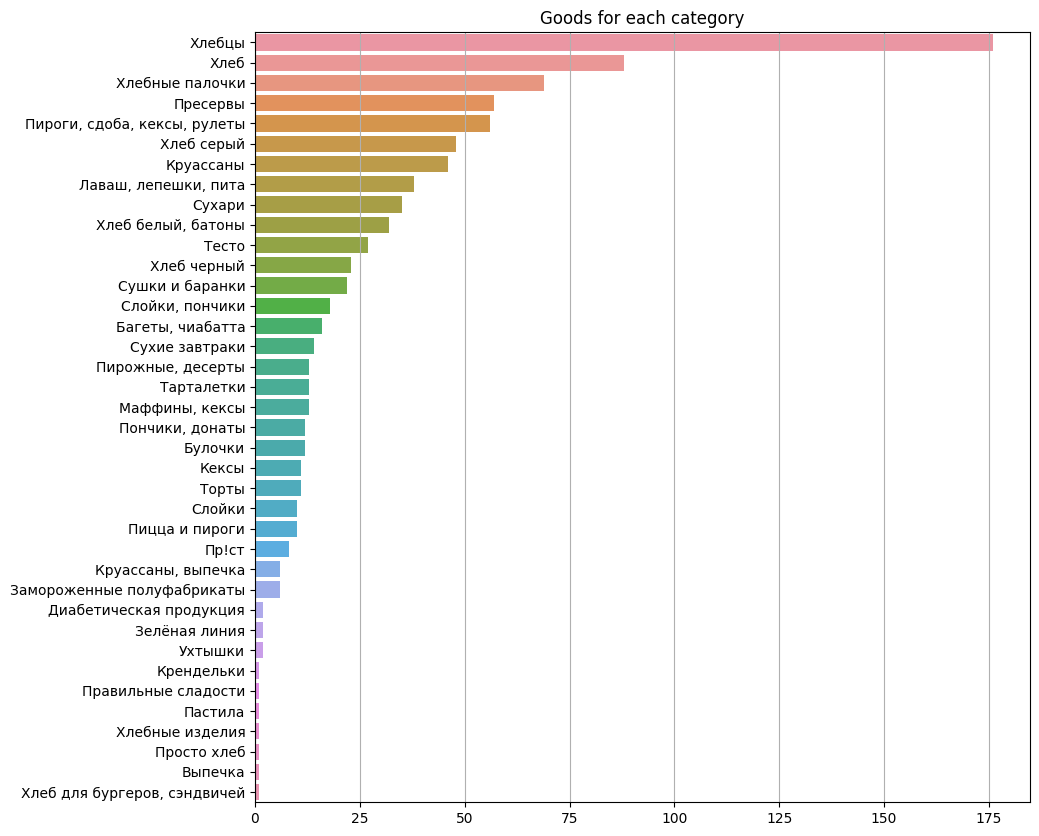

In [189]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Хлеб и выпечка', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Хлеб и выпечка', 'cat2'].value_counts().index) 
None

### Овощи, фрукты, ягоды, грибы

In [190]:
cat2_names = df.loc[df['cat1'] == 'Овощи, фрукты, ягоды, грибы', 'cat2'].unique().tolist()
cat2_names

['Салатные смеси, салаты',
 'Лук',
 'Баклажаны, кабачки',
 'Экзотические',
 'Виноград',
 'Томаты, огурцы',
 'Ягоды',
 'Картофель',
 'Свежие',
 'Цитрусовые',
 'Капуста',
 'Перец сладкий, острый',
 'Морковь, свекла',
 'Яблоки, груши',
 'Редис, редька, репа',
 'Горошек, кукуруза',
 'Овощи',
 'Грибы',
 'Фрукты',
 'Бананы',
 'Проростки, семена',
 'Имбирь',
 'Маркет',
 'Овощи и смеси',
 'Съешь меня',
 'Пресервы',
 'Пр!ст']

In [191]:
len(cat2_names)

27

In [192]:
for i in range(len(df)):
    if df['cat2'][i] == 'Экзотические' and df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы':
        print(df['cat1'][i], '|', df['name'][i])

Овощи, фрукты, ягоды, грибы | Слива синяя, вес
Овощи, фрукты, ягоды, грибы | Манго спелое, вес
Овощи, фрукты, ягоды, грибы | Абрикосы шаллах, вес
Овощи, фрукты, ягоды, грибы | Маракуйя, 2 шт
Овощи, фрукты, ягоды, грибы | Манго Тайское желтое,  1 шт
Овощи, фрукты, ягоды, грибы | Авокадо Хасс, 1 шт
Овощи, фрукты, ягоды, грибы | Авокадо Хасс, 700 г
Овощи, фрукты, ягоды, грибы | Арбуз, ~7 кг
Овощи, фрукты, ягоды, грибы | Дыня Колхозница ~ 2 кг
Овощи, фрукты, ягоды, грибы | Питахайя 1 шт ~ 300 г
Овощи, фрукты, ягоды, грибы | Нектарин Узбекистан, вес
Овощи, фрукты, ягоды, грибы | Абрикосы в корзинке, 900 г
Овощи, фрукты, ягоды, грибы | Алыча, 500 г
Овощи, фрукты, ягоды, грибы | Авокадо, вес
Овощи, фрукты, ягоды, грибы | Кумкват, 250 г
Овощи, фрукты, ягоды, грибы | Персики в корзинке, 900 г
Овощи, фрукты, ягоды, грибы | Авокадо Has, 2 шт
Овощи, фрукты, ягоды, грибы | Абрикосы в корзинке, 450 г
Овощи, фрукты, ягоды, грибы | Маракуйя, 250 г
Овощи, фрукты, ягоды, грибы | Гранат, вес
Овощи, фрукт

In [193]:
for i in range(len(df)):
    if df['cat2'][i] == 'Морковь':
        print(df['cat1'][i], '|', df['name'][i])

In [194]:
for i in range(len(df)):
    if 'маркет' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [195]:
for i in range(len(df)):
    if df['name'][i].startswith('манго') and 'овый' not in df['name'][i] and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Манго'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('хурма') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Хурма'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('киви') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Киви'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('дыня') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Дыня'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('арбуз') and 'ный' not in df['name'][i] and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and 'ная' not in df['name'][i] and 'ное' not in df['name'][i] and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Арбуз'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('слива') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Слива'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('питахайя') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Питахайя'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('вишня') or df['name'][i].startswith('черешня') and df['cat1'][i] != 'Консервация' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Вишня, черешня'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('ананас') and 'овый' not in df['name'][i] and df['cat1'][i] != 'Консервация' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Ананас'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('абрикос') and 'овый' not in df['name'][i] and df['cat1'][i] != 'Консервация' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Абрикос'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('персик') and 'овый' not in df['name'][i] and df['cat1'][i] != 'Консервация' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Персики'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('банан') and 'овый' not in df['name'][i] and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i] and df['cat1'][i] != 'Консервация' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки' and df['cat1'][i] != 'Полуфабрикаты':
        df['cat2'][i] = 'Бананы'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('маслина') or df['name'][i].startswith('каперс') or df['name'][i].startswith('оливка')) and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Снеки':
        df['cat2'][i] = 'Оливки, маслины, каперсы'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('мандарин') or df['name'][i].startswith('апельсин') or df['name'][i].startswith('лайм') or df['name'][i].startswith('лимон') or df['name'][i].startswith('помело') or df['name'][i].startswith('грейпфрут')) and df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы':
        df['cat2'][i] = 'Цитрусовые'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('яблоко') or df['name'][i].startswith('груша')) and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Яблоки, груши'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('виноград') and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Виноград'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('томат') and 'тный' not in df['name'][i] and 'тная' not in df['name'][i] and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Томаты'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('огурец') and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Огурцы'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('перец') and df['cat1'][i] != 'Специи, соль, сахар' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Перец сладкий, острый'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('лук ') or df['name'][i].startswith('чеснок')) and df['cat1'][i] != 'Специи, соль, сахар' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Лук, чеснок'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('картофель') or df['name'][i].startswith('картошка')) and df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы':
        df['cat2'][i] = 'Картофель'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('смесь овощной'):
        df['cat2'][i] = 'Овощи и смеси'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('морковь')  and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеная' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Морковь'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('голубика') or df['name'][i].startswith('ягодный микс') or df['name'][i].startswith('микс artfruit') or df['name'][i].startswith('малина') or df['name'][i].startswith('микс малина') or df['name'][i].startswith('физалис') or df['name'][i].startswith('клубника')) and df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы':
        df['cat2'][i] = 'Ягоды'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('укроп') or df['name'][i].startswith('мятый') or df['name'][i].startswith('зелень') or df['name'][i].startswith('розмарин') or df['name'][i].startswith('тимьян') or df['name'][i].startswith('базилик') or df['name'][i].startswith('набор окрошка') or df['name'][i].startswith('набор зелень') or df['name'][i].startswith('кинза') or df['name'][i].startswith('щавель') or df['name'][i].startswith('салат айсберг') or df['name'][i].startswith('айсберг') or df['name'][i].startswith('петрушка') or df['name'][i].startswith('спаржа') or df['name'][i].startswith('шпинат')) and df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы':
        df['cat2'][i] = 'Зелень'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('авокадо'):
        df['cat2'][i] = 'Авокадо'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('кабачок') or df['name'][i].startswith('баклажан')) and 'овый' not in df['name'][i] and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'сушеный' not in df['name'][i] and 'консерв' not in df['name'][i] and 'сушёный' not in df['name'][i]:
        df['cat2'][i] = 'Кабачок, баклажан'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('шампиньон') or df['name'][i].startswith('вешенка') or df['name'][i].startswith('гриб')) and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Полуфабрикаты' and 'консерв' not in df['name'][i]:
        df['cat2'][i] = 'Грибы'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('капуста') and df['cat1'][i] != 'Консервация' and df['cat1'][i] != 'Снеки' and df['cat2'][i] != 'Маркет' and df['cat1'][i] != 'Полуфабрикаты':
        df['cat2'][i] = 'Капуста'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['cat1'][i] == 'Овощи, фрукты, ягоды, грибы' and (df['cat2'][i] == 'Пресервы' or df['cat2'][i] == 'Съешь меня' or df['cat2'][i] == 'Фрукты'):
        df['cat2'][i] = 'Экзотические'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('брокколи') or df['name'][i].startswith('броколи')):
        df['cat2'][i] = 'Брокколи'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('горошек') or df['name'][i].startswith('броколи')):
        df['cat2'][i] = 'Горошек'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if (df['name'][i].startswith('кукуруза') or df['name'][i].startswith('броколи')):
        df['cat2'][i] = 'Кукуруза'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('тыква'):
        df['cat2'][i] = 'Тыква'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'

In [196]:
df['cat2'] = combine_categories(df['cat2'], 'Свежие', 'Грибы', 'Грибы')
df['cat2'] = combine_categories(df['cat2'], 'Салатные смеси, салаты', 'Овощи и смеси', 'Овощи и смеси')


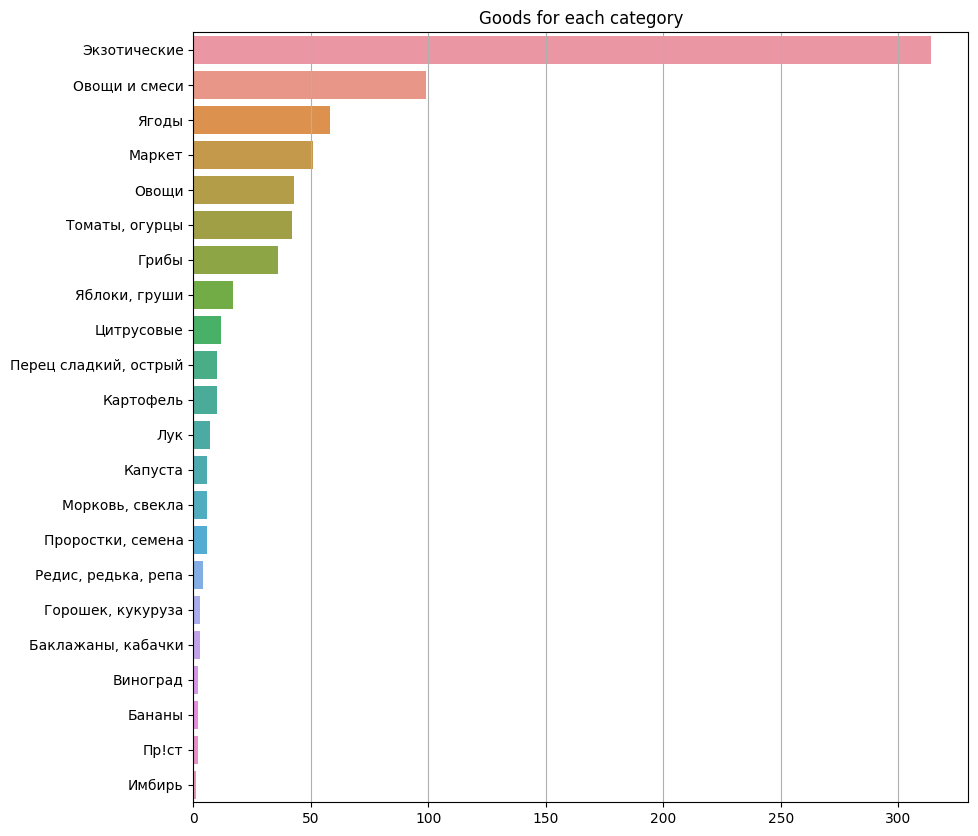

In [197]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.title('Goods for each category')
sns.barplot(x=df.loc[df['cat1'] == 'Овощи, фрукты, ягоды, грибы', 'cat2'].value_counts().values, y=df.loc[df['cat1'] == 'Овощи, фрукты, ягоды, грибы', 'cat2'].value_counts().index) 
None

In [198]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'auchan_perekrestok_prepared_cat2.csv', index=False)

### Соусы, кетчупы, майонезы + Специи, соль, сахар

In [199]:
cat2_names = df.loc[df['cat1'] == 'Соусы, кетчупы, майонезы', 'cat2'].unique().tolist()
cat2_names.extend(df.loc[df['cat1'] == 'Специи, соль, сахар', 'cat2'].unique().tolist())


In [200]:
len(cat2_names)


14

In [201]:
cat2_names.sort()
cat2_names

['Горчица',
 'Диабетическая продукция',
 'Зелень, пряные травы',
 'Майонез',
 'Маркет',
 'Маркет',
 'Пр!ст',
 'Пр!ст',
 'Соусы',
 'Специи, приправы и пряности',
 'Специи, приправы и пряности',
 'Томатная паста',
 'Уксус',
 'Хрен']

In [202]:
df['cat2'] = combine_categories(df['cat2'], 'Соусы', 'Соусы кулинарные', 'Соусы кулинарные')
df['cat2'] = combine_categories(df['cat2'], 'Специи и пряности', 'Приправы', 'Специи, приправы и пряности')
df['cat2'] = combine_categories(df['cat2'], 'Томатная паста', 'Кетчуп и томатная паста', 'Кетчуп и томатная паста')


df['cat1'][df['cat2']=='Специи, приправы и пряности'] = 'Специи, соль, сахар'



### Спорт и отдых

In [203]:
cat2_names = df.loc[df['cat1'] == 'Спорт и отдых', 'cat2'].unique().tolist()

In [204]:
len(cat2_names)


0

In [205]:
cat2_names.sort()
cat2_names

[]

In [206]:
df.loc[df['cat2'] == 'Аксессуары', ['name', 'attributes', 'cat1']]

,name,attributes,cat1


In [207]:
df['cat2'] = combine_categories(df['cat2'], 'Аминокислоты, BCAA', 'Протеины, протеиновые батончики', 'БАДы, витамины, протеиновые батончики')
df['cat2'] = combine_categories(df['cat2'], 'Спортивное питание', 'БАДы, витамины', 'БАДы, витамины, протеиновые батончики')


df['cat2'] = combine_categories(df['cat2'], 'Инвентарь для фитнеса', 'Инвентарь', 'Инвентарь, снаряжение')
df['cat2'] = combine_categories(df['cat2'], 'Снаряжение', 'Аксессуары для фитнеса', 'Инвентарь, снаряжение')

df['cat2'] = combine_categories(df['cat2'], 'Снасти', 'Фурнитура', 'Рыбалка')
df['cat2'] = combine_categories(df['cat2'], 'Удочки и спиннинги', 'Фурнитура', 'Рыбалка')

df['cat2'] = combine_categories(df['cat2'], 'Шапочки для плавания', 'Отдых на пляже', 'Аксессуары для плавания')













ValueError: min() arg is an empty sequence

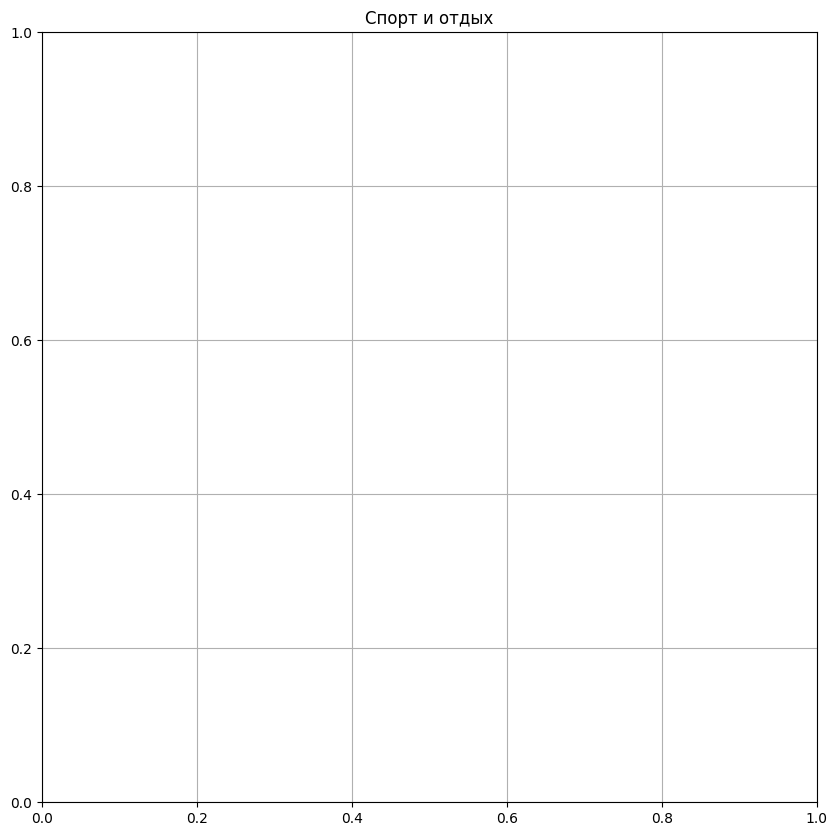

In [208]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Спорт и отдых'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Канцтовары

In [209]:
cat2_names = df.loc[df['cat1'] == 'Канцтовары', 'cat2'].unique().tolist()
cat2_names

['Канцелярия']

In [210]:
len(cat2_names)

1

In [211]:
for i in range(len(df)):
    if df['cat2'][i] == 'Наклейки':
        print(df['cat1'][i], '|', df['name'][i])

In [212]:
for i in range(len(df)):
    if 'маркет' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [213]:
for i in range(len(df)):
    if df['name'][i].startswith('набор гибкий линейка') and df['cat1'][i] == 'Канцтовары':
        df['cat2'][i] = 'Наборы чертежные'
        df['cat1'][i] = 'Канцтовары'
    if df['name'][i].startswith('настольный покрытие officespace') and df['cat1'][i] == 'Канцтовары':
        df['cat2'][i] = 'Бумага'
        df['cat1'][i] = 'Канцтовары'
    

In [214]:
df['cat2'] = combine_categories(df['cat2'], 'Папки для бумаги', 'Папки', 'Папки')
df['cat2'] = combine_categories(df['cat2'], 'Папки файловые', 'Папки', 'Папки')
df['cat2'] = combine_categories(df['cat2'], 'Папки для тетрадей', 'Папки', 'Папки')
df['cat2'] = combine_categories(df['cat2'], 'Папки-уголки', 'Папки', 'Папки')
df['cat2'] = combine_categories(df['cat2'], 'Творческие наборы для детей', 'Наборы чертежные', 'Наборы чертежные')
df['cat2'] = combine_categories(df['cat2'], 'Школьные тетради', 'Тетради', 'Тетради')
df['cat2'] = combine_categories(df['cat2'], 'Бумага копировальная и калька', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Цветная бумага, фольга', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Бумага для заметок', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Бумага для акварели', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Бумага для офисной техники', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Планеры', 'Бумага', 'Бумага')
df['cat2'] = combine_categories(df['cat2'], 'Школьные мелки', 'Мелки', 'Мелки')
df['cat2'] = combine_categories(df['cat2'], 'Восковые мелки', 'Мелки', 'Мелки')
df['cat2'] = combine_categories(df['cat2'], 'Цветные карандаши', 'Карандаши', 'Карандаши')
df['cat2'] = combine_categories(df['cat2'], 'Маркеры и текстовыделители', 'Фломастеры', 'Фломастеры')
df['cat2'] = combine_categories(df['cat2'], 'Скетчбуки', 'Блокноты и записные книжки', 'Блокноты и записные книжки')


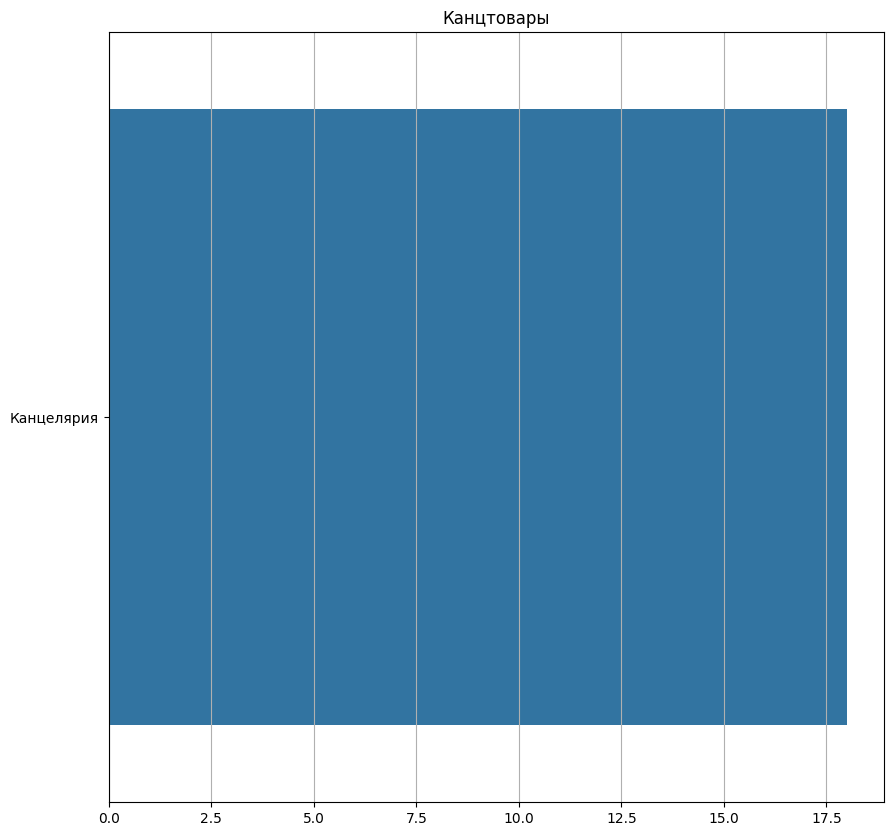

In [215]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Канцтовары'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Снеки

In [216]:
cat2_names = df.loc[df['cat1'] == 'Снеки', 'cat2'].unique().tolist()
cat2_names

['Чипсы',
 'Орехи',
 'Сухофрукты',
 'Семечки, семена',
 'Смеси орехов и сухофруктов',
 'Грибы сушеные',
 'Крекер',
 'Десерты и снеки',
 'Сухарики, гренки',
 'Попкорн',
 'Хамон, сыровяленые деликатесы',
 'Сушеные и вяленые морепродукты',
 'Хлебные палочки',
 'Сэндвичи, пироги, шаурма, пицца',
 'Фрукты, орехи в шоколаде',
 'Семечки',
 'Правильные сладости',
 'Маркет',
 'Водоросли',
 'Зелёная линия',
 'Начос',
 'Гренки',
 'Пр!ст',
 'Кукурузные палочки',
 'Спортивное питание и БАД',
 'Ухтышки']

In [217]:
len(cat2_names)

26

In [218]:
for i in range(len(df)):
    if df['cat2'][i] == 'Десерты и снеки' and df['cat1'][i] == 'Снеки':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Снеки | Десерты и снеки | Снеки кукурузные «Сырколбас» двойной сыр, 100 г
Снеки | Десерты и снеки | Снеки кукурузные «Сырколбас» колбаски гриль, 100 г
Снеки | Десерты и снеки | Батончик-мюсли «Леовит» My Like Арахис, 25 г
Снеки | Десерты и снеки | Батончик-мюсли «Леовит» My Like Черная смородина, 25 г
Снеки | Десерты и снеки | Ломтики куриные «Вкусы мира» Кавказские сыровяленые, 35 г
Снеки | Десерты и снеки | Ломтики куриные «Вкусы мира» Мексиканские сыровяленые, 35 г
Снеки | Десерты и снеки | Ломтики куриные «Вкусы мира» сыровяленые клюква-брусника, 35 г
Снеки | Десерты и снеки | Фруктовые пастилки te Gusto из яблока, 90 г
Снеки | Десерты и снеки | Козинаки льняные laFiTOre на фруктозе с кунжутом, 27 г
Снеки | Десерты и снеки | Снек кукурузный Legumes нут с солью, 35 г
Снеки | Десерты и снеки | Палочки кукурузные «Русскарт» КУЗЯ Лакомкин со вкусом клубники, 100 г
Снеки | Десерты и снеки | Снеки Little Angel Rosie кукурузные органические БИО, 30 г
Снеки | Десерты и снеки | Снек кукуруз

In [219]:
for i in range(len(df)):
    if 'колбаска' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Полуфабрикаты | Вторые блюда | Пататас Бравас с колбасками и соусом айоли Шеф Перекрёсток, 250г


In [220]:
for i in range(len(df)):
    if df['cat2'][i] == 'Правильные сладости' and df['cat1'][i] != 'Мёд, варенье, джемы, сиропы':
        df['cat2'][i] = 'Правильные сладости'
        df['cat1'][i] = 'Сладости'
    if df['cat2'][i] == 'Правильные сладости' and df['cat1'][i] == 'Мёд, варенье, джемы, сиропы':
        df['cat2'][i] = 'Варенье'
        df['cat1'][i] = 'Мёд, варенье, джемы, сиропы'
    if df['name'][i].startswith('пастила'):
        df['cat2'][i] = 'Пастила'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('крекер'):
        df['cat2'][i] = 'Крекер'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('конфета'):
        df['cat2'][i] = 'Шоколадные конфеты'
        df['cat1'][i] = 'Сладости'
    if df['cat1'][i] == 'Снеки' and df['cat2'][i] == 'Пастила':
        df['cat2'][i] = 'Сухарики, гренки'
        df['cat1'][i] = 'Снеки'
    if df['cat1'][i] == 'Снеки' and df['cat2'][i] == 'Шоколад':
        df['cat2'][i] = 'Шоколад'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('пирожок') or df['name'][i].startswith('киш') or df['name'][i].startswith('расстегай') or df['name'][i].startswith('чебурек') or df['name'][i].startswith('биточек') or df['name'][i].startswith('кайзерка') or df['name'][i].startswith('эчпочмак') or df['name'][i].startswith('сдоба'):
        df['cat2'][i] = 'Булочки'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('шаурма') or df['name'][i].startswith('шаверма')  or df['name'][i].startswith('ролл '):
        df['cat2'][i] = 'Шаурма'
        df['cat1'][i] = 'Хлеб и выпечка'
    if df['name'][i].startswith('гриб'):
        df['cat2'][i] = 'Грибы'
        df['cat1'][i] = 'Овощи, фрукты, ягоды, грибы'
    if df['name'][i].startswith('семечко') or df['name'][i].startswith('кранча семечко'):
        df['cat2'][i] = 'Семечки, семена'
        df['cat1'][i] = 'Снеки'
    if df['name'][i].startswith('драже'):
        df['cat2'][i] = 'Карамель, драже, леденцы'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('финик'):
        df['cat2'][i] = 'Сухофрукты'
        df['cat1'][i] = 'Снеки'
    if df['cat1'][i] == 'Снеки' and df['cat2'][i] == 'Сушеные и вяленые морепродукты':
        df['cat2'][i] = 'Сушеная, вяленая рыба'
        df['cat1'][i] = 'Морепродукты'
    if df['name'][i].startswith('кукурузный снек') or df['name'][i].startswith('палочка кукурузный'):
        df['cat2'][i] = 'Кукурузные палочки'
        df['cat1'][i] = 'Снеки'
    if df['name'][i].startswith('палочка cheetos') or df['name'][i].startswith('луковый кольцо'):
        df['cat2'][i] = 'Чипсы'
        df['cat1'][i] = 'Снеки'
    if df['name'][i].startswith('колбаска'):
        df['cat2'][i] = 'Колбаса, ветчина'
        df['cat1'][i] = 'Колбасные изделия, холодец, паштет'
        

In [221]:
df['cat2'] = combine_categories(df['cat2'], 'Гренки', 'Сухарики, гренки', 'Сухарики, гренки')
df['cat2'] = combine_categories(df['cat2'], 'Начос', 'Чипсы', 'Чипсы')
df['cat2'] = combine_categories(df['cat2'], 'Семечки', 'Семечки, семена', 'Семечки, семена')
df['cat2'] = combine_categories(df['cat2'], 'Десерты и снеки', 'Водоросли', 'Водоросли')

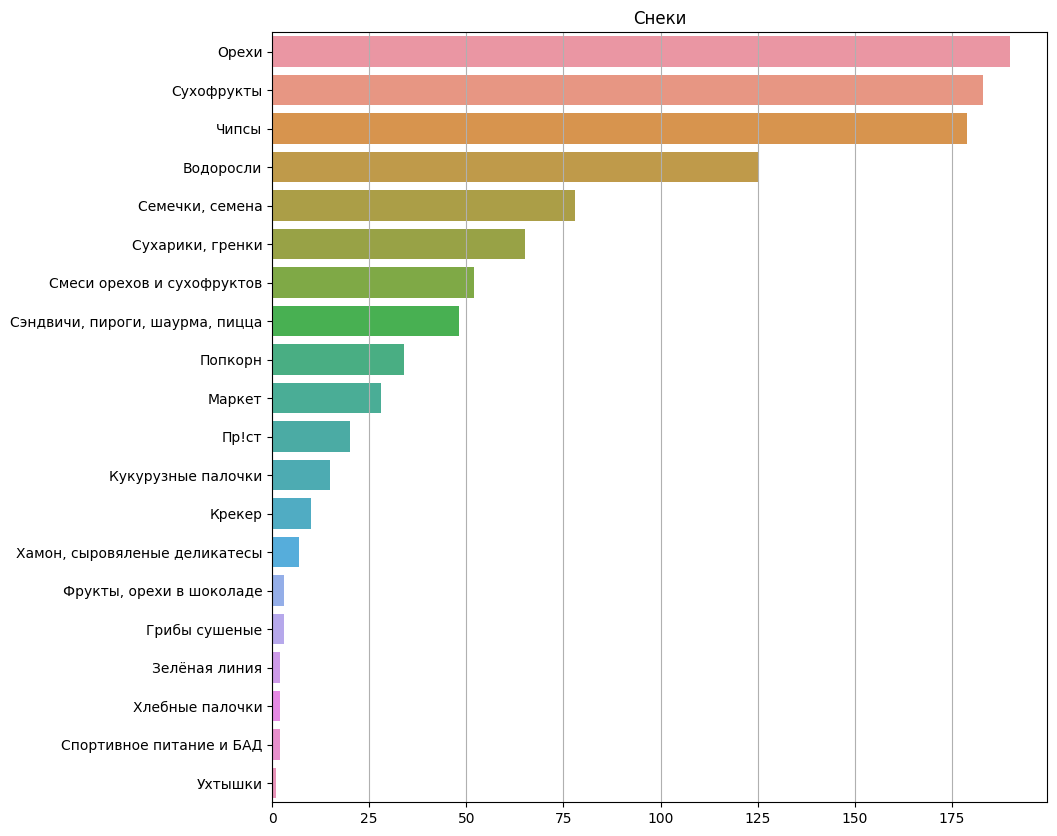

In [222]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Снеки'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Для праздника

In [223]:
cat2_names = df.loc[df['cat1'] == 'Для праздника', 'cat2'].unique().tolist()
cat2_names

['Одноразовая посуда, скатерти']

In [224]:
len(cat2_names)

1

In [225]:
for i in range(len(df)):
    if df['cat2'][i] == 'Игры и атрибутика для развлечений':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [226]:
for i in range(len(df)):
    if 'одноразовый' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Новый Год 250 мл, 5 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный  с днем 8 марта 250 мл, 6 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Пасха 250 мл, 6 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Абрикосы 250 мл, 6 шт
Кухня | Аксессуары, наборы | Размешиватель одноразовый «Каждый день», 50 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Фруктовые дольки 250 мл, 6 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Урожай 250 мл, 6 шт
Кухня | Стаканы, стопки, рюмки | Стакан одноразовый бумажный Коктейль 250 мл, 6 шт
Кухня | Одноразовая посуда | Нож одноразовый Green Mystery168 мм, 50 шт
Красота, гигиена, аптека | Станки и кассеты | Бритвенный станок Twin Mr. Razor SHV03 одноразовый 2 лезвия, 10 шт
Красота, гигиена, аптека | Станки и кассеты | Станок одноразовый бритвенный Twin Blade 2 лезвия, 5 шт
Красота, гигиена, аптека | Станки и кассеты |

In [227]:
for i in range(len(df)):
    if df['name'][i].startswith('открытка'):
        df['cat2'][i] = 'Открытки'
        df['cat1'][i] = 'Для праздника'
    if df['name'][i].startswith('набор одноразовый') and df['cat1'][i] != 'Кухня':
        df['cat2'][i] = 'Аксессуары, наборы'
        df['cat1'][i] = 'Кухня'
    if df['cat2'][i] == 'Одноразовая посуда, скатерти' and df['cat1'][i] == 'Для праздника':
        df['cat2'][i] = 'Аксессуары, наборы'
        df['cat1'][i] = 'Кухня'

In [228]:
df['cat2'] = combine_categories(df['cat2'], 'Фольгированные шарики', 'Шарики', 'Шарики')
df['cat2'] = combine_categories(df['cat2'], 'Шарики с наполнением', 'Шарики', 'Шарики')
df['cat2'] = combine_categories(df['cat2'], 'Ободки, рожки, ушки', 'Шапки, парики', 'Шапки, парики')
df['cat2'] = combine_categories(df['cat2'], 'Колпаки', 'Шапки, парики', 'Шапки, парики')
df['cat2'] = combine_categories(df['cat2'], 'Аксессуары для карнавала', 'Игры и атрибутика для развлечений', 'Игры и атрибутика для развлечений')


ValueError: min() arg is an empty sequence

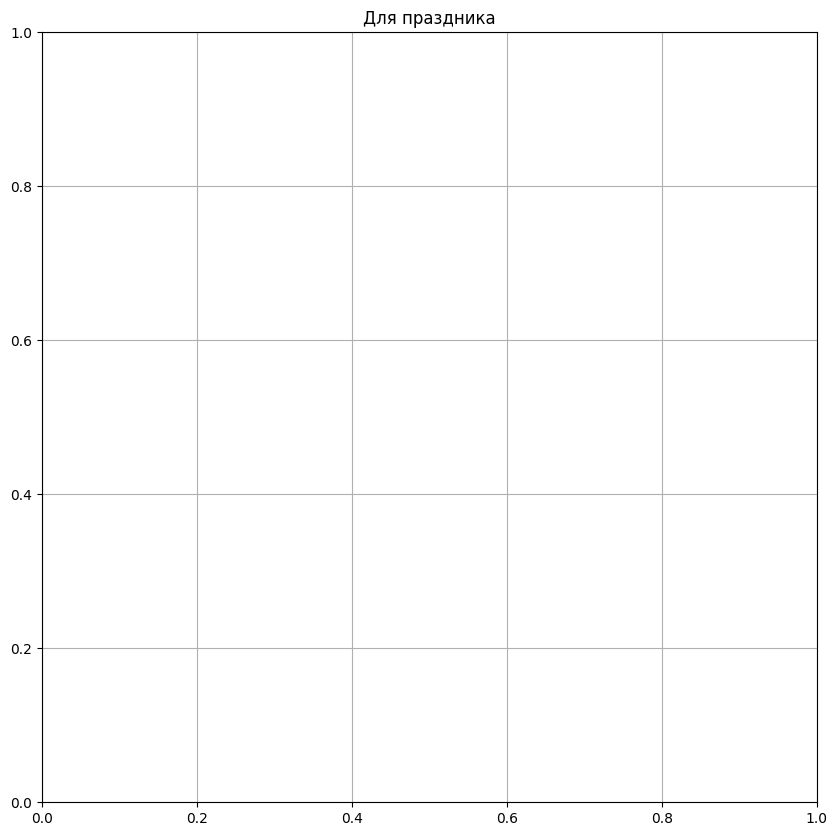

In [229]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Для праздника'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Мебель

In [ ]:
cat2_names = df.loc[df['cat1'] == 'Мебель', 'cat2'].unique().tolist()
cat2_names

In [ ]:
len(cat2_names)

In [ ]:
for i in range(len(df)):
    if df['name'][i].startswith('стул') and (df['cat1'][i] == 'Мебель' or df['cat1'][i] == 'Сад и огород' or df['cat1'][i] == 'Кухня'):
        df['cat2'][i] = 'Стулья'
        df['cat1'][i] = 'Мебель'
    if df['name'][i].startswith('кресло') and (df['cat1'][i] == 'Мебель' or df['cat1'][i] == 'Сад и огород' or df['cat1'][i] == 'Кухня'):
        df['cat2'][i] = 'Кресла'
        df['cat1'][i] = 'Мебель'
   

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Мебель'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Одежда, обувь и аксессуары

In [ ]:
cat2_names = df.loc[df['cat1'] == 'Одежда, обувь и аксессуары', 'cat2'].unique().tolist()
cat2_names

In [ ]:
for i in range(len(df)):
    if df['cat2'][i] == 'Чистящие средства':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [ ]:
for i in range(len(df)):
    if 'влажный салфетка' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [ ]:
for i in range(len(df)):
    if df['name'][i].startswith('антистатик'):
        df['cat2'][i] = 'Чистящие средства'
        df['cat1'][i] = 'Одежда, обувь и аксессуары'
    if df['name'][i].startswith('дезодорант') or df['name'][i].startswith('антиперспирант'):
        df['cat2'][i] = 'Дезодоранты и антиперспиранты'
        df['cat1'][i] = 'Красота, гигиена, аптека'
    if df['name'][i].startswith('губка') and df['cat1'][i] == 'Одежда, обувь и аксессуары':
        df['cat2'][i] = 'Губки'
        df['cat1'][i] = 'Одежда, обувь и аксессуары'


In [ ]:
df['cat2'] = combine_categories(df['cat2'], 'Косметика и чистящие средства', 'Чистящие средства', 'Чистящие средства')
df['cat2'] = combine_categories(df['cat2'], 'Средства для ухода за одеждой', 'Чистящие средства', 'Чистящие средства')
df['cat2'] = combine_categories(df['cat2'], 'Губки и щетки', 'Губки', 'Губки')

In [ ]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Одежда, обувь и аксессуары'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Мука, дрожжи

In [ ]:
cat2_names = df.loc[df['cat1'] == 'Мука, дрожжи', 'cat2'].unique().tolist()
cat2_names

In [230]:
len(cat2_names)

1

In [231]:
for i in range(len(df)):
    if df['cat2'][i] == 'Водоросли' and df['cat1'][i] == 'Мука, дрожжи':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Мука, дрожжи | Водоросли | Желе «Аппетиссимо» вишня, 150 г
Мука, дрожжи | Водоросли | Желе АШАН Красная птица Светофор многослойное, 150 г
Мука, дрожжи | Водоросли | Желе с фруктами АШАН Красная птица мандарин, 150 г
Мука, дрожжи | Водоросли | Желе с фруктами АШАН Красная птица абрикос и персик, 150 г
Мука, дрожжи | Водоросли | Желе с фруктами АШАН Красная птица вишня, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное персик, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное вишня, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное мандарин, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное ананас, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное «Аппетиссимо» тропическое ассорти, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное «РостАгроЭкспорт» абрикос, 150 г
Мука, дрожжи | Водоросли | Желе плодово-ягодное «Аппетиссимо» клубника, 150 г
Мука, дрожжи | Водоросли | Желе молочное «Аппетиссимо» в молочном креме мандарин, 150 г
Мука, дрожжи | Водоросли | Желе плодо

In [232]:
for i in range(len(df)):
    if (df['name'][i].startswith('желе') or df['name'][i].startswith('мармелад')) and df['cat2'][i] != 'Компоненты для выпечки':
        df['cat2'][i] = 'Желейные, мармелад'
        df['cat1'][i] = 'Сладости'
    

In [233]:
df['cat2'] = combine_categories(df['cat2'], 'Кондитерский декор', 'Ингредиенты для выпечки', 'Ингредиенты для выпечки')


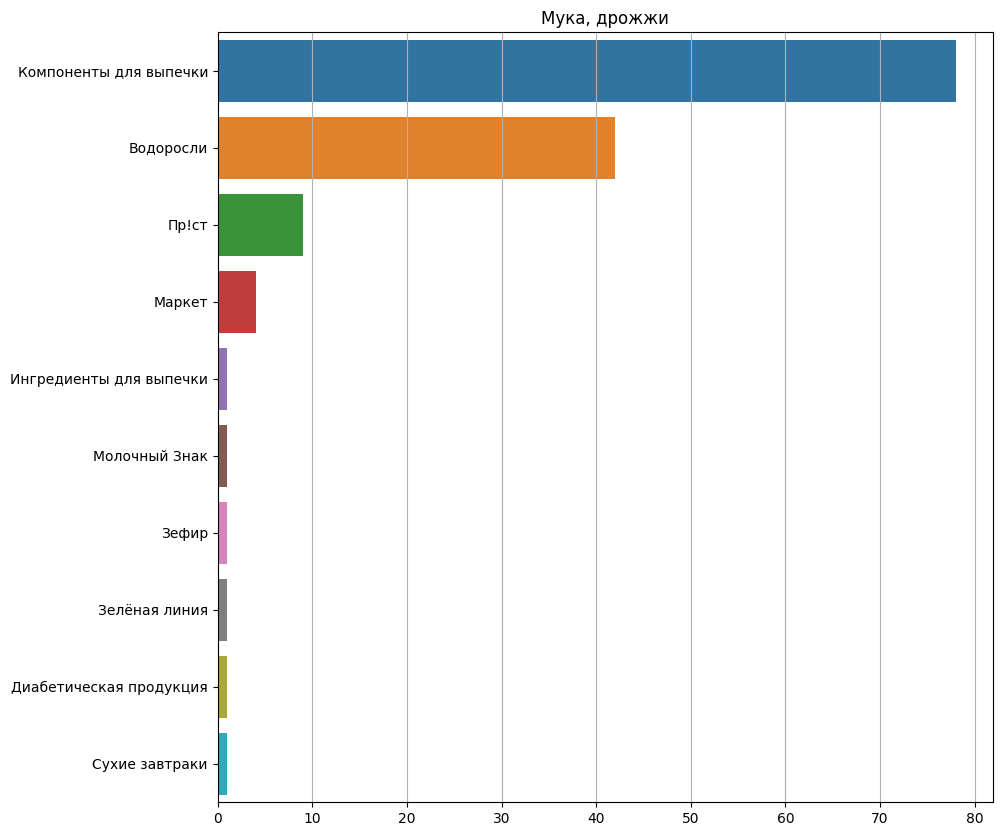

In [234]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Мука, дрожжи'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Багаж

In [235]:
cat2_names = df.loc[df['cat1'] == 'Багаж', 'cat2'].unique().tolist()
cat2_names

[]

In [236]:
len(cat2_names)

0

In [237]:
for i in range(len(df)):
    if df['cat2'][i] == 'Повседневные рюкзаки':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [238]:
for i in range(len(df)):
    if df['cat2'][i] == 'Спортивные сумки':
        df['cat2'][i] = 'Аксессуары'
        df['cat1'][i] = 'Спорт и отдых'

In [239]:
df['cat2'] = combine_categories(df['cat2'], 'Сумки для документов', 'Сумки', 'Сумки')
df['cat2'] = combine_categories(df['cat2'], 'Дорожные сумки', 'Сумки', 'Сумки')
df['cat2'] = combine_categories(df['cat2'], 'Повседневные сумки', 'Сумки', 'Сумки')
df['cat2'] = combine_categories(df['cat2'], 'Походные рюкзаки', 'Рюкзаки', 'Рюкзаки')
df['cat2'] = combine_categories(df['cat2'], 'Повседневные рюкзаки', 'Рюкзаки', 'Рюкзаки')

### Яйцо

In [240]:
cat2_names = df.loc[df['cat1'] == 'Яйцо', 'cat2'].unique().tolist()
cat2_names

['Шоколад', 'Яйцо, меланж', 'Маркет', 'Зелёная линия', 'Пр!ст', 'Яйца']

In [241]:
for i in range(len(df)):
    if df['cat2'][i] == 'Шоколад':
        df['cat2'][i] = 'Шоколад'
        df['cat1'][i] = 'Сладости'

In [242]:
df['cat2'] = combine_categories(df['cat2'], 'Яйца', 'Яйцо, меланж', 'Яйцо, меланж')

### Системы нагревания, табак

In [243]:
cat2_names = df.loc[df['cat1'] == 'Системы нагревания, табак', 'cat2'].unique().tolist()
cat2_names

[]

In [244]:
for i in range(len(df)):
    if df['cat2'][i] == 'Устройства':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [245]:
for i in range(len(df)):
    if df['name'][i].startswith('электронный сигарета') or df['name'][i].startswith('электронный система'):
        df['cat2'][i] = 'Устройства'
        df['cat1'][i] = 'Системы нагревания, табак'

### Шашлыки на природе

In [246]:
cat2_names = df.loc[df['cat1'] == 'Шашлыки на природе', 'cat2'].unique().tolist()
cat2_names

['Мороженое', 'Гриль', 'Пресервы']

In [247]:
for i in range(len(df)):
    if df['cat2'][i] == 'Пресервы' and df['cat1'][i] == 'Шашлыки на природе':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Шашлыки на природе | Пресервы | Банан Organic Зелёная Линия
Шашлыки на природе | Пресервы | Брускетта Парижская с сыром и ветчиной, 100г


In [248]:
for i in range(len(df)):
    if df['cat2'][i] == 'Гриль':
        df['cat2'][i] = 'Гриль'
        df['cat1'][i] = 'Мясо и птица'
    if df['cat2'][i] == 'Пресервы' and df['cat1'][i] == 'Шашлыки на природе':
        df['cat2'][i] = 'Овощные консервы'
        df['cat1'][i] = 'Консервация'

# Перепроверка

### Напитки

In [249]:
cat2_names = df.loc[df['cat1'] == 'Вода, соки, напитки', 'cat2'].unique().tolist()
cat2_names

['Растительные продукты',
 'Безалкогольное пиво',
 'Безалкогольное вино',
 'Энергетические напитки',
 'Кола',
 'Соки',
 'Стаканы, стопки, рюмки',
 'Смузи, кисель, морс',
 'Сывороточные',
 'Молочные коктейли',
 'Комбуча',
 'Напитки, лёд',
 'Йогурты',
 'Другие напитки',
 'Горячий шоколад',
 'Квас',
 'Кофе',
 'Спортивные напитки',
 'Сладкие газированные напитки',
 'Тоники',
 'Сокосодержащие напитки',
 'Морсы, компоты, узвар',
 'Нектары',
 'Детская',
 'Вода',
 'Лечебно-столовая',
 'От 5 литров',
 'Чай',
 'Слабоалкогольные напитки',
 'Игристые вина',
 'Коктейли',
 'Сбитень и узвары',
 'Диабетические напитки',
 'Растительные напитки',
 'Маркет',
 'Сиропы',
 'Кисломолочные продукты',
 'Детские смеси и заменители',
 'Зелёная линия',
 'Кисели',
 'Пр!ст',
 'Напитки с пользой']

In [250]:
for i in range(len(df)):
    if df['cat2'][i] == 'Комбуча':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Вода, соки, напитки | Комбуча | Напиток My Komboocha зеленый чай безалкогольный, 330 мл
Вода, соки, напитки | Комбуча | Напиток My Komboocha малина безалкогольный, 330 мл
Вода, соки, напитки | Комбуча | Напиток My Komboocha Брют чайная роза безалкогольный, 750 мл
Вода, соки, напитки | Комбуча | Напиток My Komboocha манго перец безалкогольный, 330 мл


In [251]:
for i in range(len(df)):
    if df['name'][i].startswith('самогон'):
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [252]:
for i in range(len(df)):
    if 'суп ' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Полуфабрикаты | Смеси | Смесь овощная АШАН Красная птица Щавелевый суп замороженная, 400 г
Полуфабрикаты | Первые блюда | Смесь суповая Hortex суп Щавелевый, 400 г
Полуфабрикаты | Первые блюда | Крем-суп «Мираторг» сырный с брокколи, 500 г
Консервация | Мясные консервы | Готовое блюдо Кронидов в фольге Куриный суп По-домашнему, 300г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп мясной, 70г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп куриный с гренками, 40г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп куриный, 70г
Полуфабрикаты | Супы, бульоны | Крем-суп Everyday быстрого приготовления Куриный с прованскими травами и бородинскими сухариками, 32г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп борщ с настоящим мясом, 70г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп харчо по-кавказски, 70г
Полуфабрикаты | Супы, бульоны | Суп Суперсуп гороховый с беконом, 70г
Полуфабрикаты | Супы, бульоны | Крем-суп Everyday быстрого приготовления Грибной с лисичками и пшеничными сухариками, 32г
Полуфабрикаты

In [253]:
for i in range(len(df)):
    if df['cat2'][i] == 'Утюги, парогенираторы' or df['cat2'][i] == 'Для ухода за бытовой техникой':
        df['cat2'][i] = 'Утюги, парогенираторы'
        df['cat1'][i] = 'Бытовая техника'
    if df['name'][i].startswith('кисель') or df['name'][i].startswith('морс') or df['name'][i].startswith('компотный смесь'):
        df['cat2'][i] = 'Морсы, компоты, узвар, кисель'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Горячий шоколад':
        df['cat2'][i] = 'Горячий шоколад'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['cat2'][i] == 'Чай':
        df['cat2'][i] = 'Чай'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['cat2'][i] == 'Самогон':
        df['cat2'][i] = 'Самогон'
        df['cat1'][i] = 'Алкогольные напитки'
    if df['cat2'][i] == 'Игристые вина':
        df['cat2'][i] = 'Игристые вина'
        df['cat1'][i] = 'Алкогольные напитки'
    if df['cat2'][i] == 'Кофе':
        df['cat2'][i] = 'Кофе'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['cat2'][i] == 'Кисломолочные продукты':
        df['cat2'][i] = 'Кисломолочные продукты'
        df['cat1'][i] = 'Молочные продукты'
    if df['cat2'][i] == 'Молочные коктейли':
        df['cat2'][i] = 'Молочные коктейли'
        df['cat1'][i] = 'Молочные продукты'
    if df['cat2'][i] == 'Безалкогольное вино' or df['cat2'][i] == 'Безалкогольное пиво':
        df['cat1'][i] = 'Алкогольные напитки'
    if df['cat2'][i] == 'Растительные продукты' or df['cat2'][i] == 'Растительные напитки':
        df['cat1'][i] = 'Молочные продукты'
    if df['name'][i].startswith('вода') or 'aqua' in df['name'][i]:
        df['cat2'][i] = 'Вода'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['name'][i].startswith('сок ') or df['name'][i].startswith('напиток соковый') or df['name'][i].startswith('напиток сокосодержать'):
        df['cat2'][i] = 'Соки'
        df['cat1'][i] = 'Вода, соки, напитки'
    if (df['name'][i].startswith('напиток газировать') or df['name'][i].startswith('напиток сильногазировать')) and df['cat2'][i] != 'Кола':
        df['cat2'][i] = 'Сладкие газированные напитки'
        df['cat1'][i] = 'Вода, соки, напитки'
    if (df['name'][i].startswith('энергетический напиток') or df['name'][i].startswith('энергетик')) and df['cat1'][i] == 'Вода, соки, напитки':
        df['cat2'][i] = 'Энергетические напитки'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Сиропы':
        df['cat2'][i] = 'Сиропы'
        df['cat1'][i] = 'Мёд, варенье, джемы, сиропы'
    if df['cat2'][i] == 'Настойки':
        df['cat2'][i] = 'Настойки'
        df['cat1'][i] = 'Алкогольные напитки'
    if (df['cat2'][i] == 'Нектары' and df['cat1'][i] == 'Вода, соки, напитки') or (df['name'][i].startswith('нектар') and df['cat1'][i] == 'Вода, соки, напитки'):
        df['cat2'][i] = 'Нектары'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Смузи, кисель, морс' and df['cat1'][i] == 'Вода, соки, напитки':
        df['cat2'][i] = 'Смузи'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['name'][i].startswith('смузи') and df['cat1'][i] == 'Вода, соки, напитки':
        df['cat2'][i] = 'Смузи'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['name'][i].startswith('русский дар') and df['cat1'][i] == 'Вода, соки, напитки':
        df['cat2'][i] = 'Квас'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Напитки, лёд':
        df['cat2'][i] = 'Сладкие газированные напитки'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Сывороточные':
        df['cat2'][i] = 'Сывороточные'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Слабоалкогольные напитки':
        df['cat2'][i] = 'Слабоалкогольные напитки'
        df['cat1'][i] = 'Алкогольные напитки'
    if df['cat2'][i] == 'Напитки с пользой' and 'чай' in df['name'][i]:
        df['cat2'][i] = 'Чай'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'
    if df['cat2'][i] == 'Напитки с пользой' and 'газировать' in df['name'][i]:
        df['cat2'][i] = 'Сладкие газированные напитки'
        df['cat1'][i] = 'Вода, соки, напитки'
    if df['cat2'][i] == 'Напитки с пользой':
        df['cat2'][i] = 'Растительные напитки'
        df['cat1'][i] = 'Молочные продукты'
    if df['cat2'][i] == 'Диабетические напитки':
        df['cat2'][i] = 'Чай'
        df['cat1'][i] = 'Чай, кофе, горячие напитки'

In [254]:
df['cat2'] = combine_categories(df['cat2'], 'Кисели', 'Морсы, компоты, узвар, кисель', 'Морсы, компоты, узвар, кисель')
df['cat2'] = combine_categories(df['cat2'], 'Морсы, компоты, узвар', 'Морсы, компоты, узвар, кисель', 'Морсы, компоты, узвар, кисель')
df['cat2'] = combine_categories(df['cat2'], 'Сокосодержащие напитки', 'Соки', 'Соки')
df['cat2'] = combine_categories(df['cat2'], 'От 5 литров', 'Вода', 'Вода')
df['cat2'] = combine_categories(df['cat2'], 'Изотоники, гуарано, кофеин', 'Энергетические напитки', 'Энергетические напитки')
df['cat2'] = combine_categories(df['cat2'], 'Сбитень и узвары', 'Морсы, компоты, узвар, кисель', 'Морсы, компоты, узвар, кисель')
df['cat2'] = combine_categories(df['cat2'], 'Кола', 'Сладкие газированные напитки', 'Сладкие газированные напитки')
df['cat2'] = combine_categories(df['cat2'], 'Тоники', 'Сладкие газированные напитки', 'Сладкие газированные напитки')
df['cat2'] = combine_categories(df['cat2'], 'Другие напитки', 'Сладкие газированные напитки', 'Сладкие газированные напитки')
df['cat2'] = combine_categories(df['cat2'], 'Спортивные напитки', 'Сладкие газированные напитки', 'Сладкие газированные напитки')


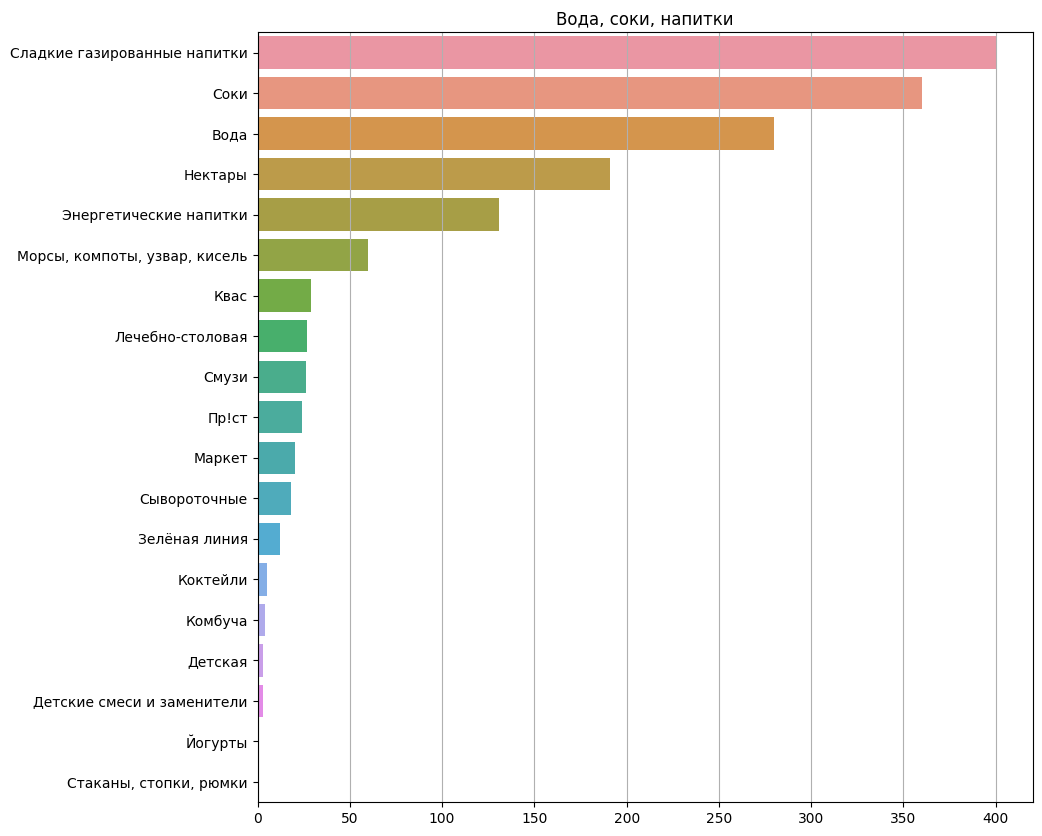

In [255]:
plt.figure(figsize=(10, 10))
plt.grid()

cat_name = 'Вода, соки, напитки'
plt.title(cat_name)
sns.barplot(x=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().values, y=df.loc[df['cat1'] == cat_name, 'cat2'].value_counts().index) 
None

### Сладости

In [256]:
cat2_names = df.loc[df['cat1'] == 'Сладости', 'cat2'].unique().tolist()
cat2_names

['Торты',
 'Пирожные, десерты',
 'Водоросли',
 'Восточные сладости, халва',
 'Орехи',
 'Шоколад',
 'Шоколадные конфеты',
 'Крекер',
 'Шоколадные и ореховые пасты',
 'Зефир',
 'Пастила',
 'Сырки, суфле',
 'Печенье',
 'Творожки',
 'Наборы конфет',
 'Сливочные, помадка, ирис',
 'Вафли',
 'Пряники',
 'Желейные, мармелад',
 'Карамель, драже, леденцы',
 'Фрукты, орехи в шоколаде',
 'Подушечки',
 'Пралине',
 'Суфле',
 'Пластинки',
 'Порционное',
 'Большая упаковка',
 'Марципан',
 'Протертые ягоды',
 'Хлеб',
 'Мороженое',
 'Батончики',
 'Молочный Знак',
 'Правильные сладости',
 'Маркет',
 'Детские смеси и заменители',
 'Зелёная линия',
 'Пироги, сдоба, кексы, рулеты',
 'Пр!ст',
 'Диабетическая продукция',
 'Спортивное питание и БАД',
 'Сухие завтраки',
 'Ухтышки']

In [257]:
for i in range(len(df)):
    if df['cat2'][i] == 'Водоросли':
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

Сладости | Водоросли | Батончик «Рот Фронт» Bite&Go пломбир, 45 г
Снеки | Водоросли | Снеки кукурузные «Сырколбас» двойной сыр, 100 г
Сладости | Водоросли | Батончик Flax лён лимон,30 г
Сладости | Водоросли | Батончик неглазированная VITok с топинамбуром, 30 г
Сладости | Водоросли | Батончик фруктовый «ОГО!» абрикос и яблоко, 30 г
Сладости | Водоросли | Батончик фруктовый Bionova инжир орехи, 35 г
Сладости | Водоросли | Батончик протеиновый Racionika манго-маракуйя, 45 г
Сладости | Водоросли | Батончик злаковый Ego Kids сливочный пломбир, 25 г
Сладости | Водоросли | Батончик злаковый Ego Kids карамельная глазурь, 25 г
Сладости | Водоросли | Батончик фруктовый «ОГО!» черника, 30 г
Снеки | Водоросли | Снеки кукурузные «Сырколбас» колбаски гриль, 100 г
Снеки | Водоросли | Батончик-мюсли «Леовит» My Like Арахис, 25 г
Сладости | Водоросли | Батончик R.A.W.LIFE орехово-фруктовый Макадамия, 47 г
Сладости | Водоросли | Батончик Take a Bite Баланс Кокос-Бразильский орех, 45 г
Сладости | Водорос

In [258]:
for i in range(len(df)):
    if 'запеканка' in df['name'][i]:
        print(df['cat1'][i], '|', df['cat2'][i], '|', df['name'][i])

In [259]:
for i in range(len(df)):
    if df['cat2'][i] == 'Шеф Перекрёсток' and (df['name'][i].startswith('борщ') or df['name'][i].startswith('харчо') or df['name'][i].startswith('солянка') or df['name'][i].startswith('щи') or df['name'][i].startswith('рассольник') or df['name'][i].startswith('свекольник') or df['name'][i].startswith('окрошка')):
        df['cat2'][i] = 'Первые блюда'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['cat2'][i] == 'Шеф Перекрёсток' and (df['name'][i].startswith('салат') or df['name'][i].startswith('винегрет')):
        df['cat2'][i] = 'Салаты'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['cat2'][i] == 'Шеф Перекрёсток' and (df['name'][i].startswith('блинчик') or df['name'][i].startswith('блин') or df['name'][i].startswith('сырник') or df['name'][i].startswith('оладья')):
        df['cat2'][i] = 'Блины, сырники, оладьи'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['cat2'][i] == 'Шеф Перекрёсток' and (df['name'][i].startswith('паста') or df['name'][i].startswith('рис')):
        df['cat2'][i] = 'Блины, сырники, оладьи'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('хумус'):
        df['cat2'][i] = 'Пресервы'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('десерт'):
        df['cat2'][i] = 'Десерты'
        df['cat1'][i] = 'Сладости'
    if df['cat2'][i] == 'Шеф Перекрёсток':
        df['cat2'][i] = 'Котлеты, наггетсы'
        df['cat1'][i] = 'Полуфабрикаты'
    if df['name'][i].startswith('пудинг'):
        df['cat2'][i] = 'Пудинг'
        df['cat1'][i] = 'Сладости'
    if (df['name'][i].startswith('трубочка') or df['name'][i].startswith('вафельный трубочка')) and df['cat2'][i] == 'Водоросли':
        df['cat2'][i] = 'Вафли'
        df['cat1'][i] = 'Сладости'
    if df['name'][i].startswith('запеканка'):
        df['cat2'][i] = 'Блины, сырники, оладьи'
        df['cat1'][i] = 'Молочные продукты'
    if df['cat2'][i] == 'Водоросли' and df['cat1'][i] == 'Сыр':
        df['cat2'][i] = 'Сыр'
        df['cat1'][i] = 'Сыр'
    if df['cat2'][i] == 'Водоросли' and df['cat1'][i] == 'Молочные продукты':
        df['cat2'][i] = 'Сливки'
        df['cat1'][i] = 'Молочные продукты'
    if df['name'][i].startswith('зефир') and df['cat1'][i] == 'Сладости':
        df['cat2'][i] = 'Зефир'
        df['cat1'][i] = 'Сладости'

In [260]:
cat2_names = df.loc[df['cat1'] == 'Красота, гигиена, аптека', 'cat2'].unique().tolist()
cat2_names

['Очки и оправы',
 'Аптека',
 'Молочко, лосьон, крем, масло',
 'Урологические товары',
 'Маски для лица',
 'Скрабы, пилинги для лица',
 'Средства для бритья',
 'Станки и кассеты',
 'Депиляция и эпиляция',
 'Уход за кожей вокруг глаз',
 'Уход за лицом',
 'Помада',
 'Кремы, сыворотки для лица',
 'Прокладки и тампоны',
 'Средства для интимной гигиены',
 'Лицо',
 'Брови',
 'Глаза',
 'Прокладки для груди',
 'Аксессуары для макияжа',
 'Дезодоранты и антиперспиранты',
 'Жидкое мыло',
 'Солнцезащитные средства',
 'Гели для душа',
 'Шампуни',
 'Ватные диски и палочки',
 'Бальзамы, кондиционеры',
 'Зубные пасты, гели, порошки',
 'Ополаскиватели',
 'Кремы для ног',
 'Зубные щетки',
 'Кусковое мыло',
 'Пена и соль для ванн',
 'Скрабы, пилинги для тела',
 'Уход за волосами',
 'Уход за руками',
 'Маникюрные принадлежности',
 'Зубные нити, зубочистки',
 'Лаки и средства для ногтей',
 'Антибактериальные средства',
 'Коррекция фигуры',
 'Туалетная вода, одеколоны',
 'Мочалки и губки',
 'Уход за телом',

In [261]:
df['cat2'] = combine_categories(df['cat2'], 'Губки, мочалки для душа', 'Мочалки и губки', 'Мочалки и губки')


In [262]:
set(df['cat2'])

{'Home Story',
 'Аксессуары для волос',
 'Аксессуары для выпечки',
 'Аксессуары для макияжа',
 'Аксессуары для сервировки стола',
 'Аксессуары, наборы',
 'Альбомы',
 'Антибактериальные средства',
 'Аптека',
 'Багеты, чиабатта',
 'Баки для белья',
 'Баклажаны, кабачки',
 'Бальзам',
 'Бальзамы, кондиционеры',
 'Бананы',
 'Барные и винные аксессуары',
 'Батончики',
 'Безалкогольное вино',
 'Безалкогольное пиво',
 'Блины, сырники, оладьи',
 'Блюда, менажницы',
 'Бобовые',
 'Бокалы, барные аксессуары',
 'Большая упаковка',
 'Брови',
 'Булочки',
 'Бумажная и ватная продукция',
 'Вазы',
 'Вареники',
 'Варенье',
 'Ватные диски и палочки',
 'Вафли',
 'Ведра, тазы',
 'Вермуты, аперитивы',
 'Весовая кулинария',
 'Вешалки, чехлы для одежды',
 'Вино',
 'Виноград',
 'Виски, бурбон',
 'Влажные салфетки',
 'Вода',
 'Водка, абсент',
 'Водоросли',
 'Восточные сладости, халва',
 'Всё для дачи и сада',
 'Всё для хранения',
 'Всё для шашлыка',
 'Вторые блюда',
 'Выпечка',
 'Галантерейные аксессуары',
 'Гел

In [270]:
len(set(df['cat1']))

26

In [271]:
len(set(df['cat2']))

427

In [279]:
df = df.replace({'cat1':{'Алкоголь (самовывоз)':'Алкогольные напитки',
                           'Красота и гигиена':'Красота, гигиена, аптека',
                           'Соки, воды, напитки':'Вода, соки, напитки',
                           'Шоколад, конфеты, сладости':'Сладости',
                           'Уборка':'Уборка и бытовая химия',
                           'Кофе, чай, какао, сахар':'Чай, кофе, горячие напитки',
                           'Молоко, сыр, яйца':'Молочные продукты',
                           'Молочные продукты, яйца':'Молочные продукты',
                           'Чипсы, снеки, сухофрукты':'Снеки',
                           'Чипсы, снеки, сухофрукты':'Снеки',
                           'Орехи, семечки, сухофрукты':'Снеки',
                           'Рыба, икра, морепродукты':'Морепродукты',
                           'Рыба':'Морепродукты',
                           'Колбасные изделия':'Колбасные изделия, холодец, паштет',
                           'Товары АШАН':'Колбасные изделия, холодец, паштет',
                           'Продукты быстрого приготовления':'Полуфабрикаты',
                           'Готовая еда':'Полуфабрикаты',
                           'Замороженные продукты':'Полуфабрикаты',
                           'Овощи, фрукты, грибы':'Овощи, фрукты, ягоды, грибы',
                           'Овощи, фрукты, орехи':'Овощи, фрукты, ягоды, грибы',
                           'Бакалея':'Овощи, фрукты, ягоды, грибы',
                           'Уборка и бытовая химия':'Уборка, товары для дома',
                           'Товары для дома':'Уборка, товары для дома',
                           'Сухие завтраки, мюсли':'Макароны, крупы',
                           'Макароны, крупы, масло, специи':'Макароны, крупы',
                           'Товары для мам и детей':'Игрушки',
                           'Посуда':'Кухня',
                           'Отдых на даче':'Сад и огород',
                           'Строительство и ремонт':'Уборка, товары для дома',
                           'Электроника':'Бытовая техника',
                           'Уборка и бытовая химия':'Уборка, товары для дома'
                          }})

In [280]:
len(df)

31786

In [281]:
df = df[(df['cat1'] != 'Зоотовары') & 
                          (df['cat1'] != 'Игрушки') & 
                          (df['cat1'] != 'Канцтовары') & 
                          (df['cat1'] != 'Книги, журналы') & 
                          (df['cat1'] != 'Сад и огород') & 
                          (df['cat1'] != 'Системы нагревания, табак') & 
                          (df['cat1'] != 'Спорт и отдых')]

In [282]:
set(df['cat1'])

{'Алкогольные напитки',
 'Вода, соки, напитки',
 'Для дома и дачи',
 'Для праздника',
 'Здоровье',
 'Колбасные изделия, холодец, паштет',
 'Консервация',
 'Красота, гигиена, аптека',
 'Кухня',
 'Макароны, крупы',
 'Молочные продукты',
 'Морепродукты',
 'Мясо и птица',
 'Мёд, варенье, джемы, сиропы',
 'Овощи, фрукты, ягоды, грибы',
 'Полуфабрикаты',
 'Сладости',
 'Снеки',
 'Собственные торговые марки',
 'Соусы, кетчупы, майонезы',
 'Сыр',
 'Уборка, товары для дома',
 'Хлеб и выпечка',
 'Чай, кофе, горячие напитки',
 'Шашлыки на природе'}

In [283]:
df.reset_index(drop=True, inplace=True)
df.to_csv(DATA_DIR+'prepared_cats.csv', index=False)